In [1]:
import pickle
import numpy as np
import pandas as pd
import spacy

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from torchtext.legacy import data
from torchtext.legacy.data import Field, BucketIterator
from sklearn.model_selection import train_test_split
# device = torch.device("cuda")


In [4]:
!pip3 install indic-nlp-library

In [5]:
# from indicnlp.tokenize import indic_tokenize
# df = pd.read_pickle("./en_hi.pkl")
# en_tokenizer = spacy.load('en')

from indicnlp.tokenize import indic_tokenize
# df = pd.read_pickle("./en_hi.pkl")
df = pd.read_csv('./train.txt', delimiter = "\t", header = None)
df.rename(columns = {0 : 'hindi', 1 : 'english'}, inplace = True)
en_tokenizer = spacy.load('en_core_web_sm')
df


hindi  \
0                                    Batman vs Superman   
1     The director is Zack Snyder, 27% Rotten Tomato...   
2                             Not very popular it seems   
3     But the audiences liked it. It has a B cinema ...   
4                                                   Yes   
...                                                 ...   
8055                                                Ok.   
8056                                             ok bro   
8057                                 shall we continue?   
8058                                 do you like we can   
8059                        Yeah I have fifteen thanks.   

                                                english  
0                                    batman vs superman  
1     Zack Snyder director hai, 27% Rotten Tomatoes,...  
2                      lagta hai bahut popular nahi hai  
3     but audience ne like kiya, iska cinema score B...  
4                                                   yes  
...                                                 ...  
8055                                           Thik hai  
8056                                      Thik hai bhai  
8057                       Kya ham chalu kar sakte hai?  
8058                  Kya aapko pasand hai hamare saath  
8059                   Haa mere pass pandrah thanks hai  

[8060 rows x 2 columns]

In [6]:
# train_temp, test_data_sent = train_test_split(df, test_size = 0.2)
# train_data_sent, validation_data_sent = train_test_split(train_temp, test_size=0.125)

train_data_sent, test_data_sent = train_test_split(df, test_size = 0.2)
validation_data_sent = pd.read_csv('./dev.txt', delimiter = "\t", header = None)
validation_data_sent.rename(columns = {0 : 'hindi', 1 : 'english'}, inplace = True)
validation_data_sent

hindi  \
0                                                hello   
1    hello there, I have not seen this movie so im ...   
2             Alright that is fine. What is the movie?   
3                      The movie is The Social Network   
4                     I have not seen that one either.   
..                                                 ...   
937                           Yep. Thanks for chatting   
938               thanks, I will watch it. SOunds good   
939                                                Hi!   
940              Did you like the movie Despicable Me?   
941  I did not realize this movie came out in 2010,...   

                                               english  
0                                                hello  
1    hello yar, mein is movie ko nahi dekha hoon th...  
2                 acha tho is movie kis baare me hein?  
3        is movie tho social network ke bare mein hein  
4                       mein aise kuch nahi dekha hoon  
..                                                 ...  
937                     Yep. Thanks baat karne ke liye  
938             Thanks, mei dekhati hui. Achi baat hai  
939                                                Hi!  
940          kya tumhe movie Despicable Me pasand hai?  
941  mujhe nahi lagta ki ye movie 2010 me aayi thi,...  

[942 rows x 2 columns]

In [7]:
train_data_sent.to_json('train_data.json', orient='records', lines=True)
validation_data_sent.to_json('validation_data.json', orient='records', lines=True)
test_data_sent.to_json('test_data.json', orient='records', lines=True)

In [8]:
def hindi_tokenizer(sentence):
    print("This is Sentence - \n",sentence)
    a = [word.text for word in en_tokenizer.tokenizer(sentence.strip().split("-")[-1].strip())]
    
    print(a)
    return a
        
#     return [word for word in indic_tokenize.trivial_tokenize(sentence.strip().split("-")[-1].strip())]

In [9]:
def english_tokenizer(sentence):
#     a = [word.text for word in en_tokenizer.tokenizer(sentence.strip().split("-")[-1].strip())][::-1]
    a = [word.text for word in en_tokenizer.tokenizer(sentence.strip().split("-")[-1].strip())]
    print("This is english sentence \n", sentence)
    print(a)
    return a 

In [10]:
def hindi_tokenizer_subword_tri(sentence):
    print("This is Sentence - \n",sentence)
    a = [word.text for word in en_tokenizer.tokenizer(sentence.strip().split("-")[-1].strip())]
    print(a)
    tokens = [" ".join(word) + " </w>" for word in a]
    fin_l = []
    for word in tokens:
        symbols = word.split()
        for i in len()
    return a
    

SyntaxError: invalid syntax (<ipython-input-10-aef670ab98dc>, line 9)

In [13]:
# HINDI = Field(tokenize = hindi_tokenizer, init_token = '<sos>', eos_token = '<eos>')
# ENGLISH = Field(tokenize = english_tokenizer, init_token = '<sos>', eos_token = '<eos>', lower = True)
# fields = {'english': ('english', ENGLISH), 'hindi': ('hindi', HINDI)}
HINDI = Field(tokenize = hindi_tokenizer, init_token = '<sos>', eos_token = '<eos>' , lower = True)
ENGLISH = Field(tokenize = english_tokenizer, init_token = '<sos>', eos_token = '<eos>', lower = True)
fields = {'english': ('english', ENGLISH), 'hindi': ('hindi', HINDI)}

In [14]:
train_data, validation_data, test_data = data.TabularDataset.splits(path = '',
                                        train = 'train_data.json',
                                        validation = 'validation_data.json',
                                        test = 'test_data.json',
                                        format = 'json',
                                        fields = fields)

# print(len(train_data), len(validation_data), len(test_data))
train_data_iterator, validation_data_iterator, test_data_iterator = BucketIterator.splits((train_data, validation_data, test_data), batch_size = 64, device = device, sort = False)


This is english sentence 
 hahahah oh vah kab bahar aaya
['hahahah', 'oh', 'vah', 'kab', 'bahar', 'aaya']
This is Sentence - 
 hahahah oh when did it come out?
['hahahah', 'oh', 'when', 'did', 'it', 'come', 'out', '?']
This is english sentence 
 sade hue tamaatar par
['sade', 'hue', 'tamaatar', 'par']
This is Sentence - 
 on rotten tomatoes
['on', 'rotten', 'tomatoes']
This is english sentence 
 kya tum bahut jayada movie dekhate ho?
['kya', 'tum', 'bahut', 'jayada', 'movie', 'dekhate', 'ho', '?']
This is Sentence - 
 Do you watch a lot of movies?
['Do', 'you', 'watch', 'a', 'lot', 'of', 'movies', '?']
This is english sentence 
 NAHIN MAIN NAHIN. MUJHE PATA HAI KI ISAMEN KUCHH BEHATAREEN KALAAKAAR HAIN JAISE TOM HAINKS AUR MERIL STREEP.
['NAHIN', 'MAIN', 'NAHIN', '.', 'MUJHE', 'PATA', 'HAI', 'KI', 'ISAMEN', 'KUCHH', 'BEHATAREEN', 'KALAAKAAR', 'HAIN', 'JAISE', 'TOM', 'HAINKS', 'AUR', 'MERIL', 'STREEP', '.']
This is Sentence - 
 No, I do not. I knwo it has some great actors in it like To

['Oh', 'well', 'that', "'s", 'good', '.', 'I', 'do', 'like', 'movies', '(', 'and', 'books', ')', 'based', 'on', 'real', 'life', 'stories', '.']
This is english sentence 
 namaste
['namaste']
This is Sentence - 
 Hi@
['Hi@']
This is english sentence 
 tum kya soch te ho is film ke bare mein
['tum', 'kya', 'soch', 'te', 'ho', 'is', 'film', 'ke', 'bare', 'mein']
This is Sentence - 
 what do you think in general about this film?
['what', 'do', 'you', 'think', 'in', 'general', 'about', 'this', 'film', '?']
This is english sentence 
 MAINNE YAH MOVIE KABHEE NAHIN DEKHEE.
['MAINNE', 'YAH', 'MOVIE', 'KABHEE', 'NAHIN', 'DEKHEE', '.']
This is Sentence - 
 I have never seen this movie.
['I', 'have', 'never', 'seen', 'this', 'movie', '.']
This is english sentence 
 kya aap mujhe sameekshaon ke baare mein adhik bata sakate hain?
['kya', 'aap', 'mujhe', 'sameekshaon', 'ke', 'baare', 'mein', 'adhik', 'bata', 'sakate', 'hain', '?']
This is Sentence - 
 Can you tell me more about the reviews?
['Can', '

 Hea God Craig Ferguson to swayam hi riot he!
['Hea', 'God', 'Craig', 'Ferguson', 'to', 'swayam', 'hi', 'riot', 'he', '!']
This is Sentence - 
 OMG Craig Ferguson is a riot!
['OMG', 'Craig', 'Ferguson', 'is', 'a', 'riot', '!']
This is english sentence 
 probably voh POTUs ban jaathe hein
['probably', 'voh', 'POTUs', 'ban', 'jaathe', 'hein']
This is Sentence - 
 Probably could become POTUS these days.
['Probably', 'could', 'become', 'POTUS', 'these', 'days', '.']
This is english sentence 
 Ryan Gosling, Emma stone, aur John Legend
['Ryan', 'Gosling', ',', 'Emma', 'stone', ',', 'aur', 'John', 'Legend']
This is Sentence - 
 Ryan Gosling, Emma stone, and John Legend
['Ryan', 'Gosling', ',', 'Emma', 'stone', ',', 'and', 'John', 'Legend']
This is english sentence 
 wo "college" jaate hain scare karne ki best strategies learn karne ke liye.
['wo', '"', 'college', '"', 'jaate', 'hain', 'scare', 'karne', 'ki', 'best', 'strategies', 'learn', 'karne', 'ke', 'liye', '.']
This is Sentence - 
 They 

['The', 'burn', 'book', 'was', 'an', 'interesting', 'concept']
This is english sentence 
 oh achchha. mujhe pata tha ki tum kooliyo moorkh the.
['oh', 'achchha', '.', 'mujhe', 'pata', 'tha', 'ki', 'tum', 'kooliyo', 'moorkh', 'the', '.']
This is Sentence - 
 Oh nice. I knew you were coolio foolio.
['Oh', 'nice', '.', 'I', 'knew', 'you', 'were', 'coolio', 'foolio', '.']
This is english sentence 
 nahin, unakee apanee samasyaen nahin hain.
['nahin', ',', 'unakee', 'apanee', 'samasyaen', 'nahin', 'hain', '.']
This is Sentence - 
 No they have their own problems. 
['No', 'they', 'have', 'their', 'own', 'problems', '.']
This is english sentence 
 leonardo dicaprio- frank abignale se starr hota jo fraud karne pe master hein, aur tom hanks jo FBI agent they voh usse chase karthe
['frank', 'abignale', 'se', 'starr', 'hota', 'jo', 'fraud', 'karne', 'pe', 'master', 'hein', ',', 'aur', 'tom', 'hanks', 'jo', 'FBI', 'agent', 'they', 'voh', 'usse', 'chase', 'karthe']
This is Sentence - 
 It is starri

 mein maantha hoon ki us cinema ka score A+ hein
['mein', 'maantha', 'hoon', 'ki', 'us', 'cinema', 'ka', 'score', 'A+', 'hein']
This is Sentence - 
 I agree with the CinemaScore of A+
['I', 'agree', 'with', 'the', 'CinemaScore', 'of', 'A+']
This is english sentence 
 but usne bahut jayadi kimat chukaya
['but', 'usne', 'bahut', 'jayadi', 'kimat', 'chukaya']
This is Sentence - 
 But she is heavily praised 
['But', 'she', 'is', 'heavily', 'praised']
This is english sentence 
 Well kuch reason k liye mujhe High School movies acchi lagti hai. But ye to exceptional thi.
['Well', 'kuch', 'reason', 'k', 'liye', 'mujhe', 'High', 'School', 'movies', 'acchi', 'lagti', 'hai', '.', 'But', 'ye', 'to', 'exceptional', 'thi', '.']
This is Sentence - 
 Well, I love High School movies for some reason. But this was exceptional. 
['Well', ',', 'I', 'love', 'High', 'School', 'movies', 'for', 'some', 'reason', '.', 'But', 'this', 'was', 'exceptional', '.']
This is english sentence 
 pizza planet ke bare mei 

 isme espionage ka angle bhi involve hai. I suppose mai  kuch spoil nahi kar raha hu kyonki ye history hai, but kuch Russian secret bhi involved hai.
['isme', 'espionage', 'ka', 'angle', 'bhi', 'involve', 'hai', '.', 'I', 'suppose', 'mai', ' ', 'kuch', 'spoil', 'nahi', 'kar', 'raha', 'hu', 'kyonki', 'ye', 'history', 'hai', ',', 'but', 'kuch', 'Russian', 'secret', 'bhi', 'involved', 'hai', '.']
This is Sentence - 
 There is quite a bit of espionage involved as well. I suppose I am not spoiling it since it is history, but there is some Russian collusion involved.
['There', 'is', 'quite', 'a', 'bit', 'of', 'espionage', 'involved', 'as', 'well', '.', 'I', 'suppose', 'I', 'am', 'not', 'spoiling', 'it', 'since', 'it', 'is', 'history', ',', 'but', 'there', 'is', 'some', 'Russian', 'collusion', 'involved', '.']
This is english sentence 
 kaise hopeful se unhe dekha hein
['kaise', 'hopeful', 'se', 'unhe', 'dekha', 'hein']
This is Sentence - 
 How hopeful he had been.
['How', 'hopeful', 'he', 'h

 har kisi ka hope hein
['har', 'kisi', 'ka', 'hope', 'hein']
This is Sentence - 
 One can only hope. 
['One', 'can', 'only', 'hope', '.']
This is english sentence 
 so mujhe iske baare me batao
['so', 'mujhe', 'iske', 'baare', 'me', 'batao']
This is Sentence - 
 So tell me about it
['So', 'tell', 'me', 'about', 'it']
This is english sentence 
 interesting hey tho muje nahi patha
['interesting', 'hey', 'tho', 'muje', 'nahi', 'patha']
This is Sentence - 
 intersting, I did not know that.
['intersting', ',', 'I', 'did', 'not', 'know', 'that', '.']
This is english sentence 
 Batman vs Superman. Kya tumne yeh dekhi hai?
['Batman', 'vs', 'Superman', '.', 'Kya', 'tumne', 'yeh', 'dekhi', 'hai', '?']
This is Sentence - 
 Batman v Superman. Have you watched it ?
['Batman', 'v', 'Superman', '.', 'Have', 'you', 'watched', 'it', '?']
This is english sentence 
 Agreed, war naam ke terror har koi bhul jata aur hero log ka victory k liye celebration hota hia.
['Agreed', ',', 'war', 'naam', 'ke', 'terr

 muje yaad bhul gea, aur kitna acha likha k ab main iske bare sochne lagga
['muje', 'yaad', 'bhul', 'gea', ',', 'aur', 'kitna', 'acha', 'likha', 'k', 'ab', 'main', 'iske', 'bare', 'sochne', 'lagga']
This is Sentence - 
 I actually forgot about it, and how well written it is now that I really think about it
['I', 'actually', 'forgot', 'about', 'it', ',', 'and', 'how', 'well', 'written', 'it', 'is', 'now', 'that', 'I', 'really', 'think', 'about', 'it']
This is english sentence 
 actually mujhe lagta haiki unhone life ki story ko ek different way me lake bahut badhiya job kiya hai
['actually', 'mujhe', 'lagta', 'haiki', 'unhone', 'life', 'ki', 'story', 'ko', 'ek', 'different', 'way', 'me', 'lake', 'bahut', 'badhiya', 'job', 'kiya', 'hai']
This is Sentence - 
 I thought they actually did a very good job bringing the story to life in a different way
['I', 'thought', 'they', 'actually', 'did', 'a', 'very', 'good', 'job', 'bringing', 'the', 'story', 'to', 'life', 'in', 'a', 'different', 'way'

 maine pehli wali dekhi thi aur wo really good thi, lekin tab mere bacche young they. Ab mere pas koi reason nahi hai isey dekhne ka.
['maine', 'pehli', 'wali', 'dekhi', 'thi', 'aur', 'wo', 'really', 'good', 'thi', ',', 'lekin', 'tab', 'mere', 'bacche', 'young', 'they', '.', 'Ab', 'mere', 'pas', 'koi', 'reason', 'nahi', 'hai', 'isey', 'dekhne', 'ka', '.']
This is Sentence - 
 I saw the first one and it was really good, but my kids were young then. Now I have no reason to see it.
['I', 'saw', 'the', 'first', 'one', 'and', 'it', 'was', 'really', 'good', ',', 'but', 'my', 'kids', 'were', 'young', 'then', '.', 'Now', 'I', 'have', 'no', 'reason', 'to', 'see', 'it', '.']
This is english sentence 
 mein maantha hoon.. us cheating portion is movie mein jo skeptical hein, lekin kids film ke liye tho bilkul coincide nahi huva... is saal ke bachon ko kya sikhane chathe yeh tho pura negative reinforces hein us monsters ka action ka
['mein', 'maantha', 'hoon', '..', 'us', 'cheating', 'portion', 'is

['not', 'at', 'all', 'but', 'that', 'is', 'for', 'me', '.', 'it', 'is', 'heart', 'touching', 'and', 'will', 'make', 'you', 'cry', '.', 'if', 'made', 'me', 'cry', '.', 'Allie', 'got', 'Alzheimer', 'and', 'she', 'does', "n't", 'remember', 'Noah', 'but', 'he', 'still', 'visits', 'her', 'everyday', 'and', 'they', 'died', 'together']
This is english sentence 
 In fact now mene padha tha,wo ek movie ki tarah wo bhi "stupid enjoyable" tha
['In', 'fact', 'now', 'mene', 'padha', 'tha', ',', 'wo', 'ek', 'movie', 'ki', 'tarah', 'wo', 'bhi', '"', 'stupid', 'enjoyable', '"', 'tha']
This is Sentence - 
 In fact now that I read this, it sounds like one of the movies that is so stupid it might be "stupid enjoyable"
['In', 'fact', 'now', 'that', 'I', 'read', 'this', ',', 'it', 'sounds', 'like', 'one', 'of', 'the', 'movies', 'that', 'is', 'so', 'stupid', 'it', 'might', 'be', '"', 'stupid', 'enjoyable', '"']
This is english sentence 
 Ohh, aacha hai. Kis prakar ka struggle usne kiya tha
['Ohh', ',', 'aac

 and then her wings are cut off
['and', 'then', 'her', 'wings', 'are', 'cut', 'off']
This is english sentence 
 tumhare regarding  kya vichar he
['tumhare', 'regarding', ' ', 'kya', 'vichar', 'he']
This is Sentence - 
 How bout u
['How', 'bout', 'u']
This is english sentence 
 Parents ki maut bohot sad aur unexpected thi, aur movie ko start karne ka dramatic way tha.
['Parents', 'ki', 'maut', 'bohot', 'sad', 'aur', 'unexpected', 'thi', ',', 'aur', 'movie', 'ko', 'start', 'karne', 'ka', 'dramatic', 'way', 'tha', '.']
This is Sentence - 
 The parents dying was sad and unexpected, and a dramatic way to start the film
['The', 'parents', 'dying', 'was', 'sad', 'and', 'unexpected', ',', 'and', 'a', 'dramatic', 'way', 'to', 'start', 'the', 'film']
This is english sentence 
 namaste?
['namaste', '?']
This is Sentence - 
 Hello?
['Hello', '?']
This is english sentence 
 hello, ironman ka kya thoughts hein?
['hello', ',', 'ironman', 'ka', 'kya', 'thoughts', 'hein', '?']
This is Sentence - 
 Hell

['My', 'favorite', 'part', 'was', 'the', 'girls', 'hating', 'on', 'each', 'other']
This is english sentence 
 hah ki main har samay myfachai shabd ka upayog karata hoon.
['hah', 'ki', 'main', 'har', 'samay', 'myfachai', 'shabd', 'ka', 'upayog', 'karata', 'hoon', '.']
This is Sentence - 
 haha i use that term Myface all the time.
['haha', 'i', 'use', 'that', 'term', 'Myface', 'all', 'the', 'time', '.']
This is english sentence 
 jarur, Dragon ka naam hein Night fury, aur us movie mein kafi storyline nahi hein lakin uska tamed aur evil one ka battles chal raha hein.
['jarur', ',', 'Dragon', 'ka', 'naam', 'hein', 'Night', 'fury', ',', 'aur', 'us', 'movie', 'mein', 'kafi', 'storyline', 'nahi', 'hein', 'lakin', 'uska', 'tamed', 'aur', 'evil', 'one', 'ka', 'battles', 'chal', 'raha', 'hein', '.']
This is Sentence - 
 Sure, the Dragons name is Night fury. And the movie doesn't have much of a storyline, but it has battles between tamed and evil ones.
['Sure', ',', 'the', 'Dragons', 'name', 'is'

 tumne kya soch tha otterton ke savage hone pe?
['tumne', 'kya', 'soch', 'tha', 'otterton', 'ke', 'savage', 'hone', 'pe', '?']
This is Sentence - 
 What did you think about Otterton going "Savage"?
['What', 'did', 'you', 'think', 'about', 'Otterton', 'going', '"', 'Savage', '"', '?']
This is english sentence 
 Mainne socha ki vah usake saath bahut kroor tha.
['Mainne', 'socha', 'ki', 'vah', 'usake', 'saath', 'bahut', 'kroor', 'tha', '.']
This is Sentence - 
 I thought he was pretty ruthless with him.
['I', 'thought', 'he', 'was', 'pretty', 'ruthless', 'with', 'him', '.']
This is english sentence 
 kya tum vaha abhi tak ho?
['kya', 'tum', 'vaha', 'abhi', 'tak', 'ho', '?']
This is Sentence - 
 You still there?
['You', 'still', 'there', '?']
This is english sentence 
 ok
['ok']
This is Sentence - 
 Ok
['Ok']
This is english sentence 
 Haan main critics ki nahi sunta hu, jyadatar wo log galat rahte hai. Kya tumhe laga tha wo bahut sappy thi?
['Haan', 'main', 'critics', 'ki', 'nahi', 'sunta

['I', 'agree', '!', 'It', 'was', 'very', 'sad', 'but', 'also', ',', 'as', 'one', 'reviewer', 'puts', 'it', 'quite', '"', 'bittersweet', '.', '"', 'I', 'was', "n't", 'sure', 'how', 'to', 'feel', 'at', 'the', 'end', '.']
This is english sentence 
 Rotten Tomatoes: 84% aur average: 7.7/10
['Rotten', 'Tomatoes', ':', '84', '%', 'aur', 'average', ':', '7.7/10']
This is Sentence - 
 Rotten Tomatoes: 84% and average: 7.7/10
['Rotten', 'Tomatoes', ':', '84', '%', 'and', 'average', ':', '7.7/10']
This is english sentence 
 NAHIN  MAIN THO SAB DAWSON'S CREEK SE JANTHA HOON LOL
['NAHIN', ' ', 'MAIN', 'THO', 'SAB', 'DAWSON', "'S", 'CREEK', 'SE', 'JANTHA', 'HOON', 'LOL']
This is Sentence - 
 No all I know is from Dawson's Creek lol
['No', 'all', 'I', 'know', 'is', 'from', 'Dawson', "'s", 'Creek', 'lol']
This is english sentence 
 Kisi bhi case me khun ka karan anyay nahi bataya ja sakta.
['Kisi', 'bhi', 'case', 'me', 'khun', 'ka', 'karan', 'anyay', 'nahi', 'bataya', 'ja', 'sakta', '.']
This is Sent

This is english sentence 
 THO AAP KYA IS MOVIE KE BAARE MEIN KUCH BATHA SAKTHE HO
['THO', 'AAP', 'KYA', 'IS', 'MOVIE', 'KE', 'BAARE', 'MEIN', 'KUCH', 'BATHA', 'SAKTHE', 'HO']
This is Sentence - 
 can you tell me what you think about that
['can', 'you', 'tell', 'me', 'what', 'you', 'think', 'about', 'that']
This is english sentence 
 Wo to sabhi young actress type ki lagti hai
['Wo', 'to', 'sabhi', 'young', 'actress', 'type', 'ki', 'lagti', 'hai']
This is Sentence - 
 she seems just like all the other young actresses
['she', 'seems', 'just', 'like', 'all', 'the', 'other', 'young', 'actresses']
This is english sentence 
 Uske chest me ek device daalni padi thi, kyuki ek blast me wo injure ho jata hai aur wo device shrapnel ko uske heart jane se rokta hai.
['Uske', 'chest', 'me', 'ek', 'device', 'daalni', 'padi', 'thi', ',', 'kyuki', 'ek', 'blast', 'me', 'wo', 'injure', 'ho', 'jata', 'hai', 'aur', 'wo', 'device', 'shrapnel', 'ko', 'uske', 'heart', 'jane', 'se', 'rokta', 'hai', '.']
This 

['The', 'movie', 'is', 'pretty', 'long', 'but', 'just', 'a', 'normal', 'length', '.']
This is english sentence 
 yeah!
['yeah', '!']
This is Sentence - 
 Yeah!
['Yeah', '!']
This is english sentence 
 Movie khatam hote hi, we were like next kab hai... 10 saal ke baad...haha
['Movie', 'khatam', 'hote', 'hi', ',', 'we', 'were', 'like', 'next', 'kab', 'hai', '...', '10', 'saal', 'ke', 'baad', '...', 'haha']
This is Sentence - 
 right at the end of the movie, we were like when is the next...ten years later...haha
['right', 'at', 'the', 'end', 'of', 'the', 'movie', ',', 'we', 'were', 'like', 'when', 'is', 'the', 'next', '...', 'ten', 'years', 'later', '...', 'haha']
This is english sentence 
 mujhe pata hai, right? Us point par mujhe Kate ke liye sorry feel huya. Aur uske top par, tum sirf Scranton ki flight land kar sakte ho aur jab tum wahan ho, Chicago ki sari flights book thi. Kitna stressful hai!
['mujhe', 'pata', 'hai', ',', 'right', '?', 'Us', 'point', 'par', 'mujhe', 'Kate', 'ke', '

This is english sentence 
 Michael Stuhlbarg play karta hai Dimitri mosenkov ka jo ek soviet spy hai joh ek scientist hai
['Michael', 'Stuhlbarg', 'play', 'karta', 'hai', 'Dimitri', 'mosenkov', 'ka', 'jo', 'ek', 'soviet', 'spy', 'hai', 'joh', 'ek', 'scientist', 'hai']
This is Sentence - 
 Michael Stuhlbarg plays Dimitri mosenkov , a soviet spy working as a scientist
['Michael', 'Stuhlbarg', 'plays', 'Dimitri', 'mosenkov', ',', 'a', 'soviet', 'spy', 'working', 'as', 'a', 'scientist']
This is english sentence 
 Oh to wo comics ke bahut close rahe, yah badi achchi baat hai.
['Oh', 'to', 'wo', 'comics', 'ke', 'bahut', 'close', 'rahe', ',', 'yah', 'badi', 'achchi', 'baat', 'hai', '.']
This is Sentence - 
 Ah so they stick to the comic closely, thats a good thing.
['Ah', 'so', 'they', 'stick', 'to', 'the', 'comic', 'closely', ',', 'that', 's', 'a', 'good', 'thing', '.']
This is english sentence 
 film ka kya naam hai
['film', 'ka', 'kya', 'naam', 'hai']
This is Sentence - 
 What's the name o

['Yeh', 'sahi', 'hai', '.', '"', 'critical', 'response', '"', 'section', 'ka', 'pehla', 'review', 'bahut', 'harsh', 'hai', '.', 'Main', 'sure', 'nhi', 'huin', 'main', 'movie', 'reviews', 'padhne', 'ya', 'itni', 'parwaah', 'nhi', 'krta', ',', 'sirf', 'online', '%', 'ratings']
This is Sentence - 
 That's true. The first review under the "critical response" section is pretty harsh. I'm not sure I really ever read or care about movie reviews, just the ratings % online
['That', "'s", 'true', '.', 'The', 'first', 'review', 'under', 'the', '"', 'critical', 'response', '"', 'section', 'is', 'pretty', 'harsh', '.', 'I', "'m", 'not', 'sure', 'I', 'really', 'ever', 'read', 'or', 'care', 'about', 'movie', 'reviews', ',', 'just', 'the', 'ratings', '%', 'online']
This is english sentence 
 kya aap uske behatar soch sakthe Neo vs agent smith
['kya', 'aap', 'uske', 'behatar', 'soch', 'sakthe', 'Neo', 'vs', 'agent', 'smith']
This is Sentence - 
 What do you think, better than Neo vs Agent smith? 
['Wha

['Well', 'lex', 'luthor', 'manipulates', 'batman', 'into', 'a', 'battle', 'with', 'Superman', 'because', 'he', 'is', 'obssessed', 'with', 'cloning', 'superman', '.']
This is english sentence 
 kya aap ko ache leadership ka figue us avengers mein dekhayi detha ya koi aur uska stand out ki hota tho ache lagtha?
['kya', 'aap', 'ko', 'ache', 'leadership', 'ka', 'figue', 'us', 'avengers', 'mein', 'dekhayi', 'detha', 'ya', 'koi', 'aur', 'uska', 'stand', 'out', 'ki', 'hota', 'tho', 'ache', 'lagtha', '?']
This is Sentence - 
 Did you think he made a good leadership figure of the Avengers or did anybody else stand out to you more that way?
['Did', 'you', 'think', 'he', 'made', 'a', 'good', 'leadership', 'figure', 'of', 'the', 'Avengers', 'or', 'did', 'anybody', 'else', 'stand', 'out', 'to', 'you', 'more', 'that', 'way', '?']
This is english sentence 
 Uski theory darasal ek analogy thi uski captain and station ke life ke liye, or uski apni life main evolution to a higher station ke feeling ke l

This is Sentence - 
 seems funny lol
['seems', 'funny', 'lol']
This is english sentence 
 muje bhi! kitna inspiring hein yar, isse patha chaltha hein ki hum kaise apne dreams ko accomplish karthe jo jarur sach hoga... muje tho is movie ka monster world expanded bahut pasand hein
['muje', 'bhi', '!', 'kitna', 'inspiring', 'hein', 'yar', ',', 'isse', 'patha', 'chaltha', 'hein', 'ki', 'hum', 'kaise', 'apne', 'dreams', 'ko', 'accomplish', 'karthe', 'jo', 'jarur', 'sach', 'hoga', '...', 'muje', 'tho', 'is', 'movie', 'ka', 'monster', 'world', 'expanded', 'bahut', 'pasand', 'hein']
This is Sentence - 
 Me too! It was very inspiring and showed that you can accomplish your dreams many ways. I liked how the movie expanded on the monster world. 
['Me', 'too', '!', 'It', 'was', 'very', 'inspiring', 'and', 'showed', 'that', 'you', 'can', 'accomplish', 'your', 'dreams', 'many', 'ways', '.', 'I', 'liked', 'how', 'the', 'movie', 'expanded', 'on', 'the', 'monster', 'world', '.']
This is english sentenc

['dekhte', 'hain', 'now']
This is Sentence - 
 Lets see now.
['Lets', 'see', 'now', '.']
This is english sentence 
 nahin, vah sahee hai
['nahin', ',', 'vah', 'sahee', 'hai']
This is Sentence - 
 No, he is right
['No', ',', 'he', 'is', 'right']
This is english sentence 
 ki shaark par ek strychhninai ka upayog karane ke lie unamen se goonga tha
['ki', 'shaark', 'par', 'ek', 'strychhninai', 'ka', 'upayog', 'karane', 'ke', 'lie', 'unamen', 'se', 'goonga', 'tha']
This is Sentence - 
 that was dumb of them to try and use a strychnine on the shark
['that', 'was', 'dumb', 'of', 'them', 'to', 'try', 'and', 'use', 'a', 'strychnine', 'on', 'the', 'shark']
This is english sentence 
 Film mein Scarecrow bhi bahut dilchasap hai. Tab kafi saare plot lagte hai agr film mein bahut saare villans ho to.
['Film', 'mein', 'Scarecrow', 'bhi', 'bahut', 'dilchasap', 'hai', '.', 'Tab', 'kafi', 'saare', 'plot', 'lagte', 'hai', 'agr', 'film', 'mein', 'bahut', 'saare', 'villans', 'ho', 'to', '.']
This is Senten

 lol you're fine
['lol', 'you', "'re", 'fine']
This is english sentence 
 superman movie is better than Man of Steel
['superman', 'movie', 'is', 'better', 'than', 'Man', 'of', 'Steel']
This is Sentence - 
 It's better than Man of Steel, the superman movie
['It', "'s", 'better', 'than', 'Man', 'of', 'Steel', ',', 'the', 'superman', 'movie']
This is english sentence 
 nahi. 'Gibson' character thoda aur develop kiya jaa sakta tha
['nahi', '.', "'", 'Gibson', "'", 'character', 'thoda', 'aur', 'develop', 'kiya', 'jaa', 'sakta', 'tha']
This is Sentence - 
 No. The "Gibson" character could have been better developed.
['No', '.', 'The', '"', 'Gibson', '"', 'character', 'could', 'have', 'been', 'better', 'developed', '.']
This is english sentence 
 ha definitely!
['ha', 'definitely', '!']
This is Sentence - 
 Oh definitely!
['Oh', 'definitely', '!']
This is english sentence 
 ye crazy baat hai ki council chahti hai ki nuclear missile new york par gire
['ye', 'crazy', 'baat', 'hai', 'ki', 'counc

 jon leejend philm mein hain.
['jon', 'leejend', 'philm', 'mein', 'hain', '.']
This is Sentence - 
 John Legend is in the film.
['John', 'Legend', 'is', 'in', 'the', 'film', '.']
This is english sentence 
 Main agree karta hu,  kuch bahut badhiya actors hai Batman Begins me. Mujhe Liam Neeson bhi pasand hai, bhale hi wo ek villain hai
['Main', 'agree', 'karta', 'hu', ',', ' ', 'kuch', 'bahut', 'badhiya', 'actors', 'hai', 'Batman', 'Begins', 'me', '.', 'Mujhe', 'Liam', 'Neeson', 'bhi', 'pasand', 'hai', ',', 'bhale', 'hi', 'wo', 'ek', 'villain', 'hai']
This is Sentence - 
 I agree, there are quite a few great actors in Batman Begins. I like Liam Neeson too, even though he is one of the villains.
['I', 'agree', ',', 'there', 'are', 'quite', 'a', 'few', 'great', 'actors', 'in', 'Batman', 'Begins', '.', 'I', 'like', 'Liam', 'Neeson', 'too', ',', 'even', 'though', 'he', 'is', 'one', 'of', 'the', 'villains', '.']
This is english sentence 
 Mujhe pata chal gaya tha. Ye bohat predicatable tha k

 CDA tho is movie ke liye stand kiye hein.. clearly, is tarah form tho enforcer hein, kis tarah ka enforcer is monster mein hein?
['CDA', 'tho', 'is', 'movie', 'ke', 'liye', 'stand', 'kiye', 'hein', '..', 'clearly', ',', 'is', 'tarah', 'form', 'tho', 'enforcer', 'hein', ',', 'kis', 'tarah', 'ka', 'enforcer', 'is', 'monster', 'mein', 'hein', '?']
This is Sentence - 
 Wonder what CDA stands for in this movie. Clearly, it's some form of an enforcer but what type of enforcer does a monster have? 
['Wonder', 'what', 'CDA', 'stands', 'for', 'in', 'this', 'movie', '.', 'Clearly', ',', 'it', "'s", 'some', 'form', 'of', 'an', 'enforcer', 'but', 'what', 'type', 'of', 'enforcer', 'does', 'a', 'monster', 'have', '?']
This is english sentence 
 ye film follow up ki patra hai.
['ye', 'film', 'follow', 'up', 'ki', 'patra', 'hai', '.']
This is Sentence - 
 This movie deserves a follow up
['This', 'movie', 'deserves', 'a', 'follow', 'up']
This is english sentence 
 cast me tumhara favourite actor kaun 

['It', 'is', 'interesting', 'that', 'Disney', 'was', 'able', 'to', 'add', 'onto', 'the', 'history', 'of', 'works', 'such', 'as', 'Beauty', 'and', 'the', 'beast']
This is english sentence 
 1975 kee steevan speelabarg philm ??? philm jabade hai?
['1975', 'kee', 'steevan', 'speelabarg', 'philm', '?', '?', '?', 'philm', 'jabade', 'hai', '?']
This is Sentence - 
 A 1975 Steven Spielberg  movie??? is the movie jaws?
['A', '1975', 'Steven', 'Spielberg', ' ', 'movie', '?', '?', '?', 'is', 'the', 'movie', 'jaws', '?']
This is english sentence 
 bathtub mein?
['bathtub', 'mein', '?']
This is Sentence - 
 In the bathtub?
['In', 'the', 'bathtub', '?']
This is english sentence 
 tumko ye movie ke bare mei kya pata hai mujhe batao.
['tumko', 'ye', 'movie', 'ke', 'bare', 'mei', 'kya', 'pata', 'hai', 'mujhe', 'batao', '.']
This is Sentence - 
 tell me that you know about this movie
['tell', 'me', 'that', 'you', 'know', 'about', 'this', 'movie']
This is english sentence 
 yaha bhi! muje honestly kevin

['Ya', 'same', '.']
This is english sentence 
 Main document padh raha hoon, thik hai chalo dekhte hain, RE AL STEEL
['Main', 'document', 'padh', 'raha', 'hoon', ',', 'thik', 'hai', 'chalo', 'dekhte', 'hain', ',', 'RE', 'AL', 'STEEL']
This is Sentence - 
 I am reading the document, lets see, ok RE AL STEEL
['I', 'am', 'reading', 'the', 'document', ',', 'lets', 'see', ',', 'ok', 'RE', 'AL', 'STEEL']
This is english sentence 
 muje sean ko pasand nahi hein, kyon ki voh phone ko answer karne ke pehele hi unko shot ho jaatha, jo bahut sad hein
['muje', 'sean', 'ko', 'pasand', 'nahi', 'hein', ',', 'kyon', 'ki', 'voh', 'phone', 'ko', 'answer', 'karne', 'ke', 'pehele', 'hi', 'unko', 'shot', 'ho', 'jaatha', ',', 'jo', 'bahut', 'sad', 'hein']
This is Sentence - 
 i didn't like the sean when gatsby got shot before he could answer the phone it was sad
['i', 'did', "n't", 'like', 'the', 'sean', 'when', 'gatsby', 'got', 'shot', 'before', 'he', 'could', 'answer', 'the', 'phone', 'it', 'was', 'sad']


 Muje aakhri fight scene matrix se wick ka accha laga
['Muje', 'aakhri', 'fight', 'scene', 'matrix', 'se', 'wick', 'ka', 'accha', 'laga']
This is Sentence - 
 I liked the final fight scene in Wick better than the matrix Just my opinion. 
['I', 'liked', 'the', 'final', 'fight', 'scene', 'in', 'Wick', 'better', 'than', 'the', 'matrix', 'Just', 'my', 'opinion', '.']
This is english sentence 
 yah deesee komik duniya mein sthaapit ek ekshan philm hai
['yah', 'deesee', 'komik', 'duniya', 'mein', 'sthaapit', 'ek', 'ekshan', 'philm', 'hai']
This is Sentence - 
 It is a action movie set in the DC comic world
['It', 'is', 'a', 'action', 'movie', 'set', 'in', 'the', 'DC', 'comic', 'world']
This is english sentence 
 muje is type ka stoies pasand hein
['muje', 'is', 'type', 'ka', 'stoies', 'pasand', 'hein']
This is Sentence - 
 i like this type of stories
['i', 'like', 'this', 'type', 'of', 'stories']
This is english sentence 
 kya yeh book ka similar hein
['kya', 'yeh', 'book', 'ka', 'similar', 

 lakin mein is movie ke baare mein aur kuch batha saktha hoon
['lakin', 'mein', 'is', 'movie', 'ke', 'baare', 'mein', 'aur', 'kuch', 'batha', 'saktha', 'hoon']
This is Sentence - 
 but  I will tell you a little more about the movie
['but', ' ', 'I', 'will', 'tell', 'you', 'a', 'little', 'more', 'about', 'the', 'movie']
This is english sentence 
 Action movie jesha sound hai.
['Action', 'movie', 'jesha', 'sound', 'hai', '.']
This is Sentence - 
 Sounds like an action movie.
['Sounds', 'like', 'an', 'action', 'movie', '.']
This is english sentence 
 to kya both parents aur adults ko ye achi lagegi
['to', 'kya', 'both', 'parents', 'aur', 'adults', 'ko', 'ye', 'achi', 'lagegi']
This is Sentence - 
 so both parents and adults would like it?
['so', 'both', 'parents', 'and', 'adults', 'would', 'like', 'it', '?']
This is english sentence 
 awaz
['awaz']
This is Sentence - 
 voice
['voice']
This is english sentence 
 hi
['hi']
This is Sentence - 
 hi
['hi']
This is english sentence 
 isme kaun 

['we', 'dono', 'fighting', 'end', 'hone', 'ke', 'just', 'pehle', 'stark', 'industries', 'tower', 'ke', 'top', 'par', 'the']
This is Sentence - 
 Just before the ending the two of them are fighting atop the Stark Industries tower.
['Just', 'before', 'the', 'ending', 'the', 'two', 'of', 'them', 'are', 'fighting', 'atop', 'the', 'Stark', 'Industries', 'tower', '.']
This is english sentence 
 I agree!!!!
['I', 'agree', '!', '!', '!', '!']
This is Sentence - 
 I agree!!!!
['I', 'agree', '!', '!', '!', '!']
This is english sentence 
 tum usually musicals dekhte ho
['tum', 'usually', 'musicals', 'dekhte', 'ho']
This is Sentence - 
 do you usually watch musicals?
['do', 'you', 'usually', 'watch', 'musicals', '?']
This is english sentence 
 Mujhe wick ka final fight scene matrix wale se accha laga. Bas mere opinion me
['Mujhe', 'wick', 'ka', 'final', 'fight', 'scene', 'matrix', 'wale', 'se', 'accha', 'laga', '.', 'Bas', 'mere', 'opinion', 'me']
This is Sentence - 
 I liked the final fight scene

This is english sentence 
 sach! mujhe aasha hai ki yah sukhad ant hai! kya yah ek dijnee philm hai jisaka seekval hai?
['sach', '!', 'mujhe', 'aasha', 'hai', 'ki', 'yah', 'sukhad', 'ant', 'hai', '!', 'kya', 'yah', 'ek', 'dijnee', 'philm', 'hai', 'jisaka', 'seekval', 'hai', '?']
This is Sentence - 
 True! I hope it's a happy ending! Is this a Disney movie that has a sequel?
['True', '!', 'I', 'hope', 'it', "'s", 'a', 'happy', 'ending', '!', 'Is', 'this', 'a', 'Disney', 'movie', 'that', 'has', 'a', 'sequel', '?']
This is english sentence 
 ACHA, MUJE BHI YAAD AAYA, KYON KI MEIN HUGH JACKMAN KO DEKHA US SAMAI
['ACHA', ',', 'MUJE', 'BHI', 'YAAD', 'AAYA', ',', 'KYON', 'KI', 'MEIN', 'HUGH', 'JACKMAN', 'KO', 'DEKHA', 'US', 'SAMAI']
This is Sentence - 
 Okay. I do remember watching it, because I saw that Hugh Jackman was in it. 
['Okay', '.', 'I', 'do', 'remember', 'watching', 'it', ',', 'because', 'I', 'saw', 'that', 'Hugh', 'Jackman', 'was', 'in', 'it', '.']
This is english sentence 
 ?
['?

['Do', 'you', 'know', 'the', 'Rotten', 'Tomatoes', 'score', '?']
This is english sentence 
 mujhe yah tyooring philm bahut pasand aaee. aapako ise dekhana hee hoga!!!
['mujhe', 'yah', 'tyooring', 'philm', 'bahut', 'pasand', 'aaee', '.', 'aapako', 'ise', 'dekhana', 'hee', 'hoga', '!', '!', '!']
This is Sentence - 
 I seriously loved this Turing movie. You have to see it!!!
['I', 'seriously', 'loved', 'this', 'Turing', 'movie', '.', 'You', 'have', 'to', 'see', 'it', '!', '!', '!']
This is english sentence 
 mere kho bacha nahi hi
['mere', 'kho', 'bacha', 'nahi', 'hi']
This is Sentence - 
 I don't have kids
['I', 'do', "n't", 'have', 'kids']
This is english sentence 
 really? konsa award win kiya hein?
['really', '?', 'konsa', 'award', 'win', 'kiya', 'hein', '?']
This is Sentence - 
 Oh really? Which awards did it win?
['Oh', 'really', '?', 'Which', 'awards', 'did', 'it', 'win', '?']
This is english sentence 
 oh yeh tho ache hein
['oh', 'yeh', 'tho', 'ache', 'hein']
This is Sentence - 
 

This is Sentence - 
 I like pixar fims
['I', 'like', 'pixar', 'fims']
This is english sentence 
 isme lenardo dicaprio as jay gatsby hai
['isme', 'lenardo', 'dicaprio', 'as', 'jay', 'gatsby', 'hai']
This is Sentence - 
 it has lenardo dicaprio as jay  gatsby.
['it', 'has', 'lenardo', 'dicaprio', 'as', 'jay', ' ', 'gatsby', '.']
This is english sentence 
 isane kaha ki teen pej honge, phir bhee ham aisa karate prateet hote hain.
['isane', 'kaha', 'ki', 'teen', 'pej', 'honge', ',', 'phir', 'bhee', 'ham', 'aisa', 'karate', 'prateet', 'hote', 'hain', '.']
This is Sentence - 
 It said there would be three pages, yet we seem to be done.
['It', 'said', 'there', 'would', 'be', 'three', 'pages', ',', 'yet', 'we', 'seem', 'to', 'be', 'done', '.']
This is english sentence 
 muje lagtha hein ki is hit ko hamare ke liye load kiya hein
['muje', 'lagtha', 'hein', 'ki', 'is', 'hit', 'ko', 'hamare', 'ke', 'liye', 'load', 'kiya', 'hein']
This is Sentence - 
 i wonder if this hit will ever load p for us


 mein kuch learn kiya hein us book se aaj.. mein definitely padunga
['mein', 'kuch', 'learn', 'kiya', 'hein', 'us', 'book', 'se', 'aaj', '..', 'mein', 'definitely', 'padunga']
This is Sentence - 
 I just learned it was based on the book today. I'm definitely going to have to read it. 
['I', 'just', 'learned', 'it', 'was', 'based', 'on', 'the', 'book', 'today', '.', 'I', "'m", 'definitely', 'going', 'to', 'have', 'to', 'read', 'it', '.']
This is english sentence 
 kya ve 3D version bhi offer karate he?
['kya', 've', '3D', 'version', 'bhi', 'offer', 'karate', 'he', '?']
This is Sentence - 
 do they offer a 3d version as well?
['do', 'they', 'offer', 'a', '3d', 'version', 'as', 'well', '?']
This is english sentence 
 Christopher W alken
['Christopher', 'W', 'alken']
This is Sentence - 
 Christopher W alken
['Christopher', 'W', 'alken']
This is english sentence 
 kya movie ki happy ending hai?
['kya', 'movie', 'ki', 'happy', 'ending', 'hai', '?']
This is Sentence - 
 does the movie have a 

 Because this movie is called Batman Begins, I agree that it was appropriate to show Bruce's beginnings.
['Because', 'this', 'movie', 'is', 'called', 'Batman', 'Begins', ',', 'I', 'agree', 'that', 'it', 'was', 'appropriate', 'to', 'show', 'Bruce', "'s", 'beginnings', '.']
This is english sentence 
 kya aap enjoy kiya
['kya', 'aap', 'enjoy', 'kiya']
This is Sentence - 
 did you enjoy it
['did', 'you', 'enjoy', 'it']
This is english sentence 
 Maine usne sabhi movie dekhi hai but ise miss kar gaya
['Maine', 'usne', 'sabhi', 'movie', 'dekhi', 'hai', 'but', 'ise', 'miss', 'kar', 'gaya']
This is Sentence - 
 I have a watched all his movies but missed out in this one
['I', 'have', 'a', 'watched', 'all', 'his', 'movies', 'but', 'missed', 'out', 'in', 'this', 'one']
This is english sentence 
 All star cast ne bhi help ki hai
['All', 'star', 'cast', 'ne', 'bhi', 'help', 'ki', 'hai']
This is Sentence - 
 the all star cast really helped too 
['the', 'all', 'star', 'cast', 'really', 'helped', 'too

 main bhi aisa soch tha hoon. WOH EK ACHHA ACTOR HAIN
['main', 'bhi', 'aisa', 'soch', 'tha', 'hoon', '.', 'WOH', 'EK', 'ACHHA', 'ACTOR', 'HAIN']
This is Sentence - 
 I think so. He does well as an actor.
['I', 'think', 'so', '.', 'He', 'does', 'well', 'as', 'an', 'actor', '.']
This is english sentence 
 mainne suna ki ve phrojan pholo karane ke lie doosaree philm bana rahe hain
['mainne', 'suna', 'ki', 've', 'phrojan', 'pholo', 'karane', 'ke', 'lie', 'doosaree', 'philm', 'bana', 'rahe', 'hain']
This is Sentence - 
 I heard they are making a second movie to follow Frozen
['I', 'heard', 'they', 'are', 'making', 'a', 'second', 'movie', 'to', 'follow', 'Frozen']
This is english sentence 
 kon kon hein in mein?
['kon', 'kon', 'hein', 'in', 'mein', '?']
This is Sentence - 
 Who is in it?
['Who', 'is', 'in', 'it', '?']
This is english sentence 
 mujhe aisa lagata hai ki yah ek tarah kee supar heero philm hai jo ise theek karatee hai
['mujhe', 'aisa', 'lagata', 'hai', 'ki', 'yah', 'ek', 'tarah

This is Sentence - 
 Yes. I've heard of it but never seen it. I like action movies.
['Yes', '.', 'I', "'ve", 'heard', 'of', 'it', 'but', 'never', 'seen', 'it', '.', 'I', 'like', 'action', 'movies', '.']
This is english sentence 
 ye relanship ke liye acchi bode nahi hai.
['ye', 'relanship', 'ke', 'liye', 'acchi', 'bode', 'nahi', 'hai', '.']
This is Sentence - 
 That doesn't bode well for the relationship.
['That', 'does', "n't", 'bode', 'well', 'for', 'the', 'relationship', '.']
This is english sentence 
 Hi, bas abhi dekh raha hu
['Hi', ',', 'bas', 'abhi', 'dekh', 'raha', 'hu']
This is Sentence - 
 Hi. Just looking at this now.
['Hi', '.', 'Just', 'looking', 'at', 'this', 'now', '.']
This is english sentence 
 Apki raay se story kaisi thi?
['Apki', 'raay', 'se', 'story', 'kaisi', 'thi', '?']
This is Sentence - 
 How was the story in your opinion?
['How', 'was', 'the', 'story', 'in', 'your', 'opinion', '?']
This is english sentence 
 Mein toh Anna hoon
['Mein', 'toh', 'Anna', 'hoon']
T

 mujhe Richard Dreyfus se pyar he aur uski Matt hooper fabulous thi. Kya use nomination mila ya us role ke liye usne Oscar jeeta
['mujhe', 'Richard', 'Dreyfus', 'se', 'pyar', 'he', 'aur', 'uski', 'Matt', 'hooper', 'fabulous', 'thi', '.', 'Kya', 'use', 'nomination', 'mila', 'ya', 'us', 'role', 'ke', 'liye', 'usne', 'Oscar', 'jeeta']
This is Sentence - 
 I love Richard Dreyfus and his Matt Hooper was fabulous. Did he get nominated or win an Oscar for that role?
['I', 'love', 'Richard', 'Dreyfus', 'and', 'his', 'Matt', 'Hooper', 'was', 'fabulous', '.', 'Did', 'he', 'get', 'nominated', 'or', 'win', 'an', 'Oscar', 'for', 'that', 'role', '?']
This is english sentence 
 Movie kis saal aaee?
['Movie', 'kis', 'saal', 'aaee', '?']
This is Sentence - 
 What year did the movie come out?
['What', 'year', 'did', 'the', 'movie', 'come', 'out', '?']
This is english sentence 
 Cumberbach film ke mukhya akarshan tha .
['Cumberbach', 'film', 'ke', 'mukhya', 'akarshan', 'tha', '.']
This is Sentence - 
 Cu

['It', 'is', 'a', 'drama']
This is english sentence 
 Han
['Han']
This is Sentence - 
 yes 
['yes']
This is english sentence 
 Relationships mushkil hote hai. Mujhe suprising lgta hai ki kaise dono characters sambhaal lete hai.
['Relationships', 'mushkil', 'hote', 'hai', '.', 'Mujhe', 'suprising', 'lgta', 'hai', 'ki', 'kaise', 'dono', 'characters', 'sambhaal', 'lete', 'hai', '.']
This is Sentence - 
 Relationships are tough. I wonder how the two characters handle theirs.
['Relationships', 'are', 'tough', '.', 'I', 'wonder', 'how', 'the', 'two', 'characters', 'handle', 'theirs', '.']
This is english sentence 
 hey partner
['hey', 'partner']
This is Sentence - 
 hey partner
['hey', 'partner']
This is english sentence 
 KYA KOI AISE SOCHTE KI, UNKA LIFE KA GLORIFIED, JO VAAKAHI MEIN ACHE ATTENTION NAHI MILA, LOL
['KYA', 'KOI', 'AISE', 'SOCHTE', 'KI', ',', 'UNKA', 'LIFE', 'KA', 'GLORIFIED', ',', 'JO', 'VAAKAHI', 'MEIN', 'ACHE', 'ATTENTION', 'NAHI', 'MILA', ',', 'LOL']
This is Sentence - 
 

 Mujhe lagta hai ki Justin Timberlakeko singing hi krte rehna chahiye. Maine ek second ke liye unki bhoomika nahin kharidi. kya tumane?
['Mujhe', 'lagta', 'hai', 'ki', 'Justin', 'Timberlakeko', 'singing', 'hi', 'krte', 'rehna', 'chahiye', '.', 'Maine', 'ek', 'second', 'ke', 'liye', 'unki', 'bhoomika', 'nahin', 'kharidi', '.', 'kya', 'tumane', '?']
This is Sentence - 
 I think Justine Timberlake should stick to singing. I didn't buy his role for one second. Did you?
['I', 'think', 'Justine', 'Timberlake', 'should', 'stick', 'to', 'singing', '.', 'I', 'did', "n't", 'buy', 'his', 'role', 'for', 'one', 'second', '.', 'Did', 'you', '?']
This is english sentence 
 Time fly ho jata hai. haha
['Time', 'fly', 'ho', 'jata', 'hai', '.', 'haha']
This is Sentence - 
 Time flies. Haha. 
['Time', 'flies', '.', 'Haha', '.']
This is english sentence 
 Social commentary bahut hi funny hai
['Social', 'commentary', 'bahut', 'hi', 'funny', 'hai']
This is Sentence - 
 the social commentary is too funny
['th

This is english sentence 
 eemaanadaaree se main jabade kee siphaarish karoonga. yah itanee behatareen klaasik philm hai
['eemaanadaaree', 'se', 'main', 'jabade', 'kee', 'siphaarish', 'karoonga', '.', 'yah', 'itanee', 'behatareen', 'klaasik', 'philm', 'hai']
This is Sentence - 
 Honestly I would recommend jaws. It's such a great classic movie
['Honestly', 'I', 'would', 'recommend', 'jaws', '.', 'It', "'s", 'such', 'a', 'great', 'classic', 'movie']
This is english sentence 
 JOHN WICK BAHUTH ACHHA HAI
['JOHN', 'WICK', 'BAHUTH', 'ACHHA', 'HAI']
This is Sentence - 
 John Wick is really good
['John', 'Wick', 'is', 'really', 'good']
This is english sentence 
 virtual reality ka yaad aaya
['virtual', 'reality', 'ka', 'yaad', 'aaya']
This is Sentence - 
 kinda reminds me of virtual reality
['kinda', 'reminds', 'me', 'of', 'virtual', 'reality']
This is english sentence 
 Yeah, meri typing slow hai, I'm still here.
['Yeah', ',', 'meri', 'typing', 'slow', 'hai', ',', 'I', "'m", 'still', 'here', 

 voh apne affairs ko allow kartha
['voh', 'apne', 'affairs', 'ko', 'allow', 'kartha']
This is Sentence - 
 He was allowed to have his affairs.
['He', 'was', 'allowed', 'to', 'have', 'his', 'affairs', '.']
This is english sentence 
 kaphi achchi rating hai or samiksha bhi hai
['kaphi', 'achchi', 'rating', 'hai', 'or', 'samiksha', 'bhi', 'hai']
This is Sentence - 
 Quite decent ratings and reviews! 
['Quite', 'decent', 'ratings', 'and', 'reviews', '!']
This is english sentence 
 haan discaprio tho decent job mein they, jo apni script memorable bana detha, lekin biographical movies kabhi interesting nahi rehatha
['haan', 'discaprio', 'tho', 'decent', 'job', 'mein', 'they', ',', 'jo', 'apni', 'script', 'memorable', 'bana', 'detha', ',', 'lekin', 'biographical', 'movies', 'kabhi', 'interesting', 'nahi', 'rehatha']
This is Sentence - 
 yeah  dicaprio does a decent job with a less than memorable script, but ive never been really interested in biographical movies
['yeah', ' ', 'dicaprio', 'doe

 haan sivaye ki koi bhi brad pitt ke character ki tarah crazy nahi hai
['haan', 'sivaye', 'ki', 'koi', 'bhi', 'brad', 'pitt', 'ke', 'character', 'ki', 'tarah', 'crazy', 'nahi', 'hai']
This is Sentence - 
 yeah except nobody is crazy like the brad pitt character
['yeah', 'except', 'nobody', 'is', 'crazy', 'like', 'the', 'brad', 'pitt', 'character']
This is english sentence 
 kya aap kuch dekha
['kya', 'aap', 'kuch', 'dekha']
This is Sentence - 
 Have you seen it?
['Have', 'you', 'seen', 'it', '?']
This is english sentence 
 Oh so aap yah kah rahe ho ki kuch critics ne bhi ise pasand nahi kiya?
['Oh', 'so', 'aap', 'yah', 'kah', 'rahe', 'ho', 'ki', 'kuch', 'critics', 'ne', 'bhi', 'ise', 'pasand', 'nahi', 'kiya', '?']
This is Sentence - 
 Oh so are you saying some critics didn't like  it?
['Oh', 'so', 'are', 'you', 'saying', 'some', 'critics', 'did', "n't", 'like', ' ', 'it', '?']
This is english sentence 
 Oh, mere pass bachhe nhi hai, but mujhe lagta hai ki movie sbhi ages ke liye achhi 

 kuch LGBT freedom hai isme? kyon ki main realize kar raha hoon ki aaj kal LGBT freedom ko portray karte hain
['kuch', 'LGBT', 'freedom', 'hai', 'isme', '?', 'kyon', 'ki', 'main', 'realize', 'kar', 'raha', 'hoon', 'ki', 'aaj', 'kal', 'LGBT', 'freedom', 'ko', 'portray', 'karte', 'hain']
This is Sentence - 
 Any elements of LGBT freedom in it? because I realize most movies now a days potray LBGT  freedom
['Any', 'elements', 'of', 'LGBT', 'freedom', 'in', 'it', '?', 'because', 'I', 'realize', 'most', 'movies', 'now', 'a', 'days', 'potray', 'LBGT', ' ', 'freedom']
This is english sentence 
 DEFINITLY
['DEFINITLY']
This is Sentence - 
 definitly
['definitly']
This is english sentence 
 tumhara favorite scene kya hai?
['tumhara', 'favorite', 'scene', 'kya', 'hai', '?']
This is Sentence - 
 what's your favorite scene?
['what', "'s", 'your', 'favorite', 'scene', '?']
This is english sentence 
 haan yar, jyada attention aur populatity us stores ke toys, shows aur jyada items mein ab tak jinda r

['Ahhh', 'okay', ',', 'So', 'based', 'on', 'what', 'you', 'know', 'about', 'the', 'movie', 'are', 'their', 'cheesy', 'or', 'cliche', 'elements', 'portrayed', 'in', 'the', 'film', '?']
This is english sentence 
 sabhi ko Hi
['sabhi', 'ko', 'Hi']
This is Sentence - 
 Hi there
['Hi', 'there']
This is english sentence 
 actually ye bahut accha tareeka hai batane ka
['actually', 'ye', 'bahut', 'accha', 'tareeka', 'hai', 'batane', 'ka']
This is Sentence - 
 Thats actually a great way to put it
['That', 's', 'actually', 'a', 'great', 'way', 'to', 'put', 'it']
This is english sentence 
 tamil
['tamil']
This is Sentence - 
 Did you like the movie
['Did', 'you', 'like', 'the', 'movie']
This is english sentence 
 haan, yah ek sangeet hai.
['haan', ',', 'yah', 'ek', 'sangeet', 'hai', '.']
This is Sentence - 
 Yes, it is a musical.
['Yes', ',', 'it', 'is', 'a', 'musical', '.']
This is english sentence 
 King henry bole jo bhi maleficent ko marega vo agla raja banega aur uske beti se shadi karega
['

 meril streep ke lie sunishchit karen. ek pramukh samaachaar srot kee pahalee mahila prakaashak hone ke naate, sangharsh mein apane hisse ko dekhana vaastav mein aashcharyajanak tha aur us bhoomika ke lie yah kaise adviteey tha
['meril', 'streep', 'ke', 'lie', 'sunishchit', 'karen', '.', 'ek', 'pramukh', 'samaachaar', 'srot', 'kee', 'pahalee', 'mahila', 'prakaashak', 'hone', 'ke', 'naate', ',', 'sangharsh', 'mein', 'apane', 'hisse', 'ko', 'dekhana', 'vaastav', 'mein', 'aashcharyajanak', 'tha', 'aur', 'us', 'bhoomika', 'ke', 'lie', 'yah', 'kaise', 'adviteey', 'tha']
This is Sentence - 
 Meryl Streep for sure. being the first female publisher  of a major news source, it was really amazing to see her part in the struggle and how it was unique to that role
['Meryl', 'Streep', 'for', 'sure', '.', 'being', 'the', 'first', 'female', 'publisher', ' ', 'of', 'a', 'major', 'news', 'source', ',', 'it', 'was', 'really', 'amazing', 'to', 'see', 'her', 'part', 'in', 'the', 'struggle', 'and', 'how', 

This is english sentence 
 Ye 2008 hai
['Ye', '2008', 'hai']
This is Sentence - 
 It's 2008
['It', "'s", '2008']
This is english sentence 
 HELLO
['HELLO']
This is Sentence - 
 Hello.
['Hello', '.']
This is english sentence 
 hey, kya tumne Avengers dekhi?The Avengers?ye pretty good movie he, tumhe check karna chahiye agar tum Robert Downey Jr, ko like karte ho.
['hey', ',', 'kya', 'tumne', 'Avengers', 'dekhi?The', 'Avengers?ye', 'pretty', 'good', 'movie', 'he', ',', 'tumhe', 'check', 'karna', 'chahiye', 'agar', 'tum', 'Robert', 'Downey', 'Jr', ',', 'ko', 'like', 'karte', 'ho', '.']
This is Sentence - 
 Hey, have you seen The Avengers? It's a pretty good movie, you should check it out if you like Robert Downey Jr.
['Hey', ',', 'have', 'you', 'seen', 'The', 'Avengers', '?', 'It', "'s", 'a', 'pretty', 'good', 'movie', ',', 'you', 'should', 'check', 'it', 'out', 'if', 'you', 'like', 'Robert', 'Downey', 'Jr.']
This is english sentence 
 HA MAIN BAHOOT BADA MARVEL FAN HUH . AVENGERS MERA FA

This is english sentence 
 mein zukerberg ka fan nahi hoon, lekin movie tho badiya nikla.. muje uska yaad kuch nahi aatha
['mein', 'zukerberg', 'ka', 'fan', 'nahi', 'hoon', ',', 'lekin', 'movie', 'tho', 'badiya', 'nikla', '..', 'muje', 'uska', 'yaad', 'kuch', 'nahi', 'aatha']
This is Sentence - 
 Im not a fan of facebook or zukerbeg, but I thought the movie was well done.   I dont remember that part specifically
['I', 'm', 'not', 'a', 'fan', 'of', 'facebook', 'or', 'zukerbeg', ',', 'but', 'I', 'thought', 'the', 'movie', 'was', 'well', 'done', '.', '  ', 'I', 'do', 'nt', 'remember', 'that', 'part', 'specifically']
This is english sentence 
 goverment hamesh kuch chupane ki koshish karti hai ;)
['goverment', 'hamesh', 'kuch', 'chupane', 'ki', 'koshish', 'karti', 'hai', ';)']
This is Sentence - 
 the government always has something to hide ;)
['the', 'government', 'always', 'has', 'something', 'to', 'hide', ';)']
This is english sentence 
 Haan rating bahut achhi hai. Kya tum movie dekhne

 Kya tum sochte ho ki yah bachcho ke sath dekhne ke loye achchhi movie hai?
['Kya', 'tum', 'sochte', 'ho', 'ki', 'yah', 'bachcho', 'ke', 'sath', 'dekhne', 'ke', 'loye', 'achchhi', 'movie', 'hai', '?']
This is Sentence - 
 You think it's a good movie to watch with kids? 
['You', 'think', 'it', "'s", 'a', 'good', 'movie', 'to', 'watch', 'with', 'kids', '?']
This is english sentence 
 namste, monster university ek badia movie lagti hai na? monster ki aatam aur soch se bilkul meel khati hai
['namste', ',', 'monster', 'university', 'ek', 'badia', 'movie', 'lagti', 'hai', 'na', '?', 'monster', 'ki', 'aatam', 'aur', 'soch', 'se', 'bilkul', 'meel', 'khati', 'hai']
This is Sentence - 
 Hello! Isn't Monsters University a great movie? It was true to the spirit of Monsters, Inc. and matched its tone. 
['Hello', '!', 'Is', "n't", 'Monsters', 'University', 'a', 'great', 'movie', '?', 'It', 'was', 'true', 'to', 'the', 'spirit', 'of', 'Monsters', ',', 'Inc.', 'and', 'matched', 'its', 'tone', '.']
This

This is Sentence - 
 I haven't seen this one either, but I have heard that it is pretty funny.
['I', 'have', "n't", 'seen', 'this', 'one', 'either', ',', 'but', 'I', 'have', 'heard', 'that', 'it', 'is', 'pretty', 'funny', '.']
This is english sentence 
 kamal ki acting ki hai Cumberbach ne.
['kamal', 'ki', 'acting', 'ki', 'hai', 'Cumberbach', 'ne', '.']
This is Sentence - 
 Cumberbach does a great job acting.
['Cumberbach', 'does', 'a', 'great', 'job', 'acting', '.']
This is english sentence 
 ha, definitely
['ha', ',', 'definitely']
This is Sentence - 
 yeah definitely 
['yeah', 'definitely']
This is english sentence 
 mujhe ye acha laga ki Gatsby ki parties kitni grandhoti thi
['mujhe', 'ye', 'acha', 'laga', 'ki', 'Gatsby', 'ki', 'parties', 'kitni', 'grandhoti', 'thi']
This is Sentence - 
 I do like how grand the parties were that Gatsby would throw.
['I', 'do', 'like', 'how', 'grand', 'the', 'parties', 'were', 'that', 'Gatsby', 'would', 'throw', '.']
This is english sentence 
 HELLO

 haan voh tho sach hein... ab tho nahi lekin jarur yek din muje pasand aayaga.. super hero ke tarah feel karna tho fun hein
['haan', 'voh', 'tho', 'sach', 'hein', '...', 'ab', 'tho', 'nahi', 'lekin', 'jarur', 'yek', 'din', 'muje', 'pasand', 'aayaga', '..', 'super', 'hero', 'ke', 'tarah', 'feel', 'karna', 'tho', 'fun', 'hein']
This is Sentence - 
 Yeah that's very true. I would love it if someday we could really have virtual reality like that. It would be so much fun to be able to really feel like you're a super hero!
['Yeah', 'that', "'s", 'very', 'true', '.', 'I', 'would', 'love', 'it', 'if', 'someday', 'we', 'could', 'really', 'have', 'virtual', 'reality', 'like', 'that', '.', 'It', 'would', 'be', 'so', 'much', 'fun', 'to', 'be', 'able', 'to', 'really', 'feel', 'like', 'you', "'re", 'a', 'super', 'hero', '!']
This is english sentence 
 Mujhe avengers movies achi lagti hain
['Mujhe', 'avengers', 'movies', 'achi', 'lagti', 'hain']
This is Sentence - 
 i love the advangers movies
['i', 

['Teek', 'hai', '....', 'movie', 'ka', 'director', 'kaun', 'hai', '?', '?']
This is Sentence - 
 okay,,.who is director of the movie??
['okay,,.who', 'is', 'director', 'of', 'the', 'movie', '?', '?']
This is english sentence 
 kya
['kya']
This is Sentence - 
 ?
['?']
This is english sentence 
 yeh thoda rebook batman film franchise se apni nai origin story se likha hein. jo christian bale ne batman ka role plays kiya
['yeh', 'thoda', 'rebook', 'batman', 'film', 'franchise', 'se', 'apni', 'nai', 'origin', 'story', 'se', 'likha', 'hein', '.', 'jo', 'christian', 'bale', 'ne', 'batman', 'ka', 'role', 'plays', 'kiya']
This is Sentence - 
 This is pretty much the reboot of the Batman film franchise with a new origin story. Christian Bale plays Batman. 
['This', 'is', 'pretty', 'much', 'the', 'reboot', 'of', 'the', 'Batman', 'film', 'franchise', 'with', 'a', 'new', 'origin', 'story', '.', 'Christian', 'Bale', 'plays', 'Batman', '.']
This is english sentence 
 haan... ab vaakahi mein muje is m

 omg! muje realize hi nahi huva! mein is movie ko dubara dekhna pasand karunga.. aap bilkul sahi hein
['omg', '!', 'muje', 'realize', 'hi', 'nahi', 'huva', '!', 'mein', 'is', 'movie', 'ko', 'dubara', 'dekhna', 'pasand', 'karunga', '..', 'aap', 'bilkul', 'sahi', 'hein']
This is Sentence - 
 Oh my gosh!!! I didn't even realize that! I have to rewatch the movie. You're totally right!
['Oh', 'my', 'gosh', '!', '!', '!', 'I', 'did', "n't", 'even', 'realize', 'that', '!', 'I', 'have', 'to', 'rewatch', 'the', 'movie', '.', 'You', "'re", 'totally', 'right', '!']
This is english sentence 
 kya aap isakee siphaarish karate hain?
['kya', 'aap', 'isakee', 'siphaarish', 'karate', 'hain', '?']
This is Sentence - 
 do you recommend it?
['do', 'you', 'recommend', 'it', '?']
This is english sentence 
 aap kis charitr kee sabase adhik prashansa karate hain?
['aap', 'kis', 'charitr', 'kee', 'sabase', 'adhik', 'prashansa', 'karate', 'hain', '?']
This is Sentence - 
 Which character do you most admire?
['W

 wo hai dreamy. or koi big stars?
['wo', 'hai', 'dreamy', '.', 'or', 'koi', 'big', 'stars', '?']
This is Sentence - 
 he is dreamy. any other big stars?
['he', 'is', 'dreamy', '.', 'any', 'other', 'big', 'stars', '?']
This is english sentence 
 Han mujhe pasand hai.
['Han', 'mujhe', 'pasand', 'hai', '.']
This is Sentence - 
 I do! 
['I', 'do', '!']
This is english sentence 
 ye puray taur par bahut acha description  hai unlog ke liye jinko movie ka synapse  chahiye
['ye', 'puray', 'taur', 'par', 'bahut', 'acha', 'description', ' ', 'hai', 'unlog', 'ke', 'liye', 'jinko', 'movie', 'ka', 'synapse', ' ', 'chahiye']
This is Sentence - 
 That is a really good overall description for someone who wants a synapse  of the movie. 
['That', 'is', 'a', 'really', 'good', 'overall', 'description', 'for', 'someone', 'who', 'wants', 'a', 'synapse', ' ', 'of', 'the', 'movie', '.']
This is english sentence 
 haan
['haan']
This is Sentence - 
 yes
['yes']
This is english sentence 
 kya tumhe Tom Hanks pas

 HAAN YAR, MUJE BHI YAAD HEIN
['HAAN', 'YAR', ',', 'MUJE', 'BHI', 'YAAD', 'HEIN']
This is Sentence - 
 Oh yeah lol I remember that...
['Oh', 'yeah', 'lol', 'I', 'remember', 'that', '...']
This is english sentence 
 badiya actor hein vo
['badiya', 'actor', 'hein', 'vo']
This is Sentence - 
 He's a great actor.
['He', "'s", 'a', 'great', 'actor', '.']
This is english sentence 
 Kya is movie ka sequel nahin tha?
['Kya', 'is', 'movie', 'ka', 'sequel', 'nahin', 'tha', '?']
This is Sentence - 
 Wasn't there a sequel  to this movie?
['Was', "n't", 'there', 'a', 'sequel', ' ', 'to', 'this', 'movie', '?']
This is english sentence 
 Unhone John ko maarne ki try ki so wo whole syndicate ke peeche tha aur jis Helicopter mein Viggo escape karne ki try kar raha tha uski taraf bhaaga.
['Unhone', 'John', 'ko', 'maarne', 'ki', 'try', 'ki', 'so', 'wo', 'whole', 'syndicate', 'ke', 'peeche', 'tha', 'aur', 'jis', 'Helicopter', 'mein', 'Viggo', 'escape', 'karne', 'ki', 'try', 'kar', 'raha', 'tha', 'uski', '

 Isse yahi pata chalta hai k size matter nahi karta hai.
['Isse', 'yahi', 'pata', 'chalta', 'hai', 'k', 'size', 'matter', 'nahi', 'karta', 'hai', '.']
This is Sentence - 
 Just goes to show that size doesn't matter
['Just', 'goes', 'to', 'show', 'that', 'size', 'does', "n't", 'matter']
This is english sentence 
 jo tumne kaha hai usse bruce almighty ek baht achi movie lagti hai
['jo', 'tumne', 'kaha', 'hai', 'usse', 'bruce', 'almighty', 'ek', 'baht', 'achi', 'movie', 'lagti', 'hai']
This is Sentence - 
 From what you have said about Bruce Almighty it seems like a very good movie.
['From', 'what', 'you', 'have', 'said', 'about', 'Bruce', 'Almighty', 'it', 'seems', 'like', 'a', 'very', 'good', 'movie', '.']
This is english sentence 
 haan, muje bhi kuch aise hi laga
['haan', ',', 'muje', 'bhi', 'kuch', 'aise', 'hi', 'laga']
This is Sentence - 
 yes, I thought so also
['yes', ',', 'I', 'thought', 'so', 'also']
This is english sentence 
 Interesting kyuki dragons k baare me hai
['Interesti

['A', 'reminder', 'of', 'Lindsay', 'being', 'good', 'lol']
This is english sentence 
 Kya tum sach mein Wolf of Wall Street dekhe ho?
['Kya', 'tum', 'sach', 'mein', 'Wolf', 'of', 'Wall', 'Street', 'dekhe', 'ho', '?']
This is Sentence - 
 Definitely, have you seen Wolf of Wall Street?
['Definitely', ',', 'have', 'you', 'seen', 'Wolf', 'of', 'Wall', 'Street', '?']
This is english sentence 
 Tumhe lagta hai ki Mark Zuckerberg ne ek actor ki tarah behave kiya hai movie mein?
['Tumhe', 'lagta', 'hai', 'ki', 'Mark', 'Zuckerberg', 'ne', 'ek', 'actor', 'ki', 'tarah', 'behave', 'kiya', 'hai', 'movie', 'mein', '?']
This is Sentence - 
 Do you think Mark Zuckerberg really behaved like the actor in the movie?
['Do', 'you', 'think', 'Mark', 'Zuckerberg', 'really', 'behaved', 'like', 'the', 'actor', 'in', 'the', 'movie', '?']
This is english sentence 
 hello
['hello']
This is Sentence - 
 hello
['hello']
This is english sentence 
 hello yar, mein is movie ko nahi dekha hoon tho, tho mein thode der k

 Isme  Roy Schneider aur Richard Dreyfuss hai. Characters bahut real lagte hain.
['Isme', ' ', 'Roy', 'Schneider', 'aur', 'Richard', 'Dreyfuss', 'hai', '.', 'Characters', 'bahut', 'real', 'lagte', 'hain', '.']
This is Sentence - 
 Roy Schneider and Richard Dreyfuss are in it.  The characters seem very real.
['Roy', 'Schneider', 'and', 'Richard', 'Dreyfuss', 'are', 'in', 'it', '.', ' ', 'The', 'characters', 'seem', 'very', 'real', '.']
This is english sentence 
 Steven Spielberg ne isko direct kiya hai aur ye bahut acchi tarah kiya hua hai.
['Steven', 'Spielberg', 'ne', 'isko', 'direct', 'kiya', 'hai', 'aur', 'ye', 'bahut', 'acchi', 'tarah', 'kiya', 'hua', 'hai', '.']
This is Sentence - 
 Steven Spielberg directed it and it is very well done.
['Steven', 'Spielberg', 'directed', 'it', 'and', 'it', 'is', 'very', 'well', 'done', '.']
This is english sentence 
 Richard Dreyfuss mhjhe bahut pasand hai .
['Richard', 'Dreyfuss', 'mhjhe', 'bahut', 'pasand', 'hai', '.']
This is Sentence - 
 I re

['Seriously', '!', ' ', 'Did', 'you', 'know', 'it', 'knocked', 'off', 'The', 'Matrix', 'Reloaded', 'from', 'the', 'box', 'office', 'during', 'its', 'first', 'week', '?']
This is english sentence 
 nahi muje nahi patha. lekin mein first matrix tho enjoy kar rahi thi lekin voh dono tho aapas mein hit kar rahe the.. bolte hein ki kyon muje is place se knocked out kiya
['nahi', 'muje', 'nahi', 'patha', '.', 'lekin', 'mein', 'first', 'matrix', 'tho', 'enjoy', 'kar', 'rahi', 'thi', 'lekin', 'voh', 'dono', 'tho', 'aapas', 'mein', 'hit', 'kar', 'rahe', 'the', '..', 'bolte', 'hein', 'ki', 'kyon', 'muje', 'is', 'place', 'se', 'knocked', 'out', 'kiya']
This is Sentence - 
 Noooo I didn't know that.  I enjoyed the first Matrix but the other two were trying to hard to be the  hit the first one was.  Saying that I can see why it knocked it out of it's place.
['Noooo', 'I', 'did', "n't", 'know', 'that', '.', ' ', 'I', 'enjoyed', 'the', 'first', 'Matrix', 'but', 'the', 'other', 'two', 'were', 'trying'

 mein bhi maantha hoon... voh apni emotions ache tarah hold karti.. lekin dhoda dull lagi
['mein', 'bhi', 'maantha', 'hoon', '...', 'voh', 'apni', 'emotions', 'ache', 'tarah', 'hold', 'karti', '..', 'lekin', 'dhoda', 'dull', 'lagi']
This is Sentence - 
 I agree. It seems like she holds back on her emotions. Very dull
['I', 'agree', '.', 'It', 'seems', 'like', 'she', 'holds', 'back', 'on', 'her', 'emotions', '.', 'Very', 'dull']
This is english sentence 
 mera second paragraph abhi aaya..
['mera', 'second', 'paragraph', 'abhi', 'aaya', '..']
This is Sentence - 
 My second paragraph just came up
['My', 'second', 'paragraph', 'just', 'came', 'up']
This is english sentence 
 mere paas bhi
['mere', 'paas', 'bhi']
This is Sentence - 
 mine also
['mine', 'also']
This is english sentence 
 muje us swarms ka bats kuch yaad nahi hein
['muje', 'us', 'swarms', 'ka', 'bats', 'kuch', 'yaad', 'nahi', 'hein']
This is Sentence - 
 I didn't remember the part about the swarm of bats.  
['I', 'did', "n't"

 acha moive ka romantic hissa bathtub tha vah kafi alag
['acha', 'moive', 'ka', 'romantic', 'hissa', 'bathtub', 'tha', 'vah', 'kafi', 'alag']
This is Sentence - 
 Right.  The romantic part in the bathtub was a bit different however.
['Right', '.', ' ', 'The', 'romantic', 'part', 'in', 'the', 'bathtub', 'was', 'a', 'bit', 'different', 'however', '.']
This is english sentence 
 vo mai tora sa chantit hu muje lagta vah marne ja raha hai
['vo', 'mai', 'tora', 'sa', 'chantit', 'hu', 'muje', 'lagta', 'vah', 'marne', 'ja', 'raha', 'hai']
This is Sentence - 
 Uh, yeah. I was a bit weirded out by that. I kind of kept thinking that she was going to die!
['Uh', ',', 'yeah', '.', 'I', 'was', 'a', 'bit', 'weirded', 'out', 'by', 'that', '.', 'I', 'kind', 'of', 'kept', 'thinking', 'that', 'she', 'was', 'going', 'to', 'die', '!']
This is english sentence 
 jabki ant kafi crazy tha,tum jante ho vaha shootout hua
['jabki', 'ant', 'kafi', 'crazy', 'tha', ',', 'tum', 'jante', 'ho', 'vaha', 'shootout', 'hu

 Aur use Post Assistant Editor ne bhi track down kar liya
['Aur', 'use', 'Post', 'Assistant', 'Editor', 'ne', 'bhi', 'track', 'down', 'kar', 'liya']
This is Sentence - 
 And he tracked down by the post assistant editor too.
['And', 'he', 'tracked', 'down', 'by', 'the', 'post', 'assistant', 'editor', 'too', '.']
This is english sentence 
 Yes mujhe Actually ye laga ki ye movie mujhe More true story type films dekhne ke liye make karegi
['Yes', 'mujhe', 'Actually', 'ye', 'laga', 'ki', 'ye', 'movie', 'mujhe', 'More', 'true', 'story', 'type', 'films', 'dekhne', 'ke', 'liye', 'make', 'karegi']
This is Sentence - 
 yes I actually think this movie makes me want to see more true story type films
['yes', 'I', 'actually', 'think', 'this', 'movie', 'makes', 'me', 'want', 'to', 'see', 'more', 'true', 'story', 'type', 'films']
This is english sentence 
 Mujhe surprised nahi hoga ye jaankar ki Ye ek Hidden Real Story thi jo ki Government nahi chahti ki bahar aaye.
['Mujhe', 'surprised', 'nahi', 'hog

['I', 'agree', ',', 'Rotten', 'Tomatoes', 'usually', 'has', 'horrible', 'ratings', 'so', 'it', 'is', 'a', 'bit', 'surprising', '.', 'I', 'like', 'the', 'main', 'theme', 'that', 'people', 'ca', "n't", 'be', 'judged', 'based', 'on', 'their', 'color', '(', 'well', 'in', 'this', 'case', 'species', ')', '.']
This is english sentence 
 kis chutti k aap pass yeh release hui tha?
['kis', 'chutti', 'k', 'aap', 'pass', 'yeh', 'release', 'hui', 'tha', '?']
This is Sentence - 
 What Holiday was this released around?
['What', 'Holiday', 'was', 'this', 'released', 'around', '?']
This is english sentence 
 kya tumhe lagta ki judy ne Nick ko jo record kia wo ethical tha?
['kya', 'tumhe', 'lagta', 'ki', 'judy', 'ne', 'Nick', 'ko', 'jo', 'record', 'kia', 'wo', 'ethical', 'tha', '?']
This is Sentence - 
 Do you think Judy recording Nick was an ethical decision?
['Do', 'you', 'think', 'Judy', 'recording', 'Nick', 'was', 'an', 'ethical', 'decision', '?']
This is english sentence 
 Mujhe holiday yaad nahi. 

['Maine', 'director', 'Damien', 'Chazelle', 'ke', 'bare', 'me', 'kabhi', 'suna', 'nahi', 'hai']
This is Sentence - 
 I've never heard of the director Damien Chazelle
['I', "'ve", 'never', 'heard', 'of', 'the', 'director', 'Damien', 'Chazelle']
This is english sentence 
 Mere pass nhi hai, iss tarah ki filmon ke liye mujhe dusro ka bhi score check krna hoga.
['Mere', 'pass', 'nhi', 'hai', ',', 'iss', 'tarah', 'ki', 'filmon', 'ke', 'liye', 'mujhe', 'dusro', 'ka', 'bhi', 'score', 'check', 'krna', 'hoga', '.']
This is Sentence - 
 Neither have I, but with scores like that I'll have to check out some other films
['Neither', 'have', 'I', ',', 'but', 'with', 'scores', 'like', 'that', 'I', "'ll", 'have', 'to', 'check', 'out', 'some', 'other', 'films']
This is english sentence 
 Mujhe Ryan Goslings ka kirdaar bhi achha lga.
['Mujhe', 'Ryan', 'Goslings', 'ka', 'kirdaar', 'bhi', 'achha', 'lga', '.']
This is Sentence - 
 I really liek Ryan Goslings character as well
['I', 'really', 'liek', 'Ryan',

 kaafi divergence hein profession al critical ka opinion aur regular movie ka goers
['kaafi', 'divergence', 'hein', 'profession', 'al', 'critical', 'ka', 'opinion', 'aur', 'regular', 'movie', 'ka', 'goers']
This is Sentence - 
 There is a huge divergence between proffession al critical opinion and regular movie goers
['There', 'is', 'a', 'huge', 'divergence', 'between', 'proffession', 'al', 'critical', 'opinion', 'and', 'regular', 'movie', 'goers']
This is english sentence 
 Dusra item ke liye hume Google karna padega.
['Dusra', 'item', 'ke', 'liye', 'hume', 'Google', 'karna', 'padega', '.']
This is Sentence - 
 Another item we would have to google to look up. 
['Another', 'item', 'we', 'would', 'have', 'to', 'google', 'to', 'look', 'up', '.']
This is english sentence 
 namaste. philm kya hai
['namaste', '.', 'philm', 'kya', 'hai']
This is Sentence - 
 Hello. what is the movie?
['Hello', '.', 'what', 'is', 'the', 'movie', '?']
This is english sentence 
 Ohh wo movie, abhi tak nahi
['Oh

 us part ke bare me kya kahte ho jaha wo substiture teacher ke roop me pose karta hai.
['us', 'part', 'ke', 'bare', 'me', 'kya', 'kahte', 'ho', 'jaha', 'wo', 'substiture', 'teacher', 'ke', 'roop', 'me', 'pose', 'karta', 'hai', '.']
This is Sentence - 
 What about the part when he poses as a substitute teacher?
['What', 'about', 'the', 'part', 'when', 'he', 'poses', 'as', 'a', 'substitute', 'teacher', '?']
This is english sentence 
 aap kiske bare me jan na chahthe ho , plot or drshya?
['aap', 'kiske', 'bare', 'me', 'jan', 'na', 'chahthe', 'ho', ',', 'plot', 'or', 'drshya', '?']
This is Sentence - 
 Do you want to know more of the plot or a scene?
['Do', 'you', 'want', 'to', 'know', 'more', 'of', 'the', 'plot', 'or', 'a', 'scene', '?']
This is english sentence 
 Ha
['Ha']
This is Sentence - 
 YEAH
['YEAH']
This is english sentence 
 theek, mainne socha tha ki vaastavik duniya ke nihitaarth ko naitik aur naitik roop se donon ke baare mein sochana saaph tha.
['theek', ',', 'mainne', 'soch

 Unmeed hai ki acting ke saath ye sab khatm ho gya
['Unmeed', 'hai', 'ki', 'acting', 'ke', 'saath', 'ye', 'sab', 'khatm', 'ho', 'gya']
This is Sentence - 
 hopefully this went all out with the acting 
['hopefully', 'this', 'went', 'all', 'out', 'with', 'the', 'acting']
This is english sentence 
 Hello?
['Hello', '?']
This is Sentence - 
 Hello!
['Hello', '!']
This is english sentence 
 dhanywad aap ke bahumulya samay ke liye mere se baat karne ke liye
['dhanywad', 'aap', 'ke', 'bahumulya', 'samay', 'ke', 'liye', 'mere', 'se', 'baat', 'karne', 'ke', 'liye']
This is Sentence - 
 thank you for your valuable time to chat with me
['thank', 'you', 'for', 'your', 'valuable', 'time', 'to', 'chat', 'with', 'me']
This is english sentence 
 mujhe lagta hai wo thoda older side pe hai
['mujhe', 'lagta', 'hai', 'wo', 'thoda', 'older', 'side', 'pe', 'hai']
This is Sentence - 
 I think he is a little on the odler side 
['I', 'think', 'he', 'is', 'a', 'little', 'on', 'the', 'odler', 'side']
This is eng

This is Sentence - 
 You add something more to the movie?
['You', 'add', 'something', 'more', 'to', 'the', 'movie', '?']
This is english sentence 
 Mujhe keval unaka dance yaad hai, christmas dance, vah hot tha.
['Mujhe', 'keval', 'unaka', 'dance', 'yaad', 'hai', ',', 'christmas', 'dance', ',', 'vah', 'hot', 'tha', '.']
This is Sentence - 
 I only remember their dance, the Christmas dance, that was hot.
['I', 'only', 'remember', 'their', 'dance', ',', 'the', 'Christmas', 'dance', ',', 'that', 'was', 'hot', '.']
This is english sentence 
 khair, yah thode ise aur adhik mere lie aamantrit karata hai, keira naitalee ko yah pata lagaane ke lie dukhee hona chaahie!
['khair', ',', 'yah', 'thode', 'ise', 'aur', 'adhik', 'mere', 'lie', 'aamantrit', 'karata', 'hai', ',', 'keira', 'naitalee', 'ko', 'yah', 'pata', 'lagaane', 'ke', 'lie', 'dukhee', 'hona', 'chaahie', '!']
This is Sentence - 
 Well, that kinda of makes it more inviting to me, Keira Nightly must be sad to find that out!
['Well', ','

 Not the whole thing just bits and pieces.
['Not', 'the', 'whole', 'thing', 'just', 'bits', 'and', 'pieces', '.']
This is english sentence 
 ok he
['ok', 'he']
This is Sentence - 
 Ok
['Ok']
This is english sentence 
 oh. ek aalochak kahata hai yah samay drshyon ko punarvyavasthit karata hai aur kaalpanik paatron ko laagoo karata hai.
['oh', '.', 'ek', 'aalochak', 'kahata', 'hai', 'yah', 'samay', 'drshyon', 'ko', 'punarvyavasthit', 'karata', 'hai', 'aur', 'kaalpanik', 'paatron', 'ko', 'laagoo', 'karata', 'hai', '.']
This is Sentence - 
 Oh.  One of the critics says it rearranges the time sequences and invents fictional characters.  
['Oh', '.', ' ', 'One', 'of', 'the', 'critics', 'says', 'it', 'rearranges', 'the', 'time', 'sequences', 'and', 'invents', 'fictional', 'characters', '.']
This is english sentence 
 hamako dastaveg mei likha chijo ke baare mei baat nahi karne chahiye.
['hamako', 'dastaveg', 'mei', 'likha', 'chijo', 'ke', 'baare', 'mei', 'baat', 'nahi', 'karne', 'chahiye', '.

 Chhote loge ka jeetna mujhe pasand hai
['Chhote', 'loge', 'ka', 'jeetna', 'mujhe', 'pasand', 'hai']
This is Sentence - 
 I liked that the little guys win. 
['I', 'liked', 'that', 'the', 'little', 'guys', 'win', '.']
This is english sentence 
 too bad, mujhe romantic comedies achche lagte hain.
['too', 'bad', ',', 'mujhe', 'romantic', 'comedies', 'achche', 'lagte', 'hain', '.']
This is Sentence - 
 Too bad. I like romantic comedies.
['Too', 'bad', '.', 'I', 'like', 'romantic', 'comedies', '.']
This is english sentence 
 Kya use acche reviews mile?
['Kya', 'use', 'acche', 'reviews', 'mile', '?']
This is Sentence - 
 Did it receive good reviews?
['Did', 'it', 'receive', 'good', 'reviews', '?']
This is english sentence 
 Iron Man Marvel Comics par based hai, kay tumne padha hai?
['Iron', 'Man', 'Marvel', 'Comics', 'par', 'based', 'hai', ',', 'kay', 'tumne', 'padha', 'hai', '?']
This is Sentence - 
 Iron Man is based on the Marvel Comics, did you read it?
['Iron', 'Man', 'is', 'based', 'on

 haan voh tho sach hein... ab tho nahi lekin jarur yek din muje pasand aayaga.. super hero ke tarah feel karna tho fun hein
['haan', 'voh', 'tho', 'sach', 'hein', '...', 'ab', 'tho', 'nahi', 'lekin', 'jarur', 'yek', 'din', 'muje', 'pasand', 'aayaga', '..', 'super', 'hero', 'ke', 'tarah', 'feel', 'karna', 'tho', 'fun', 'hein']
This is Sentence - 
 Yeah that's very true. I would love it if someday we could really have virtual reality like that. It would be so much fun to be able to really feel like you're a super hero!
['Yeah', 'that', "'s", 'very', 'true', '.', 'I', 'would', 'love', 'it', 'if', 'someday', 'we', 'could', 'really', 'have', 'virtual', 'reality', 'like', 'that', '.', 'It', 'would', 'be', 'so', 'much', 'fun', 'to', 'be', 'able', 'to', 'really', 'feel', 'like', 'you', "'re", 'a', 'super', 'hero', '!']
This is english sentence 
 jaise aap kahe vaise uska friend hi dragon hein, kya aur kuch uska baare mein aap batha sakthe ho?
['jaise', 'aap', 'kahe', 'vaise', 'uska', 'friend',

['Mine', 'is', 'thriller', '.', 'I', 'live', 'Fatal', 'Attraction']
This is english sentence 
 us drshy ke baare mein aapake kya vichaar the jab hans ne us kamare mein elsa ko band kar diya tha.
['us', 'drshy', 'ke', 'baare', 'mein', 'aapake', 'kya', 'vichaar', 'the', 'jab', 'hans', 'ne', 'us', 'kamare', 'mein', 'elsa', 'ko', 'band', 'kar', 'diya', 'tha', '.']
This is Sentence - 
 What were your thoughts about the scene when Hans locked up elsa  in that room.
['What', 'were', 'your', 'thoughts', 'about', 'the', 'scene', 'when', 'Hans', 'locked', 'up', 'elsa', ' ', 'in', 'that', 'room', '.']
This is english sentence 
 kyon viggo, john ko losef ko nahi deya?
['kyon', 'viggo', ',', 'john', 'ko', 'losef', 'ko', 'nahi', 'deya', '?']
This is Sentence - 
 Why doesn't Viggo just give Losef to John?
['Why', 'does', "n't", 'Viggo', 'just', 'give', 'Losef', 'to', 'John', '?']
This is english sentence 
 Aisa lagta hai k film dono cities me hoti hai, aur Batman ko lagta hai k Superman humanity k li

 MEIN US MONEY KE LIYE THO JARUR DEKHUNGA, AUR MERE LIYE THO US MONEY JO HAM SPENT KARTHEY, BAS LURHMANN THO CLEAR IDEA HEY IS TARAH KA FILM CRAFT KARNE PE
['MEIN', 'US', 'MONEY', 'KE', 'LIYE', 'THO', 'JARUR', 'DEKHUNGA', ',', 'AUR', 'MERE', 'LIYE', 'THO', 'US', 'MONEY', 'JO', 'HAM', 'SPENT', 'KARTHEY', ',', 'BAS', 'LURHMANN', 'THO', 'CLEAR', 'IDEA', 'HEY', 'IS', 'TARAH', 'KA', 'FILM', 'CRAFT', 'KARNE', 'PE']
This is Sentence - 
 I can definitely see where the money was placed, and for me it was all money well spent, as Baz Lurhmann seemed to have such a clear idea of the kind of film he wanted to craft.
['I', 'can', 'definitely', 'see', 'where', 'the', 'money', 'was', 'placed', ',', 'and', 'for', 'me', 'it', 'was', 'all', 'money', 'well', 'spent', ',', 'as', 'Baz', 'Lurhmann', 'seemed', 'to', 'have', 'such', 'a', 'clear', 'idea', 'of', 'the', 'kind', 'of', 'film', 'he', 'wanted', 'to', 'craft', '.']
This is english sentence 
 main sahamat hoon. mainne ise sinemaagharon mein bhee dekha

 Hello!
['Hello', '!']
This is Sentence - 
 Hello!
['Hello', '!']
This is english sentence 
 muje bahut pasand hein kyon ki yeh serious nahi letha. yeh actually funny hein
['muje', 'bahut', 'pasand', 'hein', 'kyon', 'ki', 'yeh', 'serious', 'nahi', 'letha', '.', 'yeh', 'actually', 'funny', 'hein']
This is Sentence - 
 I liked it as it didn't take itself too seriously. It's actually very funny.
['I', 'liked', 'it', 'as', 'it', 'did', "n't", 'take', 'itself', 'too', 'seriously', '.', 'It', "'s", 'actually', 'very', 'funny', '.']
This is english sentence 
 Main bhi
['Main', 'bhi']
This is Sentence - 
 me too
['me', 'too']
This is english sentence 
 mein sure nahi ki muje liberty ka disclose karunga
['mein', 'sure', 'nahi', 'ki', 'muje', 'liberty', 'ka', 'disclose', 'karunga']
This is Sentence - 
 I am not sure I at liberty to disclose that lol?
['I', 'am', 'not', 'sure', 'I', 'at', 'liberty', 'to', 'disclose', 'that', 'lol', '?']
This is english sentence 
 Hulk ka naam missing hai
['Hulk',

 iske bare mein bataane ke liye thanks
['iske', 'bare', 'mein', 'bataane', 'ke', 'liye', 'thanks']
This is Sentence - 
 thank you for telling me about it
['thank', 'you', 'for', 'telling', 'me', 'about', 'it']
This is english sentence 
 Hawkeye kaun bana hai?
['Hawkeye', 'kaun', 'bana', 'hai', '?']
This is Sentence - 
 Who played Hawkeye?
['Who', 'played', 'Hawkeye', '?']
This is english sentence 
 tho is cast mein konsa actors part liya hein?
['tho', 'is', 'cast', 'mein', 'konsa', 'actors', 'part', 'liya', 'hein', '?']
This is Sentence - 
 What actors are a part of the cast?
['What', 'actors', 'are', 'a', 'part', 'of', 'the', 'cast', '?']
This is english sentence 
 mein bhi dekhna pasand karunga
['mein', 'bhi', 'dekhna', 'pasand', 'karunga']
This is Sentence - 
 I would like to watch  it
['I', 'would', 'like', 'to', 'watch', ' ', 'it']
This is english sentence 
 muje pata hai.
['muje', 'pata', 'hai', '.']
This is Sentence - 
 I know.
['I', 'know', '.']
This is english sentence 
 proba

In [15]:
ENGLISH.build_vocab(train_data, min_freq=2)
HINDI.build_vocab(train_data, min_freq=2)
print(f"English: {len(ENGLISH.vocab)}, Hindi: {len(HINDI.vocab)}")

English: 4134, Hindi: 3237


In [16]:
test_data.examples[2]

In [18]:
vars(test_data.examples[2])

{'english': ['haan',
  ',',
  'mainne',
  'shaayad',
  'ise',
  'ek',
  'dozen',
  'times',
  'dekha',
  'hai',
  '.'],
 'hindi': ['yeah',
  'i',
  "'ve",
  'probably',
  'seen',
  'it',
  'a',
  'dozen',
  'times',
  '.']}

In [19]:
def evaluate(model, data_iterator, criterion):
    total_loss = 0
    model.eval()
    with torch.no_grad():
        for batch in data_iterator:
            actual = batch.hindi
            input = batch.english
            predictions = model(input, actual)
            vocab_size = predictions.shape[-1]
            predictions = predictions[1:].view(-1, vocab_size)
            actual = actual[1:].view(-1) # flattening the sentence_length x batch_size dimensions because cross entropy loss needs 1d shape and also removing the sos token
            total_loss += criterion(predictions, actual).item()
    return total_loss / len(data_iterator)

In [20]:
def train(model, train_data_iterator, optimizer, criterion):
    total_loss = 0
    model.train()    
    for batch in train_data_iterator:
        actual = batch.hindi
        input = batch.english
        optimizer.zero_grad()
        predictions = model(input, actual)
        vocab_size = predictions.shape[-1]
        predictions = predictions[1:].view(-1, vocab_size)
        actual = actual[1:].view(-1) # flattening the sentence_length x batch_size dimensions because cross entropy loss needs 1d shape and also removing the sos token
        loss = criterion(predictions, actual)
        loss.backward()   
        total_loss += loss.item()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()
    return total_loss / len(train_data_iterator)

In [21]:
class Encoder(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, p,n):
        super().__init__()
        self.n=n
        self.word_embeddings = nn.Embedding(input_size, embedding_size) 
        self.lstm = nn.LSTM(embedding_size, hidden_size)
        self.dropout = nn.Dropout(p)
        self.hidden_size = hidden_size
        
    def forward(self, input):
        # embeddings = self.dropout(self.word_embeddings(input)) # shape will be sentence_length x batch_size x embedding_size
        o, (h,c) = self.lstm(self.dropout(self.word_embeddings(input))) # output shape will be sentence_length x batch_size x hidden size, hidden shape will be 1 x batch_size x hidden_size because we are returning only the final hidden layer
        return h,c

In [22]:
class Decoder(nn.Module):
    def __init__(self, output_size, embedding_size, hidden_size, p,n):
        super().__init__()
        self.n=n
        self.dropout = nn.Dropout(p)
        self.word_embeddings = nn.Embedding(output_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size + hidden_size, hidden_size)
        self.linear = nn.Linear(embedding_size + hidden_size + hidden_size, output_size)
        self.output_size = output_size
        self.hidden_size = hidden_size

    def forward(self, input, h,c, z):        
        embeddings = self.dropout(self.word_embeddings(input)) # shape will be 1 x batch_size x embedding_size
        o, (h,c) = self.lstm(torch.cat((embeddings, z), dim = 2), (h,c)) # shape will be 1 x batch_size x hidden_size
        predictions = self.linear(torch.cat((embeddings, h, z), dim = 2).squeeze(0)) # both shapes will be batch_size x output_vocabulary_size
        return predictions, h, c

In [23]:
class Model(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.device = device
        self.encoder = encoder
        self.decoder = decoder
         
    def forward(self, input, actual):
        h, c = self.encoder(input)
        z = h
        input = actual[0, :]
        predictions = torch.zeros(actual.shape[0], actual.shape[1], self.decoder.output_size).to(self.device)
        for t in range(1, actual.shape[0]):
            o, h, c = self.decoder(input.unsqueeze(0), h, c, z)
            predictions[t] = o
            predicted = o.argmax(1) 
            input = predicted

        return predictions

In [24]:
EMB_DIM = 350
DIM = 512
DROPOUT = 0.5
layer=2
enc = Encoder(len(ENGLISH.vocab), EMB_DIM, DIM, DROPOUT,layer)
dec = Decoder(len(HINDI.vocab), EMB_DIM, DIM, DROPOUT,layer)

model = Model(enc, dec, device).to(device)
for name, param in model.named_parameters():
    nn.init.uniform_(param.data, -0.08, 0.08)
model

Model(
  (encoder): Encoder(
    (word_embeddings): Embedding(4134, 350)
    (lstm): LSTM(350, 512)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (dropout): Dropout(p=0.5, inplace=False)
    (word_embeddings): Embedding(3237, 350)
    (lstm): LSTM(862, 512)
    (linear): Linear(in_features=1374, out_features=3237, bias=True)
  )
)

In [25]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = HINDI.vocab.stoi[HINDI.pad_token])
training_losses = []
validation_losses = []

In [26]:
N_EPOCHS = 25
best_valid_loss = 10000000000
for epoch in range(0,N_EPOCHS):
    
    train_loss = train(model, train_data_iterator, optimizer, criterion)
    valid_loss = evaluate(model, validation_data_iterator, criterion)
    training_losses.append(np.exp(train_loss))
    validation_losses.append(np.exp(valid_loss))
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'encoder_decoder_reverse.pt')
    
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {np.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {np.exp(valid_loss):7.3f}')

Epoch: 01
	Train Loss: 5.824 | Train PPL: 338.473
	 Val. Loss: 5.397 |  Val. PPL: 220.675
Epoch: 02
	Train Loss: 5.586 | Train PPL: 266.790
	 Val. Loss: 5.395 |  Val. PPL: 220.204
Epoch: 03
	Train Loss: 5.547 | Train PPL: 256.478
	 Val. Loss: 5.337 |  Val. PPL: 207.847
Epoch: 04
	Train Loss: 5.459 | Train PPL: 234.966
	 Val. Loss: 5.314 |  Val. PPL: 203.063
Epoch: 05
	Train Loss: 5.394 | Train PPL: 220.007
	 Val. Loss: 5.264 |  Val. PPL: 193.305
Epoch: 06
	Train Loss: 5.322 | Train PPL: 204.850
	 Val. Loss: 5.251 |  Val. PPL: 190.768
Epoch: 07
	Train Loss: 5.258 | Train PPL: 192.025
	 Val. Loss: 5.220 |  Val. PPL: 184.921
Epoch: 08
	Train Loss: 5.183 | Train PPL: 178.263
	 Val. Loss: 5.214 |  Val. PPL: 183.831
Epoch: 09
	Train Loss: 5.111 | Train PPL: 165.885
	 Val. Loss: 5.222 |  Val. PPL: 185.313
Epoch: 10
	Train Loss: 5.048 | Train PPL: 155.757
	 Val. Loss: 5.223 |  Val. PPL: 185.578
Epoch: 11
	Train Loss: 4.992 | Train PPL: 147.262
	 Val. Loss: 5.241 |  Val. PPL: 188.857
Epoch: 12


In [27]:
model.load_state_dict(torch.load('encoder_decoder_reverse.pt'))

test_loss = evaluate(model, test_data_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {np.exp(test_loss):7.3f} |')

| Test Loss: 5.203 | Test PPL: 181.853 |


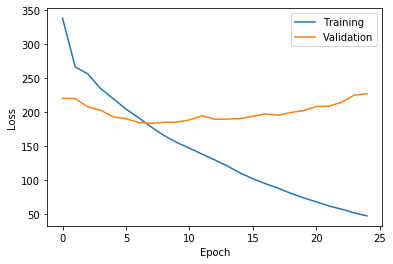

In [28]:
import matplotlib.pyplot as plt

plt.plot(training_losses, label = 'Training')
plt.plot(validation_losses, label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
def translate(text):
  model.eval()
  with torch.no_grad():
    tokens = english_tokenizer(text)
    tokens = [ENGLISH.init_token] + tokens + [ENGLISH.eos_token]
    src_indexes = [ENGLISH.vocab.stoi[token] for token in tokens]
    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    src_tensor = src_tensor.reshape(-1,1)

    output = model(src_tensor, src_tensor)
    output_dim = output.shape[-1]
    output = output.view(-1, output_dim)
    indices = torch.argmax(output,dim=1).tolist()
    return [HINDI.vocab.itos[x] for x in indices]

print(translate("man speaking native language:"))

This is english sentence 
 man speaking native language:
['man', 'speaking', 'native', 'language', ':']
['<unk>', 'i', ',', '.', '<eos>', '<eos>', '<eos>']


In [30]:
for i, torch_sentence_pair in enumerate(test_data):
  
    eng_sentence = vars(torch_sentence_pair)["english"]
    hin_sentence = vars(torch_sentence_pair)["hindi"]


    hindi_predicted = translate(" ".join(eng_sentence))
    hindi_predicted = " ".join(list(filter(lambda x: x != '<eos>' and x!= '<unk>', hindi_predicted))[1:])

    print(eng_sentence)
    print(hindi_predicted)
    print()
    print()
    
    if i == 500:
      break


This is english sentence 
 ise jaane do * ... langada .
['ise', 'jaane', 'do', '*', '...', 'langada', '.']
['ise', 'jaane', 'do', '*', '...', 'langada', '.']
, . a .


This is english sentence 
 mai janta hu ki ise one of the most important stories of the last century se nawaja gya hai
['mai', 'janta', 'hu', 'ki', 'ise', 'one', 'of', 'the', 'most', 'important', 'stories', 'of', 'the', 'last', 'century', 'se', 'nawaja', 'gya', 'hai']
['mai', 'janta', 'hu', 'ki', 'ise', 'one', 'of', 'the', 'most', 'important', 'stories', 'of', 'the', 'last', 'century', 'se', 'nawaja', 'gya', 'hai']
, it i a . . . the the the the the . . . . . .


This is english sentence 
 haan , mainne shaayad ise ek dozen times dekha hai .
['haan', ',', 'mainne', 'shaayad', 'ise', 'ek', 'dozen', 'times', 'dekha', 'hai', '.']
['haan', ',', 'mainne', 'shaayad', 'ise', 'ek', 'dozen', 'times', 'dekha', 'hai', '.']
, it i a . . . .


This is english sentence 
 main twilight zone marathons syfy pe hamesha dekhta hoon .
['mai

['hmm', 'i', 'think', 'mujhe', 'check', 'karna', 'padega', '.', 'so', 'mai', 'itna', 'to', 'kah', 'saku', 'ki', 'maine', 'dekhi', 'hai', '.']
, it i a . . . the the the the the . . . . . .


This is english sentence 
 voh toh hilarious hein
['voh', 'toh', 'hilarious', 'hein']
['voh', 'toh', 'hilarious', 'hein']
, .


This is english sentence 
 )
[')']
[')']



This is english sentence 
 naye star wars movie me wo villian commander ke jesa dikh raha tha
['naye', 'star', 'wars', 'movie', 'me', 'wo', 'villian', 'commander', 'ke', 'jesa', 'dikh', 'raha', 'tha']
['naye', 'star', 'wars', 'movie', 'me', 'wo', 'villian', 'commander', 'ke', 'jesa', 'dikh', 'raha', 'tha']
, it i a a . . . .


This is english sentence 
 ah sabhi
['ah', 'sabhi']
['ah', 'sabhi']
,


This is english sentence 
 tho bruce yaani keyscene ke tarah lag raha hein . kya aapko thoda frustrated feel hota hein
['tho', 'bruce', 'yaani', 'keyscene', 'ke', 'tarah', 'lag', 'raha', 'hein', '.', 'kya', 'aapko', 'thoda', 'frustrated

['to', 'kya', 'tumhe', 'lagta', 'hai', ' ', 'ye', 'movie', 'baccho', 'k', 'sath', 'dekhne', 'k', 'liye', 'theek', 'hai', '?']
is a a a a a a a


This is english sentence 
 haan , mujhe aashchary hai ki ise keval sade hue tamaatar b rating milee
['haan', ',', 'mujhe', 'aashchary', 'hai', 'ki', 'ise', 'keval', 'sade', 'hue', 'tamaatar', 'b', 'rating', 'milee']
['haan', ',', 'mujhe', 'aashchary', 'hai', 'ki', 'ise', 'keval', 'sade', 'hue', 'tamaatar', 'b', 'rating', 'milee']
, it i a . . . the the . . . .


This is english sentence 
 mujhe nahi mahum thai ki billy crystal mike ki voice the but achcha tha !
['mujhe', 'nahi', 'mahum', 'thai', 'ki', 'billy', 'crystal', 'mike', 'ki', 'voice', 'the', 'but', 'achcha', 'tha', '!']
['mujhe', 'nahi', 'mahum', 'thai', 'ki', 'billy', 'crystal', 'mike', 'ki', 'voice', 'the', 'but', 'achcha', 'tha', '!']
, it i a a . . the . . . .


This is english sentence 
 haan , kya aapko supernatural existence ka thrill hein , humanity ko lose kare bina
['haan', 

['sahi', 'me', '.', 'gosling', 'accha', 'hai', 'usme', '.', 'gangster', 'squad', 'ka', 'bhi', 'fan', 'hu']
, it i a . . . the . . . .


This is english sentence 
 hello to hum aaj jis movie k baare me baat karege wo hai batman v superman
['hello', 'to', 'hum', 'aaj', 'jis', 'movie', 'k', 'baare', 'me', 'baat', 'karege', 'wo', 'hai', 'batman', 'v', 'superman']
['hello', 'to', 'hum', 'aaj', 'jis', 'movie', 'k', 'baare', 'me', 'baat', 'karege', 'wo', 'hai', 'batman', 'v', 'superman']
is a a a a .


This is english sentence 
 kya aap mujhe sameekshaon ke baare mein adhik bata sakate hain ?
['kya', 'aap', 'mujhe', 'sameekshaon', 'ke', 'baare', 'mein', 'adhik', 'bata', 'sakate', 'hain', '?']
['kya', 'aap', 'mujhe', 'sameekshaon', 'ke', 'baare', 'mein', 'adhik', 'bata', 'sakate', 'hain', '?']
is a a a


This is english sentence 
 yahi to rule hai
['yahi', 'to', 'rule', 'hai']
['yahi', 'to', 'rule', 'hai']
, .


This is english sentence 
 mujhe length nai pata .
['mujhe', 'length', 'nai', 'pat

['probably', 'wo', 'just', 'high', 'adrenaline', 'feel', 'kar', 'tha', 'wo', 'karke', 'jo', 'usko', 'supposedly', 'nahi', 'karna', 'tha', '.']
, it i a . . . the the the . . . . . .


This is english sentence 
 haan , tom hardy eames mein bahut different lag rha h. mujhe waha batman se yaad h.
['haan', ',', 'tom', 'hardy', 'eames', 'mein', 'bahut', 'different', 'lag', 'rha', 'h.', 'mujhe', 'waha', 'batman', 'se', 'yaad', 'h.']
['haan', ',', 'tom', 'hardy', 'eames', 'mein', 'bahut', 'different', 'lag', 'rha', 'h.', 'mujhe', 'waha', 'batman', 'se', 'yaad', 'h.']
, it i a . . . the the the . . . . . .


This is english sentence 
 us adventure me koi bade jaanwar hai kya movie me ?
['us', 'adventure', 'me', 'koi', 'bade', 'jaanwar', 'hai', 'kya', 'movie', 'me', '?']
['us', 'adventure', 'me', 'koi', 'bade', 'jaanwar', 'hai', 'kya', 'movie', 'me', '?']
is a a a .


This is english sentence 
 also amy adams , waise mai use achche se janta nahi hu .
['also', 'amy', 'adams', ',', 'waise', 'mai'

['director', ':', 'chris', 'columbus']
is


This is english sentence 
 facebook tho yek monster hein
['facebook', 'tho', 'yek', 'monster', 'hein']
['facebook', 'tho', 'yek', 'monster', 'hein']
, . a


This is english sentence 
 haa mei isko dobaara dekhana chahugi . part 2 ke bare mei nishchit nahi hui.mere khayal mei abhi nahi .
['haa', 'mei', 'isko', 'dobaara', 'dekhana', 'chahugi', '.', 'part', '2', 'ke', 'bare', 'mei', 'nishchit', 'nahi', 'hui.mere', 'khayal', 'mei', 'abhi', 'nahi', '.']
['haa', 'mei', 'isko', 'dobaara', 'dekhana', 'chahugi', '.', 'part', '2', 'ke', 'bare', 'mei', 'nishchit', 'nahi', 'hui.mere', 'khayal', 'mei', 'abhi', 'nahi', '.']
, it i a . . . the the the the the . . . . . .


This is english sentence 
 movie ka directir john lasseter tha , mujhe nahi pata usne aur kaun si movie banai hai .
['movie', 'ka', 'directir', 'john', 'lasseter', 'tha', ',', 'mujhe', 'nahi', 'pata', 'usne', 'aur', 'kaun', 'si', 'movie', 'banai', 'hai', '.']
['movie', 'ka', 'directir', '

['theek', ',', 'mainne', 'socha', 'tha', 'ki', 'vaastavik', 'duniya', 'ke', 'nihitaarth', 'ko', 'naitik', 'aur', 'naitik', 'roop', 'se', 'donon', 'ke', 'baare', 'mein', 'sochana', 'saaph', 'tha', '.']
, it i a . . . the the the the the . the . . . . .


This is english sentence 
 acha tho bruce ke saath shuru hota hein jo child hein
['acha', 'tho', 'bruce', 'ke', 'saath', 'shuru', 'hota', 'hein', 'jo', 'child', 'hein']
['acha', 'tho', 'bruce', 'ke', 'saath', 'shuru', 'hota', 'hein', 'jo', 'child', 'hein']
, it i a . . . . .


This is english sentence 
 war scenes ... wo un logon ko follow karna aur unke experiences ke baare mein jyada hai aur log escape karne ke liye kya kya karenge ( assume dead , pretend to be from another country )
['war', 'scenes', '...', 'wo', 'un', 'logon', 'ko', 'follow', 'karna', 'aur', 'unke', 'experiences', 'ke', 'baare', 'mein', 'jyada', 'hai', 'aur', 'log', 'escape', 'karne', 'ke', 'liye', 'kya', 'kya', 'karenge', '(', 'assume', 'dead', ',', 'pretend', 'to'

['vah', 'france', 'mei', 'set', 'ho', 'gaya', 'hai', '.', 'wwii', '.', 'yah', 'british', 'sena', 'ke', 'bare', 'mei', 'hai.churchil', 'ne', 'apni', 'upasthiti', 'darj', 'karai', 'hai', '.']
, it i a . . . the the the the the . the . . . . . . .


This is english sentence 
 aisi movie dekhna kafi funny hai jahan do villain ek dusre ke khilaf hain na ki hero aur villain
['aisi', 'movie', 'dekhna', 'kafi', 'funny', 'hai', 'jahan', 'do', 'villain', 'ek', 'dusre', 'ke', 'khilaf', 'hain', 'na', 'ki', 'hero', 'aur', 'villain']
['aisi', 'movie', 'dekhna', 'kafi', 'funny', 'hai', 'jahan', 'do', 'villain', 'ek', 'dusre', 'ke', 'khilaf', 'hain', 'na', 'ki', 'hero', 'aur', 'villain']
, it a a a . . the the a the . . .


This is english sentence 
 oh , vah kon hai ?
['oh', ',', 'vah', 'kon', 'hai', '?']
['oh', ',', 'vah', 'kon', 'hai', '?']
is a


This is english sentence 
 kya umhe realize hua ki ve   usi bhul gaye he ?
['kya', 'umhe', 'realize', 'hua', 'ki', 've', '  ', 'usi', 'bhul', 'gaye', 'he

['kuch', 'to', 'bhote', 'bada', 'stake', 'hai', 'use', 'nuclear', 'missile', 'mai', 'jo', 'new', 'york', 'ki', 'teraf', 'ja', 'rhi', 'thi']
, it i a . . . the the the the . . . . . .


This is english sentence 
 amy poehler regina george ki mom thi .
['amy', 'poehler', 'regina', 'george', 'ki', 'mom', 'thi', '.']
['amy', 'poehler', 'regina', 'george', 'ki', 'mom', 'thi', '.']
, a a


This is english sentence 
 namaste
['namaste']
['namaste']



This is english sentence 
 vah shaark par ek inaam rakhata hai jab vah kisee any vyakti par hamala karata hai .
['vah', 'shaark', 'par', 'ek', 'inaam', 'rakhata', 'hai', 'jab', 'vah', 'kisee', 'any', 'vyakti', 'par', 'hamala', 'karata', 'hai', '.']
['vah', 'shaark', 'par', 'ek', 'inaam', 'rakhata', 'hai', 'jab', 'vah', 'kisee', 'any', 'vyakti', 'par', 'hamala', 'karata', 'hai', '.']
, it i a . . . the the the . . . . .


This is english sentence 
 mujhe eisa laga ki koi kuch aur kisi ke bare me kah raha hai
['mujhe', 'eisa', 'laga', 'ki', 'koi',

['maine', 'ye', 'kabhi', 'nah', 'dekhi']
, .


This is english sentence 
 mujhe is baat ka ehasaas nahin tha ki kaagajaat leek karane vaale karmachaaree ne rand korporeshan mein kaam kiya tha .
['mujhe', 'is', 'baat', 'ka', 'ehasaas', 'nahin', 'tha', 'ki', 'kaagajaat', 'leek', 'karane', 'vaale', 'karmachaaree', 'ne', 'rand', 'korporeshan', 'mein', 'kaam', 'kiya', 'tha', '.']
['mujhe', 'is', 'baat', 'ka', 'ehasaas', 'nahin', 'tha', 'ki', 'kaagajaat', 'leek', 'karane', 'vaale', 'karmachaaree', 'ne', 'rand', 'korporeshan', 'mein', 'kaam', 'kiya', 'tha', '.']
, it i a . . . the the the the the . the . . . . .


This is english sentence 
 oe pesci and daniel stern robbers hain , aur unke character ka naam character harry aur marv hain .
['oe', 'pesci', 'and', 'daniel', 'stern', 'robbers', 'hain', ',', 'aur', 'unke', 'character', 'ka', 'naam', 'character', 'harry', 'aur', 'marv', 'hain', '.']
['oe', 'pesci', 'and', 'daniel', 'stern', 'robbers', 'hain', ',', 'aur', 'unke', 'character', 'ka', 

['yah', 'elan', 'tyooring', 'ke', 'baare', 'mein', 'ek', 'jeevanee', 'hai', ',', 'jo', 'ek', 'british', 'kriptainaalist', 'hai', 'jisane', 'dviteey', 'vishv', 'yuddh', 'ke', 'dauraan', 'jarman', 'khuphiya', 'kod', 'ko', 'dikript', 'kiya', 'tha', '.']
, it i a a . . the the a the . the . . . .


This is english sentence 
 kya tumne isko dekha hai ?
['kya', 'tumne', 'isko', 'dekha', 'hai', '?']
['kya', 'tumne', 'isko', 'dekha', 'hai', '?']
you


This is english sentence 
 haalaanki is adhyayan ke saath kya ho raha hai ? mujhe lagata hai ki hamen dekha ja raha hai . kya aapako lagata hai ki ham benjaamin kambarabaich ke saath ek philm mein honge ?
['haalaanki', 'is', 'adhyayan', 'ke', 'saath', 'kya', 'ho', 'raha', 'hai', '?', 'mujhe', 'lagata', 'hai', 'ki', 'hamen', 'dekha', 'ja', 'raha', 'hai', '.', 'kya', 'aapako', 'lagata', 'hai', 'ki', 'ham', 'benjaamin', 'kambarabaich', 'ke', 'saath', 'ek', 'philm', 'mein', 'honge', '?']
['haalaanki', 'is', 'adhyayan', 'ke', 'saath', 'kya', 'ho', 'ra

['frozen', 'mein', 'aapka', 'favorite', 'character', 'kon', 'hein']
is a


This is english sentence 
 shayad 1975 mein isse zyaada worth tha .
['shayad', '1975', 'mein', 'isse', 'zyaada', 'worth', 'tha', '.']
['shayad', '1975', 'mein', 'isse', 'zyaada', 'worth', 'tha', '.']
, it a a . .


This is english sentence 
 haan , yakeen hai ki   yah chris hemsworth par vaastav mein badee baat hai
['haan', ',', 'yakeen', 'hai', 'ki', '  ', 'yah', 'chris', 'hemsworth', 'par', 'vaastav', 'mein', 'badee', 'baat', 'hai']
['haan', ',', 'yakeen', 'hai', 'ki', ' ', 'yah', 'chris', 'hemsworth', 'par', 'vaastav', 'mein', 'badee', 'baat', 'hai']
, it i a . . . . .


This is english sentence 
 main aapako bataoonga agar mujhe ise dekhane mein maza aaya lekin mujhe yakeen hai ki main karoonga !
['main', 'aapako', 'bataoonga', 'agar', 'mujhe', 'ise', 'dekhane', 'mein', 'maza', 'aaya', 'lekin', 'mujhe', 'yakeen', 'hai', 'ki', 'main', 'karoonga', '!']
['main', 'aapako', 'bataoonga', 'agar', 'mujhe', 'ise', 'd

['bade', 'man', 'vaale', 'aisa', 'sochate', 'hain', '.']
, . a


This is english sentence 
 suno\
['suno\\']
['suno\\']



This is english sentence 
 i wonder agar ye uski wife ki death se trigger hua ho
['i', 'wonder', 'agar', 'ye', 'uski', 'wife', 'ki', 'death', 'se', 'trigger', 'hua', 'ho']
['i', 'wonder', 'agar', 'ye', 'uski', 'wife', 'ki', 'death', 'se', 'trigger', 'hua', 'ho']
, it i a . . . . . .


This is english sentence 
 jaise sipaahee ko paani se bahaar nikaala ja raha ho
['jaise', 'sipaahee', 'ko', 'paani', 'se', 'bahaar', 'nikaala', 'ja', 'raha', 'ho']
['jaise', 'sipaahee', 'ko', 'paani', 'se', 'bahaar', 'nikaala', 'ja', 'raha', 'ho']
, it a . . .


This is english sentence 
 itna nahi jitna tum soch rahe hoge . ye 25 % football ke baare mein hai ! kafi movie is baare mein hai ki behind the scenes uske family issues mein kya chal raha hai
['itna', 'nahi', 'jitna', 'tum', 'soch', 'rahe', 'hoge', '.', 'ye', '25', '%', 'football', 'ke', 'baare', 'mein', 'hai', '!', 'kafi', '

['kate', 'ne', 'tho', 'mid', 'flight', 'mein', 'he', 'discover', 'kiya', 'ki', 'kevin', 'missing', 'hein', '..', 'kaise', 'stupid', 'hein', 'yar', '..', ' ', 'lekin', 'movie', 'tho', 'funny', 'hein', 'kyon', 'ki', 'kon', 'aise', 'apne', 'kid', 'ko', 'bhultha', 'hein']
, it i a . . . the the the the the the . the . the . the . the . . . . .


This is english sentence 
 shayad because me use fancy nahi krta
['shayad', 'because', 'me', 'use', 'fancy', 'nahi', 'krta']
['shayad', 'because', 'me', 'use', 'fancy', 'nahi', 'krta']
, it i a . . .


This is english sentence 
 main assume karta hu tumne dekh rakhi hai
['main', 'assume', 'karta', 'hu', 'tumne', 'dekh', 'rakhi', 'hai']
['main', 'assume', 'karta', 'hu', 'tumne', 'dekh', 'rakhi', 'hai']
, . a .


This is english sentence 
 cool , accha hai
['cool', ',', 'accha', 'hai']
['cool', ',', 'accha', 'hai']
, .


This is english sentence 
 mujhe robert downey jr iron man ke roop me accha laga .
['mujhe', 'robert', 'downey', 'jr', 'iron', 'man

['absolutely', ',', '1920s', 'ka', 'style', 'icon', 'hein', 'jo', 'saare', 'life', 'mein', 'yek', 'starling', 'vivacity', 'le', 'aaya', ',', 'bas', 'is', 'film', 'mein', 'saari', 'set', 'dressings', 'correct', 'huva', 'hein']
, it i a . . . the the the the the the . the . the . the . . . .


This is english sentence 
 kya yah kam se kam ek sukhad ant hai ?
['kya', 'yah', 'kam', 'se', 'kam', 'ek', 'sukhad', 'ant', 'hai', '?']
['kya', 'yah', 'kam', 'se', 'kam', 'ek', 'sukhad', 'ant', 'hai', '?']
is a a


This is english sentence 
 crime ki taraf kon jayega jab kisi apne ki death ho jaye
['crime', 'ki', 'taraf', 'kon', 'jayega', 'jab', 'kisi', 'apne', 'ki', 'death', 'ho', 'jaye']
['crime', 'ki', 'taraf', 'kon', 'jayega', 'jab', 'kisi', 'apne', 'ki', 'death', 'ho', 'jaye']
, it a a a .


This is english sentence 
 yeh 1925 ka noves based hein jo f.scott fitzgerald ne likha hein
['yeh', '1925', 'ka', 'noves', 'based', 'hein', 'jo', 'f.scott', 'fitzgerald', 'ne', 'likha', 'hein']
['yeh', '19

['hello', ',', 'movie', 'ka', 'nam', 'kay', 'hai', '?']
is a


This is english sentence 
 mujhe nahin pata .
['mujhe', 'nahin', 'pata', '.']
['mujhe', 'nahin', 'pata', '.']
, .


This is english sentence 
 john sikha ki losef yek night club mein hein aur voh use pakadna chatha hein . voh viggo ka betha hein jo russian syndicate newyork mein hein uska head hein
['john', 'sikha', 'ki', 'losef', 'yek', 'night', 'club', 'mein', 'hein', 'aur', 'voh', 'use', 'pakadna', 'chatha', 'hein', '.', 'voh', 'viggo', 'ka', 'betha', 'hein', 'jo', 'russian', 'syndicate', 'newyork', 'mein', 'hein', 'uska', 'head', 'hein']
['john', 'sikha', 'ki', 'losef', 'yek', 'night', 'club', 'mein', 'hein', 'aur', 'voh', 'use', 'pakadna', 'chatha', 'hein', '.', 'voh', 'viggo', 'ka', 'betha', 'hein', 'jo', 'russian', 'syndicate', 'newyork', 'mein', 'hein', 'uska', 'head', 'hein']
, it i a . . . the the the the the the . the . the . the . the . . . . .


This is english sentence 
 haan , anth mein , use laga ki uski fam

['namaste', '!', 'kya', 'aapane', 'philm', 'da', 'imiteshan', 'gem', 'dekhee', 'hai', '?']
is a a a


This is english sentence 
 tum kahanse suru karna chahate ho
['tum', 'kahanse', 'suru', 'karna', 'chahate', 'ho']
['tum', 'kahanse', 'suru', 'karna', 'chahate', 'ho']
is a


This is english sentence 
 hi
['hi']
['hi']



This is english sentence 
 john hughes director tha , right ?
['john', 'hughes', 'director', 'tha', ',', 'right', '?']
['john', 'hughes', 'director', 'tha', ',', 'right', '?']
, a


This is english sentence 
 tum scarecrow wale scenes k baare me kya sochte ho ?
['tum', 'scarecrow', 'wale', 'scenes', 'k', 'baare', 'me', 'kya', 'sochte', 'ho', '?']
['tum', 'scarecrow', 'wale', 'scenes', 'k', 'baare', 'me', 'kya', 'sochte', 'ho', '?']
is a a a .


This is english sentence 
 kya tumne movie ko 3d me dekha hai , wo bahut acchhi hai
['kya', 'tumne', 'movie', 'ko', '3d', 'me', 'dekha', 'hai', ',', 'wo', 'bahut', 'acchhi', 'hai']
['kya', 'tumne', 'movie', 'ko', '3d', 'me', 'de

['kya', 'aapko', 'fairy', 'tales', 'pasand', 'hein', '?']
you


This is english sentence 
 voh funny hein
['voh', 'funny', 'hein']
['voh', 'funny', 'hein']
, .




In [31]:
import csv

translated_sentences = open('Paper1.csv','w')
csvwriter = csv.writer(translated_sentences)
csvwriter.writerow(['Input','Predicted','Actual'])  

for i, (eng_sentence, hin_sentence) in enumerate(zip(test_data_sent["english"], test_data_sent["hindi"])):

  hindi_predicted = translate(eng_sentence)
  hindi_predicted = " ".join(list(filter(lambda x: x != '<eos>', hindi_predicted))[1:]).strip()
  csvwriter.writerow([eng_sentence.strip(), hindi_predicted.strip(), hin_sentence.strip()])

  # print(eng_sentence.strip())
  # print(hindi_predicted)
  # print()
  # print()

translated_sentences.close()



This is english sentence 
 ise jaane do * ... langada.
['ise', 'jaane', 'do', '*', '...', 'langada', '.']
This is english sentence 
 Mai janta hu ki ise one of the most important stories of the last century se nawaja gya hai
['Mai', 'janta', 'hu', 'ki', 'ise', 'one', 'of', 'the', 'most', 'important', 'stories', 'of', 'the', 'last', 'century', 'se', 'nawaja', 'gya', 'hai']
This is english sentence 
 haan, mainne shaayad ise ek dozen times dekha hai.
['haan', ',', 'mainne', 'shaayad', 'ise', 'ek', 'dozen', 'times', 'dekha', 'hai', '.']
This is english sentence 
 Main twilight zone marathons Syfy pe hamesha dekhta hoon.
['Main', 'twilight', 'zone', 'marathons', 'Syfy', 'pe', 'hamesha', 'dekhta', 'hoon', '.']
This is english sentence 
 Good name
['Good', 'name']
This is english sentence 
 favorite part konsa hein?
['favorite', 'part', 'konsa', 'hein', '?']
This is english sentence 
 unka wo kafi khatin samay tha Scare khel mai aur wo disqualified hogye
['unka', 'wo', 'kafi', 'khatin', 'sam

This is english sentence 
 are yeh tho old hein yar
['are', 'yeh', 'tho', 'old', 'hein', 'yar']
This is english sentence 
 Tumhe kya lagta hai movie ki fitting ending thi ya cliffhanger thi.
['Tumhe', 'kya', 'lagta', 'hai', 'movie', 'ki', 'fitting', 'ending', 'thi', 'ya', 'cliffhanger', 'thi', '.']
This is english sentence 
 kaafi divergence hein profession al critical ka opinion aur regular movie ka goers
['kaafi', 'divergence', 'hein', 'profession', 'al', 'critical', 'ka', 'opinion', 'aur', 'regular', 'movie', 'ka', 'goers']
This is english sentence 
 Dusra item ke liye hume Google karna padega.
['Dusra', 'item', 'ke', 'liye', 'hume', 'Google', 'karna', 'padega', '.']
This is english sentence 
 namaste. philm kya hai
['namaste', '.', 'philm', 'kya', 'hai']
This is english sentence 
 Ohh wo movie, abhi tak nahi
['Ohh', 'wo', 'movie', ',', 'abhi', 'tak', 'nahi']
This is english sentence 
 aur voh soch raha tha ki daisy usse bulayagi, lekin usse patha hi nahi chala kyonki geroge ne usse

This is english sentence 
 Mujhe nahin lagta ki woh overcompensate kar raha tha.  Mujhe lagta hai yeh usme naturally built hai aur woh consciously karne ki koshish nahin kar raha tha.
['Mujhe', 'nahin', 'lagta', 'ki', 'woh', 'overcompensate', 'kar', 'raha', 'tha', '.', ' ', 'Mujhe', 'lagta', 'hai', 'yeh', 'usme', 'naturally', 'built', 'hai', 'aur', 'woh', 'consciously', 'karne', 'ki', 'koshish', 'nahin', 'kar', 'raha', 'tha', '.']
This is english sentence 
 kahi review mein tho ache hi likha hein, Rotten tomatoes aur metacritic dono 95% diya aur cinema score tho B+ deya
['kahi', 'review', 'mein', 'tho', 'ache', 'hi', 'likha', 'hein', ',', 'Rotten', 'tomatoes', 'aur', 'metacritic', 'dono', '95', '%', 'diya', 'aur', 'cinema', 'score', 'tho', 'B+', 'deya']
This is english sentence 
 main nishchit roop se ise myfachai par dekhoonga.
['main', 'nishchit', 'roop', 'se', 'ise', 'myfachai', 'par', 'dekhoonga', '.']
This is english sentence 
 Hey, really nahin. Sirf  Batman vs. Superman. 27% Rot

This is english sentence 
 yah 1925 ke upanyaas par aadhaarit hai
['yah', '1925', 'ke', 'upanyaas', 'par', 'aadhaarit', 'hai']
This is english sentence 
 Who?
['Who', '?']
This is english sentence 
 yes, projections ke base pe attack karna kafi neat dikhta hai
['yes', ',', 'projections', 'ke', 'base', 'pe', 'attack', 'karna', 'kafi', 'neat', 'dikhta', 'hai']
This is english sentence 
 Yeh kaha gya ki uski wife marr gayi but usne use puppy diya. To uska badla uski chori hui car or puppy ki maut se liya gya.
['Yeh', 'kaha', 'gya', 'ki', 'uski', 'wife', 'marr', 'gayi', 'but', 'usne', 'use', 'puppy', 'diya', '.', 'To', 'uska', 'badla', 'uski', 'chori', 'hui', 'car', 'or', 'puppy', 'ki', 'maut', 'se', 'liya', 'gya', '.']
This is english sentence 
 वे*
['वे', '*']
This is english sentence 
 haa main karta hu
['haa', 'main', 'karta', 'hu']
This is english sentence 
 Director: Chris Columbus
['Director', ':', 'Chris', 'Columbus']
This is english sentence 
 Facebook tho yek monster hein
['Faceb

This is english sentence 
 kya tum jante ho to be honest agar tum dekho world ajkal kis way ka hai full of bad to world view mein unhe enemies ki tarah hona perfect sense banata hai
['kya', 'tum', 'jante', 'ho', 'to', 'be', 'honest', 'agar', 'tum', 'dekho', 'world', 'ajkal', 'kis', 'way', 'ka', 'hai', 'full', 'of', 'bad', 'to', 'world', 'view', 'mein', 'unhe', 'enemies', 'ki', 'tarah', 'hona', 'perfect', 'sense', 'banata', 'hai']
This is english sentence 
 woh bahut hi achcha actor hai achcha laga use Logan ke alava kisi aur ke roop mein dekhna, lol
['woh', 'bahut', 'hi', 'achcha', 'actor', 'hai', 'achcha', 'laga', 'use', 'Logan', 'ke', 'alava', 'kisi', 'aur', 'ke', 'roop', 'mein', 'dekhna', ',', 'lol']
This is english sentence 
 aap ko jazz achha lagtha hai?
['aap', 'ko', 'jazz', 'achha', 'lagtha', 'hai', '?']
This is english sentence 
 WWII
['WWII']
This is english sentence 
 Mene socha ki
['Mene', 'socha', 'ki']
This is english sentence 
 main tumse is movie ke baare me baat kar rah

This is english sentence 
 Joss Whedon
['Joss', 'Whedon']
This is english sentence 
 Maine bhi Metacritic ya Cinemascore pramanik hone ke bare mein nahin suna hai. lekin yah ajib hai ki yah Metacritic par 46/100 hai aur Cinemascore pe A hai. yah bahut alag scores hain.
['Maine', 'bhi', 'Metacritic', 'ya', 'Cinemascore', 'pramanik', 'hone', 'ke', 'bare', 'mein', 'nahin', 'suna', 'hai', '.', 'lekin', 'yah', 'ajib', 'hai', 'ki', 'yah', 'Metacritic', 'par', '46/100', 'hai', 'aur', 'Cinemascore', 'pe', 'A', 'hai', '.', 'yah', 'bahut', 'alag', 'scores', 'hain', '.']
This is english sentence 
 ye ke thriller/science fiction movie hai
['ye', 'ke', 'thriller', '/', 'science', 'fiction', 'movie', 'hai']
This is english sentence 
 wo Jazz pianist bana hai aur usko Emma Stone se mohabbat hojaati hai. ye Los Angeles mein hota hai
['wo', 'Jazz', 'pianist', 'bana', 'hai', 'aur', 'usko', 'Emma', 'Stone', 'se', 'mohabbat', 'hojaati', 'hai', '.', 'ye', 'Los', 'Angeles', 'mein', 'hota', 'hai']
This is en

This is english sentence 
 ok.....kya woh apna debt chukane manage karega ?
['ok', '.....', 'kya', 'woh', 'apna', 'debt', 'chukane', 'manage', 'karega', '?']
This is english sentence 
 namaste
['namaste']
This is english sentence 
 Maine kabhi dhayan nhi diya. Zarur baht achha actor hoga.
['Maine', 'kabhi', 'dhayan', 'nhi', 'diya', '.', 'Zarur', 'baht', 'achha', 'actor', 'hoga', '.']
This is english sentence 
 kya la la laind jaisee any philmen hain jinase aap isakee tulana kar sakate hain?
['kya', 'la', 'la', 'laind', 'jaisee', 'any', 'philmen', 'hain', 'jinase', 'aap', 'isakee', 'tulana', 'kar', 'sakate', 'hain', '?']
This is english sentence 
 shayad uski best bhi kyunki I, Tanya, ke alawa usne kabhi kisi itne ache mein kaam nahi kiya
['shayad', 'uski', 'best', 'bhi', 'kyunki', 'I', ',', 'Tanya', ',', 'ke', 'alawa', 'usne', 'kabhi', 'kisi', 'itne', 'ache', 'mein', 'kaam', 'nahi', 'kiya']
This is english sentence 
 acha sawal hai, mujhe mike jyada acha lagta hai. wo alag hi optimisti

This is english sentence 
 bade man vaale aisa sochate hain.
['bade', 'man', 'vaale', 'aisa', 'sochate', 'hain', '.']
This is english sentence 
 Suno\
['Suno\\']
This is english sentence 
 I wonder agar ye uski wife ki death se trigger hua ho
['I', 'wonder', 'agar', 'ye', 'uski', 'wife', 'ki', 'death', 'se', 'trigger', 'hua', 'ho']
This is english sentence 
 Jaise sipaahee ko paani se bahaar nikaala ja raha ho
['Jaise', 'sipaahee', 'ko', 'paani', 'se', 'bahaar', 'nikaala', 'ja', 'raha', 'ho']
This is english sentence 
 itna nahi jitna tum soch rahe hoge. ye 25% football ke baare mein hai! kafi movie is baare mein hai ki behind the scenes uske family issues mein kya chal raha hai
['itna', 'nahi', 'jitna', 'tum', 'soch', 'rahe', 'hoge', '.', 'ye', '25', '%', 'football', 'ke', 'baare', 'mein', 'hai', '!', 'kafi', 'movie', 'is', 'baare', 'mein', 'hai', 'ki', 'behind', 'the', 'scenes', 'uske', 'family', 'issues', 'mein', 'kya', 'chal', 'raha', 'hai']
This is english sentence 
 HELLO! KAISA 

This is english sentence 
 cinema score ka rating A diya
['cinema', 'score', 'ka', 'rating', 'A', 'diya']
This is english sentence 
 rahi hai. vo dikha raha hai ki vah shaant hai kuch IQ points mei s=Sylvester
['rahi', 'hai', '.', 'vo', 'dikha', 'raha', 'hai', 'ki', 'vah', 'shaant', 'hai', 'kuch', 'IQ', 'points', 'mei', 's', '=', 'Sylvester']
This is english sentence 
 lakin voh tho evil hein na aur usko gotham ne burn karna chatha tha
['lakin', 'voh', 'tho', 'evil', 'hein', 'na', 'aur', 'usko', 'gotham', 'ne', 'burn', 'karna', 'chatha', 'tha']
This is english sentence 
 AGAR AAP FREE HOTE THO, JARUR AAP IS MOVIE KO DEKHO
['AGAR', 'AAP', 'FREE', 'HOTE', 'THO', ',', 'JARUR', 'AAP', 'IS', 'MOVIE', 'KO', 'DEKHO']
This is english sentence 
 SHUBH PRABHAAT
['SHUBH', 'PRABHAAT']
This is english sentence 
 Kya aap generally "black comedy" type movie dekhte he?
['Kya', 'aap', 'generally', '"', 'black', 'comedy', '"', 'type', 'movie', 'dekhte', 'he', '?']
This is english sentence 
 ye learn kar

This is english sentence 
 59%
['59', '%']
This is english sentence 
 YAS kisi ne to agree kiya
['YAS', 'kisi', 'ne', 'to', 'agree', 'kiya']
This is english sentence 
 tum right ho, kyunki scientifically big Lebowski aaj tak banayi gayi  best film he. iske bawajood, Empire aur Variety jaisi magazines iski apman janak alochna karti he.
['tum', 'right', 'ho', ',', 'kyunki', 'scientifically', 'big', 'Lebowski', 'aaj', 'tak', 'banayi', 'gayi', ' ', 'best', 'film', 'he', '.', 'iske', 'bawajood', ',', 'Empire', 'aur', 'Variety', 'jaisi', 'magazines', 'iski', 'apman', 'janak', 'alochna', 'karti', 'he', '.']
This is english sentence 
 Vaapas usake paas
['Vaapas', 'usake', 'paas']
This is english sentence 
 Ok,so I am looking for Robert Downey Jr. 's role and who played Hawkeye. Aap jaante hain kya ??
['Ok', ',', 'so', 'I', 'am', 'looking', 'for', 'Robert', 'Downey', 'Jr.', "'s", 'role', 'and', 'who', 'played', 'Hawkeye', '.', 'Aap', 'jaante', 'hain', 'kya', '?', '?']
This is english sentence 


This is english sentence 
 mujhe lagta hai ye ek aur Leo movie hai jo usey map pe daalti hai
['mujhe', 'lagta', 'hai', 'ye', 'ek', 'aur', 'Leo', 'movie', 'hai', 'jo', 'usey', 'map', 'pe', 'daalti', 'hai']
This is english sentence 
 MUJE BHI
['MUJE', 'BHI']
This is english sentence 
 maph karna, hang out.
['maph', 'karna', ',', 'hang', 'out', '.']
This is english sentence 
 Tum aisa keh sakte ho, because wo 1940 me start hoti hai
['Tum', 'aisa', 'keh', 'sakte', 'ho', ',', 'because', 'wo', '1940', 'me', 'start', 'hoti', 'hai']
This is english sentence 
 MICHAEL CAINE
['MICHAEL', 'CAINE']
This is english sentence 
 Khair, ye ek interesting movie lagti hai. Thanks sabhi information ke liye.
['Khair', ',', 'ye', 'ek', 'interesting', 'movie', 'lagti', 'hai', '.', 'Thanks', 'sabhi', 'information', 'ke', 'liye', '.']
This is english sentence 
 Bahut majedar lagata hai, mujhe ise apane list mein rakhana hoga.
['Bahut', 'majedar', 'lagata', 'hai', ',', 'mujhe', 'ise', 'apane', 'list', 'mein', 'r

This is english sentence 
 MEIN HOME ALONE KO
['MEIN', 'HOME', 'ALONE', 'KO']
This is english sentence 
 Mostly driftwood ke hogging ke liye Titanic mein:)
['Mostly', 'driftwood', 'ke', 'hogging', 'ke', 'liye', 'Titanic', 'mein', ':)']
This is english sentence 
 voh tho cool hein yar, aur uska prison sentence tho uska work yaad kartha
['voh', 'tho', 'cool', 'hein', 'yar', ',', 'aur', 'uska', 'prison', 'sentence', 'tho', 'uska', 'work', 'yaad', 'kartha']
This is english sentence 
 muje acha lga ki hulk ne Iron Man ko bachaya girne se kitna acha samay tha wo
['muje', 'acha', 'lga', 'ki', 'hulk', 'ne', 'Iron', 'Man', 'ko', 'bachaya', 'girne', 'se', 'kitna', 'acha', 'samay', 'tha', 'wo']
This is english sentence 
 HAAN, VOH VAAKAHI MEIN ACHE HEIN.. LAGHTHA HEIN KI VOH DRIED UP KIYA HEIN
['HAAN', ',', 'VOH', 'VAAKAHI', 'MEIN', 'ACHE', 'HEIN', '..', 'LAGHTHA', 'HEIN', 'KI', 'VOH', 'DRIED', 'UP', 'KIYA', 'HEIN']
This is english sentence 
 tab to hit lagti he!Disney movies always excellent hot

This is english sentence 
 but haan! haha bahut funny
['but', 'haan', '!', 'haha', 'bahut', 'funny']
This is english sentence 
 mere khayaal se yeh inspire hui he rock em sock em robots, ek purani toy
['mere', 'khayaal', 'se', 'yeh', 'inspire', 'hui', 'he', 'rock', 'em', 'sock', 'em', 'robots', ',', 'ek', 'purani', 'toy']
This is english sentence 
 haan, voh definitely strong hein
['haan', ',', 'voh', 'definitely', 'strong', 'hein']
This is english sentence 
 Maine par yah wali nahi dekhi hai.
['Maine', 'par', 'yah', 'wali', 'nahi', 'dekhi', 'hai', '.']
This is english sentence 
 mujhe batman pasand hai
['mujhe', 'batman', 'pasand', 'hai']
This is english sentence 
 Oh bilkul sure! Mujhe uske training aur kitni strong hogayi ka evolution bahut pasand aaya.
['Oh', 'bilkul', 'sure', '!', 'Mujhe', 'uske', 'training', 'aur', 'kitni', 'strong', 'hogayi', 'ka', 'evolution', 'bahut', 'pasand', 'aaya', '.']
This is english sentence 
 scene 1 ke baare mein aapka kya upai hein
['scene', '1', 'ke

This is english sentence 
 aapakee siphaarish ke lie bahut bahut dhanyavaad!
['aapakee', 'siphaarish', 'ke', 'lie', 'bahut', 'bahut', 'dhanyavaad', '!']
This is english sentence 
 To discuss karlo kyuki maine nahi dekhi hai, but use christopher nolan ne direct ki hai
['To', 'discuss', 'karlo', 'kyuki', 'maine', 'nahi', 'dekhi', 'hai', ',', 'but', 'use', 'christopher', 'nolan', 'ne', 'direct', 'ki', 'hai']
This is english sentence 
 maine bhi wo part enjoy kiya, isme ye bhi dikhaya gaya hai kaise dono mehnat karte hai apne dreams achieve karne
['maine', 'bhi', 'wo', 'part', 'enjoy', 'kiya', ',', 'isme', 'ye', 'bhi', 'dikhaya', 'gaya', 'hai', 'kaise', 'dono', 'mehnat', 'karte', 'hai', 'apne', 'dreams', 'achieve', 'karne']
This is english sentence 
 haan thoda fun bhi hein yar
['haan', 'thoda', 'fun', 'bhi', 'hein', 'yar']
This is english sentence 
 tho aap dekha?
['tho', 'aap', 'dekha', '?']
This is english sentence 
 Actors sahi me acche hai aur tum probably sabhi ko jaante ho. Unme se 

This is english sentence 
 Han main sehmat huin, kya Leagu kabhi film mein Cran ke saath sir kaatte hai?
['Han', 'main', 'sehmat', 'huin', ',', 'kya', 'Leagu', 'kabhi', 'film', 'mein', 'Cran', 'ke', 'saath', 'sir', 'kaatte', 'hai', '?']
This is english sentence 
 Social Network ki koi bhi movie mein aapako mujse baat karane ka task saupa gaya tha
['Social', 'Network', 'ki', 'koi', 'bhi', 'movie', 'mein', 'aapako', 'mujse', 'baat', 'karane', 'ka', 'task', 'saupa', 'gaya', 'tha']
This is english sentence 
 ye mera first time hai maine turk just join kia main sure nahi hun ye kaise work karta hai
['ye', 'mera', 'first', 'time', 'hai', 'maine', 'turk', 'just', 'join', 'kia', 'main', 'sure', 'nahi', 'hun', 'ye', 'kaise', 'work', 'karta', 'hai']
This is english sentence 
 on great
['on', 'great']
This is english sentence 
 haan yar
['haan', 'yar']
This is english sentence 
 Mujhe lagta acting achi hai kyoki Steven Spielberg director hai.
['Mujhe', 'lagta', 'acting', 'achi', 'hai', 'kyoki', '

This is english sentence 
 Kya use acche reviews mile?
['Kya', 'use', 'acche', 'reviews', 'mile', '?']
This is english sentence 
 Iron Man Marvel Comics par based hai, kay tumne padha hai?
['Iron', 'Man', 'Marvel', 'Comics', 'par', 'based', 'hai', ',', 'kay', 'tumne', 'padha', 'hai', '?']
This is english sentence 
 Mujhe to aisa lagta hai. Main surprise nahi hu ke use settlement karna pada
['Mujhe', 'to', 'aisa', 'lagta', 'hai', '.', 'Main', 'surprise', 'nahi', 'hu', 'ke', 'use', 'settlement', 'karna', 'pada']
This is english sentence 
 kya tumne kabhi Jaws dekhi he?
['kya', 'tumne', 'kabhi', 'Jaws', 'dekhi', 'he', '?']
This is english sentence 
 tab to well he
['tab', 'to', 'well', 'he']
This is english sentence 
 kya tum L.A. mein rahte ho?
['kya', 'tum', 'L.A.', 'mein', 'rahte', 'ho', '?']
This is english sentence 
 Muujhe Bruce Almighty acchi lagi kyuki wo comedy thi aur mujhe comedy pasand hai. Mujhe ye bhi accha laga kaise usme god aya jo ki sab movies me nahi ata. Tumhe Bruce al

This is english sentence 
 yah kis baare mein hai?
['yah', 'kis', 'baare', 'mein', 'hai', '?']
This is english sentence 
 Phew! Ye sound achcha hai, usko comedy animation movie pasand hai. Mujhe lagata hai ham milkr movie dhekate hai.
['Phew', '!', 'Ye', 'sound', 'achcha', 'hai', ',', 'usko', 'comedy', 'animation', 'movie', 'pasand', 'hai', '.', 'Mujhe', 'lagata', 'hai', 'ham', 'milkr', 'movie', 'dhekate', 'hai', '.']
This is english sentence 
 Film mein saari awaazein kisne di hai?
['Film', 'mein', 'saari', 'awaazein', 'kisne', 'di', 'hai', '?']
This is english sentence 
 lekin shayad ye dekhne ke liye decent  hai
['lekin', 'shayad', 'ye', 'dekhne', 'ke', 'liye', 'decent', ' ', 'hai']
This is english sentence 
 John Legend kaunsa part play kar raha hai?
['John', 'Legend', 'kaunsa', 'part', 'play', 'kar', 'raha', 'hai', '?']
This is english sentence 
 hello
['hello']
This is english sentence 
 Aakhir me wick ko naya puppy mil gaya
['Aakhir', 'me', 'wick', 'ko', 'naya', 'puppy', 'mil', 

This is english sentence 
 rating ke base par ye kal sakte hai ki ye movie secent hai
['rating', 'ke', 'base', 'par', 'ye', 'kal', 'sakte', 'hai', 'ki', 'ye', 'movie', 'secent', 'hai']
This is english sentence 
 I believe so ye last scene me ha na
['I', 'believe', 'so', 'ye', 'last', 'scene', 'me', 'ha', 'na']
This is english sentence 
 well, ye ek interesting movie lagti he.All information ke liye thanks.
['well', ',', 'ye', 'ek', 'interesting', 'movie', 'lagti', 'he', '.', 'All', 'information', 'ke', 'liye', 'thanks', '.']
This is english sentence 
 or shayad Galileo ke bare main serious horror/drama
['or', 'shayad', 'Galileo', 'ke', 'bare', 'main', 'serious', 'horror', '/', 'drama']
This is english sentence 
 yes
['yes']
This is english sentence 
 vaah! sunne main acha lagta hai, use comedy animation movies achi lagti hai. muje lagta hai hum sath main dekhenge.
['vaah', '!', 'sunne', 'main', 'acha', 'lagta', 'hai', ',', 'use', 'comedy', 'animation', 'movies', 'achi', 'lagti', 'hai',

This is english sentence 
 yeh tho superhero ka film hey- aapko tho comics pasand hein
['aapko', 'tho', 'comics', 'pasand', 'hein']
This is english sentence 
 Agar tum chaho to mein plot ke baare mein aur bata sakta hun ?
['Agar', 'tum', 'chaho', 'to', 'mein', 'plot', 'ke', 'baare', 'mein', 'aur', 'bata', 'sakta', 'hun', '?']
This is english sentence 
 ye 2010 se hai
['ye', '2010', 'se', 'hai']
This is english sentence 
 documentary ke tarah sound kartha, nahi?
['documentary', 'ke', 'tarah', 'sound', 'kartha', ',', 'nahi', '?']
This is english sentence 
 hi tho aap ready ho? yeh tho batman vs superman superhero ka crossover movie hein.. aap tho superheroes se familiar hi honge?
['hi', 'tho', 'aap', 'ready', 'ho', '?', 'yeh', 'tho', 'batman', 'vs', 'superman', 'superhero', 'ka', 'crossover', 'movie', 'hein', '..', 'aap', 'tho', 'superheroes', 'se', 'familiar', 'hi', 'honge', '?']
This is english sentence 
 Aur abhi recent mein. main Robert Downey Jr ko as Iron Man kafi enjoy karta hun.


This is english sentence 
 acha tho morgan freeman bhi hein kya? voh badiya cast karte. tho freeman ka play kya hein?
['acha', 'tho', 'morgan', 'freeman', 'bhi', 'hein', 'kya', '?', 'voh', 'badiya', 'cast', 'karte', '.', 'tho', 'freeman', 'ka', 'play', 'kya', 'hein', '?']
This is english sentence 
 Ha.wo bahut unpleasant he
['Ha.wo', 'bahut', 'unpleasant', 'he']
This is english sentence 
 yeh, very cool. mujhe ye pasand hai par mujhe in general con-man pasand hai. Leonardo DiCaprio mahan the.
['man', 'pasand', 'hai', '.', 'Leonardo', 'DiCaprio', 'mahan', 'the', '.']
This is english sentence 
 arey waah bahut hi shaandaar. Mujhey lomdi pasand hai or yeh bahut accha hai ki usme do lomdi hai jabki wo nakaratmak hai
['arey', 'waah', 'bahut', 'hi', 'shaandaar', '.', 'Mujhey', 'lomdi', 'pasand', 'hai', 'or', 'yeh', 'bahut', 'accha', 'hai', 'ki', 'usme', 'do', 'lomdi', 'hai', 'jabki', 'wo', 'nakaratmak', 'hai']
This is english sentence 
 mujhe pata hai ki ek magaramachchh shikaaree ko dhoondh

This is english sentence 
 Kya Dragons fire breath karte hai?
['Kya', 'Dragons', 'fire', 'breath', 'karte', 'hai', '?']
This is english sentence 
 mainne ek baar dankin bakestaar naamak ek kophee kee dukaan kholane ke vichaar ke saath khilavaad kiya
['mainne', 'ek', 'baar', 'dankin', 'bakestaar', 'naamak', 'ek', 'kophee', 'kee', 'dukaan', 'kholane', 'ke', 'vichaar', 'ke', 'saath', 'khilavaad', 'kiya']
This is english sentence 
 shirph leonardo decaprio ki liye
['shirph', 'leonardo', 'decaprio', 'ki', 'liye']
This is english sentence 
 Nahi, I dont know , mujhe batao
['Nahi', ',', 'I', 'do', 'nt', 'know', ',', 'mujhe', 'batao']
This is english sentence 
 Ek movie critic ne kaha Hulk aise play kiya jaise wo shaanti ka reservoir tha but phir Volcano ban gaya. Main agree karta hu.
['Ek', 'movie', 'critic', 'ne', 'kaha', 'Hulk', 'aise', 'play', 'kiya', 'jaise', 'wo', 'shaanti', 'ka', 'reservoir', 'tha', 'but', 'phir', 'Volcano', 'ban', 'gaya', '.', 'Main', 'agree', 'karta', 'hu', '.']
This 

This is english sentence 
 brodee ke kadam jaise charitron ko dekhana achchha tha - haalaanki isane unake bete ko kaarravaee ke lie prerit karane ke lie sadame mein le liya.
['haalaanki', 'isane', 'unake', 'bete', 'ko', 'kaarravaee', 'ke', 'lie', 'prerit', 'karane', 'ke', 'lie', 'sadame', 'mein', 'le', 'liya', '.']
This is english sentence 
 wah cinemastore A+ rated hai
['wah', 'cinemastore', 'A+', 'rated', 'hai']
This is english sentence 
 ish moive ki sound like action flick jaise hai
['ish', 'moive', 'ki', 'sound', 'like', 'action', 'flick', 'jaise', 'hai']
This is english sentence 
 ye iski only one hai jo mujhe pata hai
['ye', 'iski', 'only', 'one', 'hai', 'jo', 'mujhe', 'pata', 'hai']
This is english sentence 
 Main to recommend karunga. Teen movie hone k sath sath bahut achi conversational movie hai.
['Main', 'to', 'recommend', 'karunga', '.', 'Teen', 'movie', 'hone', 'k', 'sath', 'sath', 'bahut', 'achi', 'conversational', 'movie', 'hai', '.']
This is english sentence 
 hello
['

This is english sentence 
 KYA AAP DUBARA DEKHNE KO PASAND KARENGE?
['KYA', 'AAP', 'DUBARA', 'DEKHNE', 'KO', 'PASAND', 'KARENGE', '?']
This is english sentence 
 main kahoonga ki Robert Downey Jr bhee yahaan apanee kshamata ke saath khel rahe hain, apanee tej jeebh aur parishkaar ke saath. aapaka pasandeeda charitr kaun tha?
['main', 'kahoonga', 'ki', 'Robert', 'Downey', 'Jr', 'bhee', 'yahaan', 'apanee', 'kshamata', 'ke', 'saath', 'khel', 'rahe', 'hain', ',', 'apanee', 'tej', 'jeebh', 'aur', 'parishkaar', 'ke', 'saath', '.', 'aapaka', 'pasandeeda', 'charitr', 'kaun', 'tha', '?']
This is english sentence 
 haan 5 saal hoga
['haan', '5', 'saal', 'hoga']
This is english sentence 
 VULPH OPH VOL SADAK AMERIKA MEIN BAHUT PRASIDDH HAI.
['VULPH', 'OPH', 'VOL', 'SADAK', 'AMERIKA', 'MEIN', 'BAHUT', 'PRASIDDH', 'HAI', '.']
This is english sentence 
 muje grinch movie pasand hein. voh kaafi role mein perform karthe
['muje', 'grinch', 'movie', 'pasand', 'hein', '.', 'voh', 'kaafi', 'role', 'mein',

This is english sentence 
 Yah samajane mei acha hai
['Yah', 'samajane', 'mei', 'acha', 'hai']
This is english sentence 
 Thik hai bhai
['Thik', 'hai', 'bhai']
This is english sentence 
 vaah yah ek achchha skor hai. mukhy kiradaar kaun nibhaata hai?
['vaah', 'yah', 'ek', 'achchha', 'skor', 'hai', '.', 'mukhy', 'kiradaar', 'kaun', 'nibhaata', 'hai', '?']
This is english sentence 
 I know.
['I', 'know', '.']
This is english sentence 
 kya tum isey apne bacchon ke saath dekhoge ya unhe dekhne doge jab tum kuch aur kar rahe hoge?
['kya', 'tum', 'isey', 'apne', 'bacchon', 'ke', 'saath', 'dekhoge', 'ya', 'unhe', 'dekhne', 'doge', 'jab', 'tum', 'kuch', 'aur', 'kar', 'rahe', 'hoge', '?']
This is english sentence 
 Wo movie hai jo hame discuss karni hai
['Wo', 'movie', 'hai', 'jo', 'hame', 'discuss', 'karni', 'hai']
This is english sentence 
 Jab logo ko pta chalta hai ki john wicks ki car chraiyi gyi hai to wo sabhi kehne lgte hai oh no.... john wicj ki nhi
['Jab', 'logo', 'ko', 'pta', 'chalt

This is english sentence 
 main sahamat hoon. mainne ise sinemaagharon mein bhee dekha
['main', 'sahamat', 'hoon', '.', 'mainne', 'ise', 'sinemaagharon', 'mein', 'bhee', 'dekha']
This is english sentence 
 dreams se escape karne ki koshish karo, prove karo apne ko ko woh real eorld mein hai
['dreams', 'se', 'escape', 'karne', 'ki', 'koshish', 'karo', ',', 'prove', 'karo', 'apne', 'ko', 'ko', 'woh', 'real', 'eorld', 'mein', 'hai']
This is english sentence 
 to tell me more movie ke bare me
['to', 'tell', 'me', 'more', 'movie', 'ke', 'bare', 'me']
This is english sentence 
 oh ok haan maine suna hai iske bare mein, toh kya yeh CasaBlanca jaisa hai?
['oh', 'ok', 'haan', 'maine', 'suna', 'hai', 'iske', 'bare', 'mein', ',', 'toh', 'kya', 'yeh', 'CasaBlanca', 'jaisa', 'hai', '?']
This is english sentence 
 hi
['hi']
This is english sentence 
 Main 100% sure nhi huin. But ye ek open end ki tarah tha iss movie ke liye
['Main', '100', '%', 'sure', 'nhi', 'huin', '.', 'But', 'ye', 'ek', 'open', 

This is english sentence 
 MEIN BHI YEH NOTICED KIYAHOON. MUJE OCTAVIA SPENCER PASAND HEIN
['MEIN', 'BHI', 'YEH', 'NOTICED', 'KIYAHOON', '.', 'MUJE', 'OCTAVIA', 'SPENCER', 'PASAND', 'HEIN']
This is english sentence 
 I like ki Judy ne Nick ko uska partner banane ke liye poocha.
['I', 'like', 'ki', 'Judy', 'ne', 'Nick', 'ko', 'uska', 'partner', 'banane', 'ke', 'liye', 'poocha', '.']
This is english sentence 
 uska best part tho wonder woman actionscene ka hein
['uska', 'best', 'part', 'tho', 'wonder', 'woman', 'actionscene', 'ka', 'hein']
This is english sentence 
 mene wait kar raha hu mere putre ke liye, vo bada hoke dekh ne ke liye. usko dinasaurs accha lagega.
['mene', 'wait', 'kar', 'raha', 'hu', 'mere', 'putre', 'ke', 'liye', ',', 'vo', 'bada', 'hoke', 'dekh', 'ne', 'ke', 'liye', '.', 'usko', 'dinasaurs', 'accha', 'lagega', '.']
This is english sentence 
 Ryan Roseling, Emma Stne aur John Legend
['Ryan', 'Roseling', ',', 'Emma', 'Stne', 'aur', 'John', 'Legend']
This is english sen

This is english sentence 
 ah, ab hui na baath
['ah', ',', 'ab', 'hui', 'na', 'baath']
This is english sentence 
 me bhi! toy story movies from pixar mere favorite movies hai.tereko pata hai kya wo log toy story land bana rahe hai walt disny world mai ye summer mai.
['me', 'bhi', '!', 'toy', 'story', 'movies', 'from', 'pixar', 'mere', 'favorite', 'movies', 'hai.tereko', 'pata', 'hai', 'kya', 'wo', 'log', 'toy', 'story', 'land', 'bana', 'rahe', 'hai', 'walt', 'disny', 'world', 'mai', 'ye', 'summer', 'mai', '.']
This is english sentence 
 Shayad lindsey loans best movie he
['Shayad', 'lindsey', 'loans', 'best', 'movie', 'he']
This is english sentence 
 Action sequences, mujhe teeno parts me se second movie pasand aayi
['Action', 'sequences', ',', 'mujhe', 'teeno', 'parts', 'me', 'se', 'second', 'movie', 'pasand', 'aayi']
This is english sentence 
 Thefacebook to bilkul bekaar hai. Aisa lagta hai Zuckerberg ne sahi me dusre logo ki leli
['Thefacebook', 'to', 'bilkul', 'bekaar', 'hai', '.'

This is english sentence 
 Filming may 2016 me start hui aur sept me end hogayi. Wow
['Filming', 'may', '2016', 'me', 'start', 'hui', 'aur', 'sept', 'me', 'end', 'hogayi', '.', 'Wow']
This is english sentence 
 THEEK HAI
['THEEK', 'HAI']
This is english sentence 
 Good
['Good']
This is english sentence 
 Aapko kya lag raha he ki stoick Hiccup ke sath kya kar raha hai?
['Aapko', 'kya', 'lag', 'raha', 'he', 'ki', 'stoick', 'Hiccup', 'ke', 'sath', 'kya', 'kar', 'raha', 'hai', '?']
This is english sentence 
 Mera vishwas hai ki woh ab bhi NFL mein hai.
['Mera', 'vishwas', 'hai', 'ki', 'woh', 'ab', 'bhi', 'NFL', 'mein', 'hai', '.']
This is english sentence 
 I guess so. Wo chithauri k leader ka kya maamla hai? Kaafi mysterious.
['I', 'guess', 'so', '.', 'Wo', 'chithauri', 'k', 'leader', 'ka', 'kya', 'maamla', 'hai', '?', 'Kaafi', 'mysterious', '.']
This is english sentence 
 tumhara favorite scene kya hein yar
['tumhara', 'favorite', 'scene', 'kya', 'hein', 'yar']
This is english sentence 


This is english sentence 
 ek prakaar ka. use apane sangeet se pyaar ho jaata hai, phir pooree philm mein use behatar aur behatar tareeke se jaanane lagatee hai.
['ek', 'prakaar', 'ka', '.', 'use', 'apane', 'sangeet', 'se', 'pyaar', 'ho', 'jaata', 'hai', ',', 'phir', 'pooree', 'philm', 'mein', 'use', 'behatar', 'aur', 'behatar', 'tareeke', 'se', 'jaanane', 'lagatee', 'hai', '.']
This is english sentence 
 mujhe  action aur ladai pasand hain.
['mujhe', ' ', 'action', 'aur', 'ladai', 'pasand', 'hain', '.']
This is english sentence 
 Oh aur bachi Sleeping Beauty hai? Yeh bahut interesting sunai deta hai.
['Oh', 'aur', 'bachi', 'Sleeping', 'Beauty', 'hai', '?', 'Yeh', 'bahut', 'interesting', 'sunai', 'deta', 'hai', '.']
This is english sentence 
 woh movie ek tv reporter ke baare mein hai jo complain karte hai bhagwaan ki presence ki uske life guidance mein aur usko chance milta unka kaam karne ka ek hafte ke liye.
['woh', 'movie', 'ek', 'tv', 'reporter', 'ke', 'baare', 'mein', 'hai', 'jo'

This is english sentence 
 haan, name badiya hein
['haan', ',', 'name', 'badiya', 'hein']
This is english sentence 
 Ladki ka naam Aurora hai, aur wo Maleficent ko apni "fairy godmother" kehti hai
['Ladki', 'ka', 'naam', 'Aurora', 'hai', ',', 'aur', 'wo', 'Maleficent', 'ko', 'apni', '"', 'fairy', 'godmother', '"', 'kehti', 'hai']
This is english sentence 
 is me aapka favorite character kon hein?
['is', 'me', 'aapka', 'favorite', 'character', 'kon', 'hein', '?']
This is english sentence 
 kya ek naya paragraph show hone wala hai?
['kya', 'ek', 'naya', 'paragraph', 'show', 'hone', 'wala', 'hai', '?']
This is english sentence 
 muje bhi. muje mystery aur adventure movies ko pasand hein
['muje', 'bhi', '.', 'muje', 'mystery', 'aur', 'adventure', 'movies', 'ko', 'pasand', 'hein']
This is english sentence 
 main sure nahi hun.
['main', 'sure', 'nahi', 'hun', '.']
This is english sentence 
 now dhyan rakhna
['now', 'dhyan', 'rakhna']
This is english sentence 
 LAGTHA HEIN KI HAMME MONSTERS U

This is english sentence 
 Simplistic popcorn movie from the previews jesa he
['Simplistic', 'popcorn', 'movie', 'from', 'the', 'previews', 'jesa', 'he']
This is english sentence 
 kya tumhe pata hai ki ye kab release huyi thi?
['kya', 'tumhe', 'pata', 'hai', 'ki', 'ye', 'kab', 'release', 'huyi', 'thi', '?']
This is english sentence 
 nahi mei nai. ye ladaki ke baare mei hai?
['nahi', 'mei', 'nai', '.', 'ye', 'ladaki', 'ke', 'baare', 'mei', 'hai', '?']
This is english sentence 
 Us movie me kuch actors kaun hai?
['Us', 'movie', 'me', 'kuch', 'actors', 'kaun', 'hai', '?']
This is english sentence 
 kya tum bhote movie dekte ho?
['kya', 'tum', 'bhote', 'movie', 'dekte', 'ho', '?']
This is english sentence 
 ye bada ironic he ki ve enemies ban jate he
['ye', 'bada', 'ironic', 'he', 'ki', 've', 'enemies', 'ban', 'jate', 'he']
This is english sentence 
 critics kehte hain ki "Despicable Me ek 3D cartoon comedy hai jisme whiplash-quick hasi, funny punch lines hain aur wickedly gimmicky tarif

This is english sentence 
 hello, mujhe film ka naam jaanna atcha lagega.
['hello', ',', 'mujhe', 'film', 'ka', 'naam', 'jaanna', 'atcha', 'lagega', '.']
This is english sentence 
 unhonne gobar da belch kee bhoomika nibhaee, jo yuva yoddhaon ke prashikshan ke svaamee the
['unhonne', 'gobar', 'da', 'belch', 'kee', 'bhoomika', 'nibhaee', ',', 'jo', 'yuva', 'yoddhaon', 'ke', 'prashikshan', 'ke', 'svaamee', 'the']
This is english sentence 
 muje pta hai mai soch rha tha
['muje', 'pta', 'hai', 'mai', 'soch', 'rha', 'tha']
This is english sentence 
 Hello
['Hello']
This is english sentence 
 oh ok. Meri tarike ki movie lagati hai. main dil se bada bachcha hu
['oh', 'ok', '.', 'Meri', 'tarike', 'ki', 'movie', 'lagati', 'hai', '.', 'main', 'dil', 'se', 'bada', 'bachcha', 'hu']
This is english sentence 
 morton tyldum bahut badiya director hein
['morton', 'tyldum', 'bahut', 'badiya', 'director', 'hein']
This is english sentence 
 hey
['hey']
This is english sentence 
 kya aap keanu reeves ke p

In [33]:
# import csv

# translated_sentences = open('Paper2.csv','w')
# csvwriter = csv.writer(translated_sentences)
# csvwriter.writerow(['Input','Predicted','Actual'])  

import nltk

bleu_i = []
bleu_o = []

for i, (eng_sentence, hin_sentence) in enumerate(zip(test_data_sent["english"], test_data_sent["hindi"])):

  hindi_predicted = translate(eng_sentence)
  hindi_predicted = " ".join(list(filter(lambda x: x != '<eos>', hindi_predicted))[1:]).strip()
  # csvwriter.writerow([eng_sentence.strip(), hindi_predicted.strip(), hin_sentence.strip()])

  bleu_i.append(hin_sentence.strip())
  bleu_o.append(hindi_predicted.strip())

  # print(eng_sentence.strip())
  # print(hindi_predicted)
  # print()
  # print()

# translated_sentences.close()

BLEU_scores = []

for i in range(len(bleu_i)):
  BLEU_scores.append(nltk.translate.bleu_score.sentence_bleu(bleu_i[i], bleu_o[i], smoothing_function=nltk.translate.bleu_score.SmoothingFunction().method7))
  
print("Average BLEU Score:", np.mean(BLEU_scores))

This is english sentence 
 ise jaane do * ... langada.
['ise', 'jaane', 'do', '*', '...', 'langada', '.']
This is english sentence 
 Mai janta hu ki ise one of the most important stories of the last century se nawaja gya hai
['Mai', 'janta', 'hu', 'ki', 'ise', 'one', 'of', 'the', 'most', 'important', 'stories', 'of', 'the', 'last', 'century', 'se', 'nawaja', 'gya', 'hai']
This is english sentence 
 haan, mainne shaayad ise ek dozen times dekha hai.
['haan', ',', 'mainne', 'shaayad', 'ise', 'ek', 'dozen', 'times', 'dekha', 'hai', '.']
This is english sentence 
 Main twilight zone marathons Syfy pe hamesha dekhta hoon.
['Main', 'twilight', 'zone', 'marathons', 'Syfy', 'pe', 'hamesha', 'dekhta', 'hoon', '.']
This is english sentence 
 Good name
['Good', 'name']
This is english sentence 
 favorite part konsa hein?
['favorite', 'part', 'konsa', 'hein', '?']
This is english sentence 
 unka wo kafi khatin samay tha Scare khel mai aur wo disqualified hogye
['unka', 'wo', 'kafi', 'khatin', 'sam

This is english sentence 
 MEIN JARUR RECOMMEND KARUNGA, AGAR AAP FREE HOTE THO JARUR DEKHIYAGA
['MEIN', 'JARUR', 'RECOMMEND', 'KARUNGA', ',', 'AGAR', 'AAP', 'FREE', 'HOTE', 'THO', 'JARUR', 'DEKHIYAGA']
This is english sentence 
 Me really ye movie watch karna chahuga, I think
['Me', 'really', 'ye', 'movie', 'watch', 'karna', 'chahuga', ',', 'I', 'think']
This is english sentence 
 are yeh tho old hein yar
['are', 'yeh', 'tho', 'old', 'hein', 'yar']
This is english sentence 
 Tumhe kya lagta hai movie ki fitting ending thi ya cliffhanger thi.
['Tumhe', 'kya', 'lagta', 'hai', 'movie', 'ki', 'fitting', 'ending', 'thi', 'ya', 'cliffhanger', 'thi', '.']
This is english sentence 
 kaafi divergence hein profession al critical ka opinion aur regular movie ka goers
['kaafi', 'divergence', 'hein', 'profession', 'al', 'critical', 'ka', 'opinion', 'aur', 'regular', 'movie', 'ka', 'goers']
This is english sentence 
 Dusra item ke liye hume Google karna padega.
['Dusra', 'item', 'ke', 'liye', 'hume

This is english sentence 
 yahi to rule hai
['yahi', 'to', 'rule', 'hai']
This is english sentence 
 Mujhe length nai pata.
['Mujhe', 'length', 'nai', 'pata', '.']
This is english sentence 
 aap kis tarah kee philmen pasand karate hain?
['aap', 'kis', 'tarah', 'kee', 'philmen', 'pasand', 'karate', 'hain', '?']
This is english sentence 
 Mujhe nahin lagta ki woh overcompensate kar raha tha.  Mujhe lagta hai yeh usme naturally built hai aur woh consciously karne ki koshish nahin kar raha tha.
['Mujhe', 'nahin', 'lagta', 'ki', 'woh', 'overcompensate', 'kar', 'raha', 'tha', '.', ' ', 'Mujhe', 'lagta', 'hai', 'yeh', 'usme', 'naturally', 'built', 'hai', 'aur', 'woh', 'consciously', 'karne', 'ki', 'koshish', 'nahin', 'kar', 'raha', 'tha', '.']
This is english sentence 
 kahi review mein tho ache hi likha hein, Rotten tomatoes aur metacritic dono 95% diya aur cinema score tho B+ deya
['kahi', 'review', 'mein', 'tho', 'ache', 'hi', 'likha', 'hein', ',', 'Rotten', 'tomatoes', 'aur', 'metacritic'

This is english sentence 
 nahin, yeh nahin hain.
['nahin', ',', 'yeh', 'nahin', 'hain', '.']
This is english sentence 
 yah 1925 ke upanyaas par aadhaarit hai
['yah', '1925', 'ke', 'upanyaas', 'par', 'aadhaarit', 'hai']
This is english sentence 
 Who?
['Who', '?']
This is english sentence 
 yes, projections ke base pe attack karna kafi neat dikhta hai
['yes', ',', 'projections', 'ke', 'base', 'pe', 'attack', 'karna', 'kafi', 'neat', 'dikhta', 'hai']
This is english sentence 
 Yeh kaha gya ki uski wife marr gayi but usne use puppy diya. To uska badla uski chori hui car or puppy ki maut se liya gya.
['Yeh', 'kaha', 'gya', 'ki', 'uski', 'wife', 'marr', 'gayi', 'but', 'usne', 'use', 'puppy', 'diya', '.', 'To', 'uska', 'badla', 'uski', 'chori', 'hui', 'car', 'or', 'puppy', 'ki', 'maut', 'se', 'liya', 'gya', '.']
This is english sentence 
 वे*
['वे', '*']
This is english sentence 
 haa main karta hu
['haa', 'main', 'karta', 'hu']
This is english sentence 
 Director: Chris Columbus
['Directo

This is english sentence 
 tumhe songs pasand aaye ?
['tumhe', 'songs', 'pasand', 'aaye', '?']
This is english sentence 
 WOW WOH ACHHA NAHIN
['WOW', 'WOH', 'ACHHA', 'NAHIN']
This is english sentence 
 movie ka naam kya hai
['movie', 'ka', 'naam', 'kya', 'hai']
This is english sentence 
 tum vaha the
['tum', 'vaha', 'the']
This is english sentence 
 meri bhi! me ab bhi ocean me jate samay nervous ho jati hoon.
['meri', 'bhi', '!', 'me', 'ab', 'bhi', 'ocean', 'me', 'jate', 'samay', 'nervous', 'ho', 'jati', 'hoon', '.']
This is english sentence 
 kya tum jante ho to be honest agar tum dekho world ajkal kis way ka hai full of bad to world view mein unhe enemies ki tarah hona perfect sense banata hai
['kya', 'tum', 'jante', 'ho', 'to', 'be', 'honest', 'agar', 'tum', 'dekho', 'world', 'ajkal', 'kis', 'way', 'ka', 'hai', 'full', 'of', 'bad', 'to', 'world', 'view', 'mein', 'unhe', 'enemies', 'ki', 'tarah', 'hona', 'perfect', 'sense', 'banata', 'hai']
This is english sentence 
 woh bahut hi ac

This is english sentence 
 Maine ye Pehla bhi kia hai aur har baar je 3 rating system dete hain
['Maine', 'ye', 'Pehla', 'bhi', 'kia', 'hai', 'aur', 'har', 'baar', 'je', '3', 'rating', 'system', 'dete', 'hain']
This is english sentence 
 Namaskar, hello
['Namaskar', ',', 'hello']
This is english sentence 
 But teen comedy film me itna to expected hi hai.
['But', 'teen', 'comedy', 'film', 'me', 'itna', 'to', 'expected', 'hi', 'hai', '.']
This is english sentence 
 Joss Whedon
['Joss', 'Whedon']
This is english sentence 
 Maine bhi Metacritic ya Cinemascore pramanik hone ke bare mein nahin suna hai. lekin yah ajib hai ki yah Metacritic par 46/100 hai aur Cinemascore pe A hai. yah bahut alag scores hain.
['Maine', 'bhi', 'Metacritic', 'ya', 'Cinemascore', 'pramanik', 'hone', 'ke', 'bare', 'mein', 'nahin', 'suna', 'hai', '.', 'lekin', 'yah', 'ajib', 'hai', 'ki', 'yah', 'Metacritic', 'par', '46/100', 'hai', 'aur', 'Cinemascore', 'pe', 'A', 'hai', '.', 'yah', 'bahut', 'alag', 'scores', 'hain

This is english sentence 
 haan aapake jaisa. yah bahut lokapriy tha bachche sab kuchh jame hue theemd chaahate the. kahaanee kee rekha any raajakumaaree philmon se alag thee
['haan', 'aapake', 'jaisa', '.', 'yah', 'bahut', 'lokapriy', 'tha', 'bachche', 'sab', 'kuchh', 'jame', 'hue', 'theemd', 'chaahate', 'the', '.', 'kahaanee', 'kee', 'rekha', 'any', 'raajakumaaree', 'philmon', 'se', 'alag', 'thee']
This is english sentence 
 hann, mujhe lagta hai ki uska character pretty nuanced tha, lakin main sure nahi hu ki ye uke liye courageous hai wapas Nevada move hona. play ke sahi na jane ke baad, mujhe lagta hai uske paas keval yahi option tha.
['hann', ',', 'mujhe', 'lagta', 'hai', 'ki', 'uska', 'character', 'pretty', 'nuanced', 'tha', ',', 'lakin', 'main', 'sure', 'nahi', 'hu', 'ki', 'ye', 'uke', 'liye', 'courageous', 'hai', 'wapas', 'Nevada', 'move', 'hona', '.', 'play', 'ke', 'sahi', 'na', 'jane', 'ke', 'baad', ',', 'mujhe', 'lagta', 'hai', 'uske', 'paas', 'keval', 'yahi', 'option', 'th

This is english sentence 
 bade man vaale aisa sochate hain.
['bade', 'man', 'vaale', 'aisa', 'sochate', 'hain', '.']
This is english sentence 
 Suno\
['Suno\\']
This is english sentence 
 I wonder agar ye uski wife ki death se trigger hua ho
['I', 'wonder', 'agar', 'ye', 'uski', 'wife', 'ki', 'death', 'se', 'trigger', 'hua', 'ho']
This is english sentence 
 Jaise sipaahee ko paani se bahaar nikaala ja raha ho
['Jaise', 'sipaahee', 'ko', 'paani', 'se', 'bahaar', 'nikaala', 'ja', 'raha', 'ho']
This is english sentence 
 itna nahi jitna tum soch rahe hoge. ye 25% football ke baare mein hai! kafi movie is baare mein hai ki behind the scenes uske family issues mein kya chal raha hai
['itna', 'nahi', 'jitna', 'tum', 'soch', 'rahe', 'hoge', '.', 'ye', '25', '%', 'football', 'ke', 'baare', 'mein', 'hai', '!', 'kafi', 'movie', 'is', 'baare', 'mein', 'hai', 'ki', 'behind', 'the', 'scenes', 'uske', 'family', 'issues', 'mein', 'kya', 'chal', 'raha', 'hai']
This is english sentence 
 HELLO! KAISA 

This is english sentence 
 Ben Affleck hi sirf ek aisa actor hai jise main pehnchanta huin achha plot bhut harsh critics
['Ben', 'Affleck', 'hi', 'sirf', 'ek', 'aisa', 'actor', 'hai', 'jise', 'main', 'pehnchanta', 'huin', 'achha', 'plot', 'bhut', 'harsh', 'critics']
This is english sentence 
 cinema score ka rating A diya
['cinema', 'score', 'ka', 'rating', 'A', 'diya']
This is english sentence 
 rahi hai. vo dikha raha hai ki vah shaant hai kuch IQ points mei s=Sylvester
['rahi', 'hai', '.', 'vo', 'dikha', 'raha', 'hai', 'ki', 'vah', 'shaant', 'hai', 'kuch', 'IQ', 'points', 'mei', 's', '=', 'Sylvester']
This is english sentence 
 lakin voh tho evil hein na aur usko gotham ne burn karna chatha tha
['lakin', 'voh', 'tho', 'evil', 'hein', 'na', 'aur', 'usko', 'gotham', 'ne', 'burn', 'karna', 'chatha', 'tha']
This is english sentence 
 AGAR AAP FREE HOTE THO, JARUR AAP IS MOVIE KO DEKHO
['AGAR', 'AAP', 'FREE', 'HOTE', 'THO', ',', 'JARUR', 'AAP', 'IS', 'MOVIE', 'KO', 'DEKHO']
This is engli

This is english sentence 
 AAP MOVIE PAR KUCH AUR KAAM KAR SAKTHE HO
['AAP', 'MOVIE', 'PAR', 'KUCH', 'AUR', 'KAAM', 'KAR', 'SAKTHE', 'HO']
This is english sentence 
 Mujhe keval unaka dance yaad hai, christmas dance, vah hot tha.
['Mujhe', 'keval', 'unaka', 'dance', 'yaad', 'hai', ',', 'christmas', 'dance', ',', 'vah', 'hot', 'tha', '.']
This is english sentence 
 khair, yah thode ise aur adhik mere lie aamantrit karata hai, keira naitalee ko yah pata lagaane ke lie dukhee hona chaahie!
['khair', ',', 'yah', 'thode', 'ise', 'aur', 'adhik', 'mere', 'lie', 'aamantrit', 'karata', 'hai', ',', 'keira', 'naitalee', 'ko', 'yah', 'pata', 'lagaane', 'ke', 'lie', 'dukhee', 'hona', 'chaahie', '!']
This is english sentence 
 Steve Buscemi bhi isme hai?
['Steve', 'Buscemi', 'bhi', 'isme', 'hai', '?']
This is english sentence 
 vaastav mein ek bada sangharsh nahin hai, philm sirph in do paatron ka anusaran karatee hai kyonki ve pyaar mein pad jaate hain.
['vaastav', 'mein', 'ek', 'bada', 'sangharsh'

This is english sentence 
 voh funny hein
['voh', 'funny', 'hein']
This is english sentence 
 ye guy still debt me tha aur so on
['ye', 'guy', 'still', 'debt', 'me', 'tha', 'aur', 'so', 'on']
This is english sentence 
 tho yeh world wars ke baare mein hein
['tho', 'yeh', 'world', 'wars', 'ke', 'baare', 'mein', 'hein']
This is english sentence 
 lagta hai Olga ka janam Russia me hua tha, so nahin, Henry or Jane ko dekhne se much better hai
['lagta', 'hai', 'Olga', 'ka', 'janam', 'Russia', 'me', 'hua', 'tha', ',', 'so', 'nahin', ',', 'Henry', 'or', 'Jane', 'ko', 'dekhne', 'se', 'much', 'better', 'hai']
This is english sentence 
 mujhe lagta hai ye ek aur Leo movie hai jo usey map pe daalti hai
['mujhe', 'lagta', 'hai', 'ye', 'ek', 'aur', 'Leo', 'movie', 'hai', 'jo', 'usey', 'map', 'pe', 'daalti', 'hai']
This is english sentence 
 MUJE BHI
['MUJE', 'BHI']
This is english sentence 
 maph karna, hang out.
['maph', 'karna', ',', 'hang', 'out', '.']
This is english sentence 
 Tum aisa keh sak

This is english sentence 
 haan, aise hi judgement de dethe kuch information ke bina
['haan', ',', 'aise', 'hi', 'judgement', 'de', 'dethe', 'kuch', 'information', 'ke', 'bina']
This is english sentence 
 Oh badhiya.Main South main hoon
['Oh', 'badhiya', '.', 'Main', 'South', 'main', 'hoon']
This is english sentence 
 MEIN HOME ALONE KO
['MEIN', 'HOME', 'ALONE', 'KO']
This is english sentence 
 Mostly driftwood ke hogging ke liye Titanic mein:)
['Mostly', 'driftwood', 'ke', 'hogging', 'ke', 'liye', 'Titanic', 'mein', ':)']
This is english sentence 
 voh tho cool hein yar, aur uska prison sentence tho uska work yaad kartha
['voh', 'tho', 'cool', 'hein', 'yar', ',', 'aur', 'uska', 'prison', 'sentence', 'tho', 'uska', 'work', 'yaad', 'kartha']
This is english sentence 
 muje acha lga ki hulk ne Iron Man ko bachaya girne se kitna acha samay tha wo
['muje', 'acha', 'lga', 'ki', 'hulk', 'ne', 'Iron', 'Man', 'ko', 'bachaya', 'girne', 'se', 'kitna', 'acha', 'samay', 'tha', 'wo']
This is englis

This is english sentence 
 mere khayaal se yeh inspire hui he rock em sock em robots, ek purani toy
['mere', 'khayaal', 'se', 'yeh', 'inspire', 'hui', 'he', 'rock', 'em', 'sock', 'em', 'robots', ',', 'ek', 'purani', 'toy']
This is english sentence 
 haan, voh definitely strong hein
['haan', ',', 'voh', 'definitely', 'strong', 'hein']
This is english sentence 
 Maine par yah wali nahi dekhi hai.
['Maine', 'par', 'yah', 'wali', 'nahi', 'dekhi', 'hai', '.']
This is english sentence 
 mujhe batman pasand hai
['mujhe', 'batman', 'pasand', 'hai']
This is english sentence 
 Oh bilkul sure! Mujhe uske training aur kitni strong hogayi ka evolution bahut pasand aaya.
['Oh', 'bilkul', 'sure', '!', 'Mujhe', 'uske', 'training', 'aur', 'kitni', 'strong', 'hogayi', 'ka', 'evolution', 'bahut', 'pasand', 'aaya', '.']
This is english sentence 
 scene 1 ke baare mein aapka kya upai hein
['scene', '1', 'ke', 'baare', 'mein', 'aapka', 'kya', 'upai', 'hein']
This is english sentence 
 voh plot detail tho me

This is english sentence 
 main tumhe recommend karta hoon Zootopia film watch karo kyonki Rotten Tomatoes main 98% rating mila
['main', 'tumhe', 'recommend', 'karta', 'hoon', 'Zootopia', 'film', 'watch', 'karo', 'kyonki', 'Rotten', 'Tomatoes', 'main', '98', '%', 'rating', 'mila']
This is english sentence 
 han iski 3d enimated vasatv mein accha hai
['han', 'iski', '3d', 'enimated', 'vasatv', 'mein', 'accha', 'hai']
This is english sentence 
 cinema score tho b diya aur newyork state ka ache picture tho roaring twenties hein
['cinema', 'score', 'tho', 'b', 'diya', 'aur', 'newyork', 'state', 'ka', 'ache', 'picture', 'tho', 'roaring', 'twenties', 'hein']
This is english sentence 
 Ye accha hai
['Ye', 'accha', 'hai']
This is english sentence 
 Wo dar rahe the ke unhe appreciate nahi karege but logo ka reaction opposite tha
['Wo', 'dar', 'rahe', 'the', 'ke', 'unhe', 'appreciate', 'nahi', 'karege', 'but', 'logo', 'ka', 'reaction', 'opposite', 'tha']
This is english sentence 
 especially voh

This is english sentence 
 I am sure is movie ne dusre young athletes ko bhi bahut inspire kiya hoga.
['I', 'am', 'sure', 'is', 'movie', 'ne', 'dusre', 'young', 'athletes', 'ko', 'bhi', 'bahut', 'inspire', 'kiya', 'hoga', '.']
This is english sentence 
 mein bahut enjoy kiya. muje revenge movies pasand hein
['mein', 'bahut', 'enjoy', 'kiya', '.', 'muje', 'revenge', 'movies', 'pasand', 'hein']
This is english sentence 
 Taissairacht ke saath unakee madad karane ke lie loki ne klint baartan ka upayog kiya jo bahut hee bhayaanak tha. main use pasand karata hoon, bhale hee vah ek bura aadamee ho
['Taissairacht', 'ke', 'saath', 'unakee', 'madad', 'karane', 'ke', 'lie', 'loki', 'ne', 'klint', 'baartan', 'ka', 'upayog', 'kiya', 'jo', 'bahut', 'hee', 'bhayaanak', 'tha', '.', 'main', 'use', 'pasand', 'karata', 'hoon', ',', 'bhale', 'hee', 'vah', 'ek', 'bura', 'aadamee', 'ho']
This is english sentence 
 heyy
['heyy']
This is english sentence 
 ha ,maf karna maine abhi vah moive dekhi vaise me po

This is english sentence 
 Saath hi mein mujhe comedy movies bhi pasand hai. To main shayad memes or jokes enjoy karunga.
['Saath', 'hi', 'mein', 'mujhe', 'comedy', 'movies', 'bhi', 'pasand', 'hai', '.', 'To', 'main', 'shayad', 'memes', 'or', 'jokes', 'enjoy', 'karunga', '.']
This is english sentence 
 MUJHE LAGATA HAI KI MERE PATI AUR BETEE NE ISE KHAREEDA HAI, MUJHE NAHIN. PHIR SE, MUJHE EKSHAN PHILMEN PASAND HAIN LEKIN MERE PATI KO GAINGASTAR AUR KOMEDEE DEKHANA BAHUT PASAND HAI. VAH HAMESHA MUJHE CHIDHAATE HAIN KI MAIN KEVAL ABHINETAON KE LIE EKSHAN PHILMEN DEKHANA CHAAHATA HOON.
['MUJHE', 'LAGATA', 'HAI', 'KI', 'MERE', 'PATI', 'AUR', 'BETEE', 'NE', 'ISE', 'KHAREEDA', 'HAI', ',', 'MUJHE', 'NAHIN', '.', 'PHIR', 'SE', ',', 'MUJHE', 'EKSHAN', 'PHILMEN', 'PASAND', 'HAIN', 'LEKIN', 'MERE', 'PATI', 'KO', 'GAINGASTAR', 'AUR', 'KOMEDEE', 'DEKHANA', 'BAHUT', 'PASAND', 'HAI', '.', 'VAH', 'HAMESHA', 'MUJHE', 'CHIDHAATE', 'HAIN', 'KI', 'MAIN', 'KEVAL', 'ABHINETAON', 'KE', 'LIE', 'EKSHAN', 'PHI

This is english sentence 
 hello
['hello']
This is english sentence 
 Aakhir me wick ko naya puppy mil gaya
['Aakhir', 'me', 'wick', 'ko', 'naya', 'puppy', 'mil', 'gaya']
This is english sentence 
 hi kya tumne wonder woman dekha hai ab tak?
['hi', 'kya', 'tumne', 'wonder', 'woman', 'dekha', 'hai', 'ab', 'tak', '?']
This is english sentence 
 mein bhi kuch fantasized hui
['mein', 'bhi', 'kuch', 'fantasized', 'hui']
This is english sentence 
 HAAN, KAAFI FUNNY HEIN
['HAAN', ',', 'KAAFI', 'FUNNY', 'HEIN']
This is english sentence 
 YEH THO CLASSIC UNDERDOG STORY JO DIFFERENT WAY MEIN KAHA GAYA HEIN.. TRIALS AUR TRIUMPHS THO AATHE JAATHE HEIN
['YEH', 'THO', 'CLASSIC', 'UNDERDOG', 'STORY', 'JO', 'DIFFERENT', 'WAY', 'MEIN', 'KAHA', 'GAYA', 'HEIN', '..', 'TRIALS', 'AUR', 'TRIUMPHS', 'THO', 'AATHE', 'JAATHE', 'HEIN']
This is english sentence 
 Mujhe pirates of the Caribbean sabhi Disney' movies se zyada pasand hai
['Mujhe', 'pirates', 'of', 'the', 'Caribbean', 'sabhi', 'Disney', "'", 'movies'

This is english sentence 
 rating ke base par ye kal sakte hai ki ye movie secent hai
['rating', 'ke', 'base', 'par', 'ye', 'kal', 'sakte', 'hai', 'ki', 'ye', 'movie', 'secent', 'hai']
This is english sentence 
 I believe so ye last scene me ha na
['I', 'believe', 'so', 'ye', 'last', 'scene', 'me', 'ha', 'na']
This is english sentence 
 well, ye ek interesting movie lagti he.All information ke liye thanks.
['well', ',', 'ye', 'ek', 'interesting', 'movie', 'lagti', 'he', '.', 'All', 'information', 'ke', 'liye', 'thanks', '.']
This is english sentence 
 or shayad Galileo ke bare main serious horror/drama
['or', 'shayad', 'Galileo', 'ke', 'bare', 'main', 'serious', 'horror', '/', 'drama']
This is english sentence 
 yes
['yes']
This is english sentence 
 vaah! sunne main acha lagta hai, use comedy animation movies achi lagti hai. muje lagta hai hum sath main dekhenge.
['vaah', '!', 'sunne', 'main', 'acha', 'lagta', 'hai', ',', 'use', 'comedy', 'animation', 'movies', 'achi', 'lagti', 'hai',

This is english sentence 
 Kya tum upset the jab Lionheart ko arrest kiya gaya?
['Kya', 'tum', 'upset', 'the', 'jab', 'Lionheart', 'ko', 'arrest', 'kiya', 'gaya', '?']
This is english sentence 
 Kya tumne climax dekha
['Kya', 'tumne', 'climax', 'dekha']
This is english sentence 
 Haan wo movie mere type ki hai
['Haan', 'wo', 'movie', 'mere', 'type', 'ki', 'hai']
This is english sentence 
 crazy ki woh sab plane me awake the. lagta hai neat movie hai
['crazy', 'ki', 'woh', 'sab', 'plane', 'me', 'awake', 'the', '.', 'lagta', 'hai', 'neat', 'movie', 'hai']
This is english sentence 
 hello
['hello']
This is english sentence 
 Main us bare me to sure nahi hu, but Nick Fury hamesha itna cool rahta hai. Too bad bad guys hamesha ek kadam aage rahte hai
['Main', 'us', 'bare', 'me', 'to', 'sure', 'nahi', 'hu', ',', 'but', 'Nick', 'Fury', 'hamesha', 'itna', 'cool', 'rahta', 'hai', '.', 'Too', 'bad', 'bad', 'guys', 'hamesha', 'ek', 'kadam', 'aage', 'rahte', 'hai']
This is english sentence 
 INTRIN

This is english sentence 
 muje joel edgerton pasand hein
['muje', 'joel', 'edgerton', 'pasand', 'hein']
This is english sentence 
 Lol. I see ki movie puri tarah Michigan mein filmed hai. Unke liye good hai. Tax credits.
['Lol', '.', 'I', 'see', 'ki', 'movie', 'puri', 'tarah', 'Michigan', 'mein', 'filmed', 'hai', '.', 'Unke', 'liye', 'good', 'hai', '.', 'Tax', 'credits', '.']
This is english sentence 
 haan
['haan']
This is english sentence 
 Han but ye ek logical story nhi thi
['Han', 'but', 'ye', 'ek', 'logical', 'story', 'nhi', 'thi']
This is english sentence 
 hey
['hey']
This is english sentence 
 Ahh acha.
['Ahh', 'acha', '.']
This is english sentence 
 yeh mann udaane vaala hai.
['yeh', 'mann', 'udaane', 'vaala', 'hai', '.']
This is english sentence 
 Ah ha! so naturally Iron sahi kehta hai?
['Ah', 'ha', '!', 'so', 'naturally', 'Iron', 'sahi', 'kehta', 'hai', '?']
This is english sentence 
 rachel mcadams aur amanda seyfried bhi hai
['rachel', 'mcadams', 'aur', 'amanda', 'seyfr

This is english sentence 
 Vector ko jason segel ne voice kiya hai
['Vector', 'ko', 'jason', 'segel', 'ne', 'voice', 'kiya', 'hai']
This is english sentence 
 Haan wo really good hai
['Haan', 'wo', 'really', 'good', 'hai']
This is english sentence 
 SACH
['SACH']
This is english sentence 
 14 saal ka kids ke hein
['14', 'saal', 'ka', 'kids', 'ke', 'hein']
This is english sentence 
 mere khayal se usne bahut achcha kaam kiya.
['mere', 'khayal', 'se', 'usne', 'bahut', 'achcha', 'kaam', 'kiya', '.']
This is english sentence 
 KYA THE WOLF OF WALL STREET ACHE MOVIE HEIN?
['KYA', 'THE', 'WOLF', 'OF', 'WALL', 'STREET', 'ACHE', 'MOVIE', 'HEIN', '?']
This is english sentence 
 kya tum iesi moive like karte ho
['kya', 'tum', 'iesi', 'moive', 'like', 'karte', 'ho']
This is english sentence 
 mujhe jo yaad hai, yah bhavishy mein hai isalie insaanon kee ladaee ke bajaay, robot ladate hain.
['mujhe', 'jo', 'yaad', 'hai', ',', 'yah', 'bhavishy', 'mein', 'hai', 'isalie', 'insaanon', 'kee', 'ladaee', 

This is english sentence 
 yeh pure fiction nahi hein... yeh inaccurate hein magar muje pasand hein
['yeh', 'pure', 'fiction', 'nahi', 'hein', '...', 'yeh', 'inaccurate', 'hein', 'magar', 'muje', 'pasand', 'hein']
This is english sentence 
 Stoick Hiccups ka father hai aur Hiccup galti se usey bata deta ki ki Tootless ko pata hai drangons nest kahan hai aur wo tootless the ragon ke saath set off kar jata hai is process mein Hiccups ko disown karke
['Stoick', 'Hiccups', 'ka', 'father', 'hai', 'aur', 'Hiccup', 'galti', 'se', 'usey', 'bata', 'deta', 'ki', 'ki', 'Tootless', 'ko', 'pata', 'hai', 'drangons', 'nest', 'kahan', 'hai', 'aur', 'wo', 'tootless', 'the', 'ragon', 'ke', 'saath', 'set', 'off', 'kar', 'jata', 'hai', 'is', 'process', 'mein', 'Hiccups', 'ko', 'disown', 'karke']
This is english sentence 
 Movie ka time period kya hai? kay yeh ek modern story hai?
['Movie', 'ka', 'time', 'period', 'kya', 'hai', '?', 'kay', 'yeh', 'ek', 'modern', 'story', 'hai', '?']
This is english sentenc

This is english sentence 
 Agar tum nikal jaoge to kma skte ho
['Agar', 'tum', 'nikal', 'jaoge', 'to', 'kma', 'skte', 'ho']
This is english sentence 
 hi
['hi']
This is english sentence 
 Tumne blindside deekha hai? Tumhe vo deekhna chaiye, vo empowering movie hai ek football khiladi ke professional banne tak ke.
['Tumne', 'blindside', 'deekha', 'hai', '?', 'Tumhe', 'vo', 'deekhna', 'chaiye', ',', 'vo', 'empowering', 'movie', 'hai', 'ek', 'football', 'khiladi', 'ke', 'professional', 'banne', 'tak', 'ke', '.']
This is english sentence 
 Timberlake cool tha
['Timberlake', 'cool', 'tha']
This is english sentence 
 yes, me janata hu and me ye movie like karta hu
['yes', ',', 'me', 'janata', 'hu', 'and', 'me', 'ye', 'movie', 'like', 'karta', 'hu']
This is english sentence 
 well ye 2016 me bani thi
['well', 'ye', '2016', 'me', 'bani', 'thi']
This is english sentence 
 KYA AAP DUBARA DEKHNE KO PASAND KARENGE?
['KYA', 'AAP', 'DUBARA', 'DEKHNE', 'KO', 'PASAND', 'KARENGE', '?']
This is english 

This is english sentence 
 mujhe har wo cheez pasand hai jo dil me utarti hai... comedies
['mujhe', 'har', 'wo', 'cheez', 'pasand', 'hai', 'jo', 'dil', 'me', 'utarti', 'hai', '...', 'comedies']
This is english sentence 
 Mujhe  yaad hai yah bahut achchha hai
['Mujhe', ' ', 'yaad', 'hai', 'yah', 'bahut', 'achchha', 'hai']
This is english sentence 
 critics ne kaha ki yeh ek colorful movie hai
['critics', 'ne', 'kaha', 'ki', 'yeh', 'ek', 'colorful', 'movie', 'hai']
This is english sentence 
 Jab unko lagta hai ki unhe har cheez mein prem kahani daal deni chaiye tab mujhe chid hoti hai.
['Jab', 'unko', 'lagta', 'hai', 'ki', 'unhe', 'har', 'cheez', 'mein', 'prem', 'kahani', 'daal', 'deni', 'chaiye', 'tab', 'mujhe', 'chid', 'hoti', 'hai', '.']
This is english sentence 
 mein personally enjoy kiya.. facebook ka story hein yar.. reality based movie dekhna pasand hein?
['mein', 'personally', 'enjoy', 'kiya', '..', 'facebook', 'ka', 'story', 'hein', 'yar', '..', 'reality', 'based', 'movie', 'de

This is english sentence 
 muje toh sven ya christophe pasand hein
['muje', 'toh', 'sven', 'ya', 'christophe', 'pasand', 'hein']
This is english sentence 
 nahi, muje nahi lagtha yeh itna bhi scary hoga... CDA ne cop ko form kiya aur usse campus se expulsion karne ke liye university aathe
['nahi', ',', 'muje', 'nahi', 'lagtha', 'yeh', 'itna', 'bhi', 'scary', 'hoga', '...', 'CDA', 'ne', 'cop', 'ko', 'form', 'kiya', 'aur', 'usse', 'campus', 'se', 'expulsion', 'karne', 'ke', 'liye', 'university', 'aathe']
This is english sentence 
 MEIN US MONEY KE LIYE THO JARUR DEKHUNGA, AUR MERE LIYE THO US MONEY JO HAM SPENT KARTHEY, BAS LURHMANN THO CLEAR IDEA HEY IS TARAH KA FILM CRAFT KARNE PE
['MEIN', 'US', 'MONEY', 'KE', 'LIYE', 'THO', 'JARUR', 'DEKHUNGA', ',', 'AUR', 'MERE', 'LIYE', 'THO', 'US', 'MONEY', 'JO', 'HAM', 'SPENT', 'KARTHEY', ',', 'BAS', 'LURHMANN', 'THO', 'CLEAR', 'IDEA', 'HEY', 'IS', 'TARAH', 'KA', 'FILM', 'CRAFT', 'KARNE', 'PE']
This is english sentence 
 main sahamat hoon. mainne 

This is english sentence 
 ow, ow gunga safai wala ka kirdar kar rai thi
['ow', ',', 'ow', 'gunga', 'safai', 'wala', 'ka', 'kirdar', 'kar', 'rai', 'thi']
This is english sentence 
 of course Main nolan ke style ko samajh nahi paaya , jaise ki  michael bay be aur  tim burton sabhee kee apanee style hai
['of', 'course', 'Main', 'nolan', 'ke', 'style', 'ko', 'samajh', 'nahi', 'paaya', ',', 'jaise', 'ki', ' ', 'michael', 'bay', 'be', 'aur', ' ', 'tim', 'burton', 'sabhee', 'kee', 'apanee', 'style', 'hai']
This is english sentence 
 tho hamara guess wrong hoga
['tho', 'hamara', 'guess', 'wrong', 'hoga']
This is english sentence 
 kya aap sahaayak paatron mein se koee naam jaanate hain?
['kya', 'aap', 'sahaayak', 'paatron', 'mein', 'se', 'koee', 'naam', 'jaanate', 'hain', '?']
This is english sentence 
 Wo bahut lucky ban gaye kaafi baar
['Wo', 'bahut', 'lucky', 'ban', 'gaye', 'kaafi', 'baar']
This is english sentence 
 Kaise ho
['Kaise', 'ho']
This is english sentence 
 Movie jis ne nirdeshi

This is english sentence 
 Mujhe lagta he ki me ye movie enjoy karunga
['Mujhe', 'lagta', 'he', 'ki', 'me', 'ye', 'movie', 'enjoy', 'karunga']
This is english sentence 
 bilkul mahakavya ke scenes hai
['bilkul', 'mahakavya', 'ke', 'scenes', 'hai']
This is english sentence 
 Han!
['Han', '!']
This is english sentence 
 so usne uske saath kya kiya?
['so', 'usne', 'uske', 'saath', 'kya', 'kiya', '?']
This is english sentence 
 jo tum likhte ho is all I can see
['jo', 'tum', 'likhte', 'ho', 'is', 'all', 'I', 'can', 'see']
This is english sentence 
 Art kafi acchi thi, especially barf ke castle ka scene.
['Art', 'kafi', 'acchi', 'thi', ',', 'especially', 'barf', 'ke', 'castle', 'ka', 'scene', '.']
This is english sentence 
 *CHARACTER, CHARITRA
['*', 'CHARACTER', ',', 'CHARITRA']
This is english sentence 
 Usually haan, but rating se ye determine nahi hota k main movie dekhunga ya nahi
['Usually', 'haan', ',', 'but', 'rating', 'se', 'ye', 'determine', 'nahi', 'hota', 'k', 'main', 'movie', '

This is english sentence 
 LOL, MEIN MICHIGAN KA MOVIE PURRA DEKHA, ACHA HEI, TAX CREDITS
['LOL', ',', 'MEIN', 'MICHIGAN', 'KA', 'MOVIE', 'PURRA', 'DEKHA', ',', 'ACHA', 'HEI', ',', 'TAX', 'CREDITS']
This is english sentence 
 haan really
['haan', 'really']
This is english sentence 
 are wow, muje is bare mein kuch nahi patha. except us 22$ million ka swiss account.. tho aise hi voh millionaire huve?
['are', 'wow', ',', 'muje', 'is', 'bare', 'mein', 'kuch', 'nahi', 'patha', '.', 'except', 'us', '22', '$', 'million', 'ka', 'swiss', 'account', '..', 'tho', 'aise', 'hi', 'voh', 'millionaire', 'huve', '?']
This is english sentence 
 I think baat khatam ho gayi.  Tumhara din achcha ho.
['I', 'think', 'baat', 'khatam', 'ho', 'gayi', '.', ' ', 'Tumhara', 'din', 'achcha', 'ho', '.']
This is english sentence 
 kya tum bata sakte ho tum uske baare mein kya soochte ho
['kya', 'tum', 'bata', 'sakte', 'ho', 'tum', 'uske', 'baare', 'mein', 'kya', 'soochte', 'ho']
This is english sentence 
 film ka ky

This is english sentence 
 Woh kyon itna bad tha?
['Woh', 'kyon', 'itna', 'bad', 'tha', '?']
This is english sentence 
 haan. thoda frustrations hoon lekin is life mein kuch aspects relate bhi kar saktha
['haan', '.', 'thoda', 'frustrations', 'hoon', 'lekin', 'is', 'life', 'mein', 'kuch', 'aspects', 'relate', 'bhi', 'kar', 'saktha']
This is english sentence 
 ee film tho bahut great bada actors tha, ee tho dusara reason hi mere kho aacha laga aur mene dekungi bina actors keliye.
['ee', 'film', 'tho', 'bahut', 'great', 'bada', 'actors', 'tha', ',', 'ee', 'tho', 'dusara', 'reason', 'hi', 'mere', 'kho', 'aacha', 'laga', 'aur', 'mene', 'dekungi', 'bina', 'actors', 'keliye', '.']
This is english sentence 
 voh tho hein.. overall muje ache movie sound kartha
['voh', 'tho', 'hein', '..', 'overall', 'muje', 'ache', 'movie', 'sound', 'kartha']
This is english sentence 
 Mai us time student hona like karunga
['Mai', 'us', 'time', 'student', 'hona', 'like', 'karunga']
This is english sentence 
 k

This is english sentence 
 mujhe vaastav mein vah hissa nahin mila, lekin samalaingikon ko kaun samajh sakata hai?
['mujhe', 'vaastav', 'mein', 'vah', 'hissa', 'nahin', 'mila', ',', 'lekin', 'samalaingikon', 'ko', 'kaun', 'samajh', 'sakata', 'hai', '?']
This is english sentence 
 mujhe lagta hai jo mere liye kam karte hain woh aesthetics ki tarah hai
['mujhe', 'lagta', 'hai', 'jo', 'mere', 'liye', 'kam', 'karte', 'hain', 'woh', 'aesthetics', 'ki', 'tarah', 'hai']
This is english sentence 
 Hello?
['Hello', '?']
This is english sentence 
 kaise ho
['kaise', 'ho']
This is english sentence 
 K maine kal hi baat kiyatha
['K', 'maine', 'kal', 'hi', 'baat', 'kiyatha']
This is english sentence 
 wow. yeh tho joker play ka important role kiya hein na?
['wow', '.', 'yeh', 'tho', 'joker', 'play', 'ka', 'important', 'role', 'kiya', 'hein', 'na', '?']
This is english sentence 
 Maine Great Whites ko humesha unn badi "Jaws" sharks ki tarah socha hai.
['Maine', 'Great', 'Whites', 'ko', 'humesha', 'u

This is english sentence 
 Bahut maza aaya tha. Humlog four nights camp kiye the. First day bhayanak baarish hui thi, but fir bhi fun tha.
['Bahut', 'maza', 'aaya', 'tha', '.', 'Humlog', 'four', 'nights', 'camp', 'kiye', 'the', '.', 'First', 'day', 'bhayanak', 'baarish', 'hui', 'thi', ',', 'but', 'fir', 'bhi', 'fun', 'tha', '.']
This is english sentence 
 yes, wo sach me bahut talented hai.
['yes', ',', 'wo', 'sach', 'me', 'bahut', 'talented', 'hai', '.']
This is english sentence 
 Makes sense
['Makes', 'sense']
This is english sentence 
 soundtrack kaisa hai? worth noting kuch hai?
['soundtrack', 'kaisa', 'hai', '?', 'worth', 'noting', 'kuch', 'hai', '?']
This is english sentence 
 haa marvle ke alava dc univerce hai
['haa', 'marvle', 'ke', 'alava', 'dc', 'univerce', 'hai']
This is english sentence 
 bye
['bye']
This is english sentence 
 me agree karta hu. yah well made thi.
['me', 'agree', 'karta', 'hu', '.', 'yah', 'well', 'made', 'thi', '.']
This is english sentence 
 kya
['kya']


This is english sentence 
 aur maleficent use pyar karti hai
['aur', 'maleficent', 'use', 'pyar', 'karti', 'hai']
This is english sentence 
 Majority us city se thi
['Majority', 'us', 'city', 'se', 'thi']
This is english sentence 
 oh kya sheen hai
['oh', 'kya', 'sheen', 'hai']
This is english sentence 
 Abhi content, humne jo abhi dekha uske bare mein discuss kiya, aur tab ek naya paragraph add kiya, maan lo yaha refresh ho jaata h jab ham x amount of messages exhange kiya
['Abhi', 'content', ',', 'humne', 'jo', 'abhi', 'dekha', 'uske', 'bare', 'mein', 'discuss', 'kiya', ',', 'aur', 'tab', 'ek', 'naya', 'paragraph', 'add', 'kiya', ',', 'maan', 'lo', 'yaha', 'refresh', 'ho', 'jaata', 'h', 'jab', 'ham', 'x', 'amount', 'of', 'messages', 'exhange', 'kiya']
This is english sentence 
 Aur wo sab apne mafia suits me itne cool lag rahe the
['Aur', 'wo', 'sab', 'apne', 'mafia', 'suits', 'me', 'itne', 'cool', 'lag', 'rahe', 'the']
This is english sentence 
 Mere kids love it
['Mere', 'kids', 'l

This is english sentence 
 Hi! kaise ho, koi movie dekhe kya recently
['Hi', '!', 'kaise', 'ho', ',', 'koi', 'movie', 'dekhe', 'kya', 'recently']
This is english sentence 
 I see! Mai sart lagata hu, ki  wo apne naye gragon mitra ko madad karne ke liye, milkar kam karenge.
['I', 'see', '!', 'Mai', 'sart', 'lagata', 'hu', ',', 'ki', ' ', 'wo', 'apne', 'naye', 'gragon', 'mitra', 'ko', 'madad', 'karne', 'ke', 'liye', ',', 'milkar', 'kam', 'karenge', '.']
This is english sentence 
 Oh okay
['Oh', 'okay']
This is english sentence 
 mene karungi, but mera patni tho bahut enjoy karega surely!
['mene', 'karungi', ',', 'but', 'mera', 'patni', 'tho', 'bahut', 'enjoy', 'karega', 'surely', '!']
This is english sentence 
 Lekin wo ye Toothless ke bina nahi jan pata.
['Lekin', 'wo', 'ye', 'Toothless', 'ke', 'bina', 'nahi', 'jan', 'pata', '.']
This is english sentence 
 unke parents nahin rahein aur Ana ko apanee sister ko dhoondhana hai taaki ve desh ko ek saath chala saken.
['unke', 'parents', 'nah

In [34]:
print("Done")

Done
